To be done:
- DONE (magari può essere fatto meglio, ma non ho voglia e non saprei come) Commento grafici punto 4
- DONE (nel senso che era stupido:)Commento su perchè non sampliamo direttamente dalla posterior nel punto 3 (non sono sicura su questo, samplare dalla posterior sarebbe finalizzato ad utilizzare un diverso stimatore bayesiano (la media della posterior) ho paura che aggiungendo anche questo si vada un po' fuori strada)
- DONE 
Tutti gli esempi - TUTTI.. ne ho guardati un tot - usano la sommatoria nella likelihood solo per $i<j$ e per i termini uguali considerano solo l'influenza di un campo esterno... ce ne freghiamo altamente o facciamo un commento del tipo "a parer nostro l'esponente della likelihood sarebbe dovuto essere ..... , ma ci atteniamo in ogni caso al testo dell'esercizio"?

- DONE Especially per il mio amico matematico, possiamo dire che la log-likelihood e il log della posterior sono funzioni concave? Perchè in teoria è una cosa importante per poter usare il metodo del gradiente.
(dovrebbe esserlo)

- DONE Valutare la bontà del punto 5, non so bene se quel che ho fatto va bene :()

The Log-likelihood distribution is CONVEX because it is the composition of a linear (therefore convex) function $\R^{2(N+q)}\rightarrow \R : \underline{x}\mapsto \sum_i x_i$ with a non decreasing convex function $\R\rightarrow\R : x\mapsto e^x$ 

The Prior DOES NOT LOOK LIKE A CONCAVE FUNCTION. I do not find an easy counterexample but if it is necessary I can work it out in 15 minutes I hope. 

We are given $N=5$ variables and $M$ observations. The observations are:

$$\textbf{x}^{(m)}=(x_1^{(m)},\dots ,x_N^{(m)})$$

Where $x_i^{(m)}\in\{1,\dots,q\}$ are categorical variable. In order to model the interaction between these variables we use the Potts model. Let $J_{ij}\in \R^{q\times q}$ be the coupling matrix for the variables $i$ and $j$ having respectevly colors $a$ and $b$, i.e. if $J_{ij}(a,b)\neq0$ then the variables interact (accordingly to the sign) while if $J_{ij}(a,b)\sim0$ they do not. 

We consider the model:

$$P\left(x\,|\,J\right)=\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

Where the exponent represent (minus) the "energy" of the model and the partition function

$$Z\left(J\right) = \sum_{x} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i,a)}\delta_{(x_j,b)}}$$

is generally intractable as it requires to sum over $q^M$ states of the variables.

<font color = "yellow">Since we are driven to interpret the exponent of the likelihood function as a measure of the energy of the model, we actually expect that its sum should have been only over the variables $i \le j$ for $i,j=1,\dots,N$. In fact if we consider all possible combination of the pairs $(i,j)$, we end up summing twice the interaction between $i$ and $j$ for all $i,j$ (because the interaction $(i,j)$ coincides with $(j,i)$). We also expected no interaction of a variable with itself, nevertheless we may interpret these as due to the action of an external field. Nevertheless we stick to the given definition (mainly because the data have probabibly have been generated in this framework).</font>

Coming back to our task, our purpose is to infer the coupling matrix $J$. To do so we should decide which estimator will be the object of our inference. Probably the most natural one - and hence our first choice, is the maximum likelihood estimator (MLE). In a regular model, it is generally found has the value of the parameter of interest that solves the first order conditions 

$$\frac{\partial \mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)}{\partial J_{i,j}(a,b)} = 0$$

where

$$\mathcal{L}\left(J;\left\{x_i^{(m)}\right\}_{m=1}^{M}\right)=\prod_m\frac{1}{Z}e^{\sum_{ij}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}$$

is the likelihood distribution of our sampling model.

In general it is useful to compute the log-likelihood divided by $M$ and then its derivative with respect to each parameter $J_{ij}(a,b)$ (note indeed that this trasformation does not affect the monotonicity of the likelihood and hence the coordinates of the maximum).

We obtain:

$$\mathcal{l}\left( J ; \{x^{(m)} \}_{m=1}^{M} \right) = {\frac{1}{M}}  \sum_{ij}\sum_{ab}\sum_m J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

and then:

\begin{align}
\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)} & = {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

Now, solving directly the moment-matching conditions

$$\frac{\partial \mathcal{l} \left(J ; \{x^{(m)} \}_{m=1}^{M}  \right)}{\partial J_{i,j}(a,b)}  = 0$$

is a highly non-trivial numerical task, except for very peculiar forms of the coupling matrix, due to the difficulty in computing averages over the model distribution. Instead we rely on a flexible numerical method, known under the name of Boltzmann machine learning method, that ultimately allow us to iteratively update $J$ using a gradient ascend method.

Note that the gradient ascend method can be performed thanks to the fact that the log-likelihood is a concave function, hence it has only one maximum and the gradient ascend method will numerically compute the MLE of $J$.

Now, in order to design the Boltzmann machine learing scheme, it is crucial to be able to evaluate the gradient of the log-likelihood, whose explicit formula has already been computed above. The first term of the difference is easly computable, the second quite not. In order to reach our goal we can use a MCMC with Metropolis-Hastings update or Gibbs sampling. Then our iterative update of $J$ will be performed as:

$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

where $\lambda$ is an adequately chosen learning rate.

The intuition underlying this update rule is that, if for example $< \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)}$ is larger than the corresponding value for the data, the value of $J$ should be decreased to match
these two moments.

For what concernes the MCMC with Metropolis-Hastings update:


- We start from a uniformly randomly extracted configuration $\boldsymbol{x}^{t = 0}$


- As proposal distribution: extract an index $i\in\{1,\dots,N\}$ and a variable $a\in\{1,\dots,q\}$ and substitute the value of $\delta_{(x_i^{t-1},a)}$ with its opposite ($1\rightarrow0$, $0\rightarrow1$)


- Accept the move with probability:

$$p_{\rm acc} =\min\left[1, \frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})} \right]$$

- Save many configuations and compute $<x_{i} x_{j}>_{\mathrm{model}\left(t\right)}$ at $\sim$ equilibrium 

We have to compute the acceptance ration in our setting. By the simmetry of the proposal distribution $q$ we have:

$$\frac{q(x^{t-1}|x)\tilde{\pi}(x)}{q(x|x^{t-1})\tilde{\pi}(x^{t-1})}=\frac{\tilde{\pi}(x)}{\tilde{\pi}(x^{t-1})}$$

We extract the index $i$ and the color $a$ (different from the actual color of $x_i$) and create the proposal $x^n$ as follows:

$$x_k^n=\begin{cases}
x_k & k\neq i \\
a & k=i
\end{cases}$$

Then:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=\frac{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k^n,c)}\delta_{(x_j^n,b)}}}{e^{\sum_{kj}\sum_{cb}J_{kj}(c,b)\delta_{(x_k,c)}\delta_{(x_j,b)}}}=\frac{e^{\sum_{kj}J_{kj}(x_k^n,x_j^n)}}{e^{\sum_{kj}J_{kj}(x_k,x_j)}}$$

Then by definition of $x^n$ and the simmetry $J_{ij}(a,b)=J_{ji}(b,a)$ we have:

$$\sum_{k,j}J_{kj}(x_k^n,x_j^n)-\sum_{k,j}J_{kj}(x_k,x_j)=\sum_{k}J_{ki}(x_k^n,x_i^n)-\sum_{k}J_{ki}(x_k,x_i)+\sum_{j}J_{ij}(x_i^n,x_j^n)-\sum_{j}J_{ij}(x_i,x_j)=$$
$$2\sum_{j\neq i}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally assuming $J_{jj}=0 \,\forall j$ we get:

$$\frac{\tilde{\pi}(x^n)}{\tilde{\pi}(x)}=2\sum_{j}\left(J_{ij}(x_i^n,x_j^n)-J_{ij}(x_i,x_j)\right)$$

Finally update the parameters until convergence, when the maximum value of the gradient is smaller than a certain threshold.

Before proceeding with the actual code we make some further remarks.

As the core of the Boltzmann machine learning scheme corresponds to a gradient ascent dynamics for the log-likelihood, convergence towards the maximum is guaranteed, provided $\lambda$ are diminished and eventually sent to zero to gently stop in the maximum. However, Boltzmann machine learning suffers from some drawbacks.

First, as the learning dynamics is formulated in a very high-dimensional space, the log-likelihood could be extremely steep along some directions and very flat along others. Thus, a single learning rate $\lambda$ for the couplings could be either too large, leading to overshooting along the steeper directions, or too small, yielding no parameter updates along the flat directions.

This issue could in principle be solved with second-order methods, such as a generalisation of the Newton-Raphson method. However estimating the curvature matrix is quite complex and time-demanding in high dimensions.

Second, Boltzmann machine learning may require massive Monte Carlo sampling, because the moments should be computed at each update step. This may arise issues since, in each Monte Carlo simulation, one can not be sure that equilibration has been realised and that the moment are correctly estimated.

In [1]:
using Random

Random.seed!(9)

TaskLocalRNG()

In [2]:
function metropolis_ising(x::Vector{Int64}, J::Array{Matrix{Float64}})

    N = length(x)

    i = rand(1:N)       # draw uniformly an index
    c = rand(1:q-1)     # draw uniformly a color different to the current one of x[i], this is equivalent to uniformly draw a number between 1 and q-1
                        # and then add the drawn number to the current categorical state of x[i]
    xi_new = mod1(x[i]+c, q)
    ΔJ = 0
    for j in 1:N
        if j != i  #we exclude j=i because in the first matrix J we use the proposal  
            ΔJ += 2.0*(J[i,j][xi_new, x[j]] - J[i,j][x[i], x[j]])   # argument of the exponential given by the ratio of the target distribution
        end
    end
    ΔJ += (J[i,i][xi_new, xi_new] - J[i,i][x[i], x[i]])
    if rand() < exp(ΔJ)
        x[i] = xi_new    # if the move is accepted, we update it
    end
    return x

end

metropolis_ising (generic function with 1 method)

In [3]:
function compute_stats(data::Matrix{Int64}, M::Int64; q = 4) #M is the number of observations considered
    N = size(data, 2)
    if M>size(data, 1)
        print("Too large M")
    else
        sij = Array{Matrix{Float64}}(undef, N, N) 
        for i in eachindex(sij)
            sij[i] = zeros(Float64, q, q)
        end

        for i in 1:N, j in 1:N
            for m in 1:M
                sij[i,j][data[m,i], data[m,j]] += 1
            end
            sij[i,j] ./= M
            #sij[j,i] .= sij[i,j]'
        end

        return sij  # this gives us the sample frequencies
    end
end

compute_stats (generic function with 1 method)

In [4]:
using CSV
using DataFrames

df = DataFrame(CSV.File("data.dat", delim = " ", header = false))
select!(df, Not( :Column6))
xdata = Matrix{Int64}(df)
#"C:\\Users\\lucia\\OneDrive\\Desktop\\Documenti\\Collegio Carlo Alberto\\Models and Algorithms\\data.dat"

2000×5 Matrix{Int64}:
 2  4  1  1  4
 2  1  1  2  2
 4  1  4  4  3
 1  4  3  1  2
 4  2  2  2  3
 3  3  2  2  3
 4  1  3  4  2
 2  4  3  4  1
 4  1  3  4  3
 2  4  2  4  4
 ⋮           
 2  4  4  1  3
 2  1  1  4  3
 4  2  1  1  4
 2  4  3  1  4
 1  4  4  4  1
 4  1  1  2  3
 3  4  3  2  4
 3  3  1  4  4
 3  4  2  1  4

In [5]:
M = size(xdata, 1)
sij = compute_stats(xdata, M)

5×5 Matrix{Matrix{Float64}}:
 [0.2555 0.0 0.0 0.0; 0.0 0.2545 0.0 0.0; 0.0 0.0 0.2345 0.0; 0.0 0.0 0.0 0.2555]                              …  [0.074 0.0605 0.0575 0.0635; 0.067 0.07 0.0535 0.064; 0.055 0.0565 0.068 0.055; 0.0655 0.057 0.063 0.07]
 [0.03 0.0735 0.056 0.083; 0.072 0.0315 0.072 0.073; 0.0855 0.069 0.032 0.0695; 0.068 0.0805 0.0745 0.03]         [0.067 0.06 0.056 0.0595; 0.064 0.0605 0.0595 0.0645; 0.068 0.063 0.0635 0.0615; 0.0625 0.0605 0.063 0.067]
 [0.025 0.075 0.0615 0.086; 0.0755 0.03 0.074 0.071; 0.077 0.0755 0.0275 0.071; 0.078 0.074 0.0715 0.0275]        [0.023 0.078 0.0655 0.081; 0.078 0.0255 0.0745 0.0725; 0.081 0.0695 0.0295 0.071; 0.0795 0.071 0.0725 0.028]
 [0.069 0.053 0.0575 0.0595; 0.0585 0.073 0.0595 0.0655; 0.0645 0.0685 0.0555 0.05; 0.0635 0.06 0.062 0.0805]     [0.025 0.0685 0.068 0.0775; 0.0855 0.0275 0.07 0.0735; 0.0755 0.067 0.023 0.073; 0.0755 0.081 0.081 0.0285]
 [0.074 0.067 0.055 0.0655; 0.0605 0.07 0.0565 0.057; 0.0575 0.0535 0.068 0.063; 0.06

In [6]:
using ProgressMeter
using Distributions

function boltzmann_learning(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
                                    # ϵ is a parameter checking whether I have reached convergence or not
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising. The matrix J that is used in the call
                                            # of the function is exactly what we want to estimate and that is initialised by the programmer as he
                                            # prefers.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij .- sij_model
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        #ε = maximum.([abs.(Δsij[i]) for i in eachindex(Δsij)])     # to check whether we have reached convergence or not
        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning (generic function with 1 method)

In [7]:
N = 5
q = 4

J_True = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_True)
    J_True[i] = zeros(Float64, q, q)
end

J_True, sij_model, ε, xall = boltzmann_learning(sij, J_True, λ = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:00
  ε:  0.0505

Learning... 3 	 Time: 0:00:01
  ε:  0.043000000000000003

Learning... 4 	 Time: 0:00:01
  ε:  0.04149999999999998

Learning... 5 	 Time: 0:00:01
  ε:  0.03899999999999998

Learning... 6 	 Time: 0:00:01
  ε:  0.057499999999999996

Learning... 7 	 Time: 0:00:02
  ε:  0.057999999999999996

Learning... 8 	 Time: 0:00:02
  ε:  0.04250000000000001

Learning... 9 	 Time: 0:00:02
  ε:  0.059

Learning... 10 	 Time: 0:00:02
  ε:  0.04349999999999998

Learning... 11 	 Time: 0:00:02
  ε:  0.046999999999999986

Learning... 12 	 Time: 0:00:03
  ε:  0.04200000000000001

Learning... 13 	 Time: 0:00:03
  ε:  0.034

Learning... 14 	 Time: 0:00:03
  ε:  0.036500000000000005

Learning... 15 	 Time: 0:00:03
  ε:  0.044499999999999984

Learning... 16 	 Time: 0:00:03
  ε:  0.03649999999999998

Learning... 17 	 Time: 0:00:04
  ε:  0.05199999999999999

Learning... 18 	 Time: 0:00:04
  ε:  0.039999999999999994

Learning... 19 	 Time: 0:00:04
  ε:  0.05349999999999999

Learning... 20 	 Time: 0:00:04
  ε:  0.038000000000000006

Learning... 21 	 Time: 0:00:05
  ε:  0.04100000000000001

Learning... 22 	 Time: 0:00:05
  ε:  0.05249999999999999

Learning... 23 	 Time: 0:00:05
  ε:  0.04249999999999998

Learning... 24 	 Time: 0:00:05
  ε:  0.035500000000000004

Learning... 25 	 Time: 0:00:05
  ε:  0.05249999999999999

Learning... 26 	 Time: 0:00:06
  ε:  0.05299999999999999

Learning... 27 	 Time: 0:00:06
  ε:  0.03949999999999998

Learning... 28 	 Time: 0:00:06
  ε:  0.04299999999999998

Learning... 29 	 Time: 0:00:06
  ε:  0.055999999999999994

Learning... 30 	 Time: 0:00:07
  ε:  0.04550000000000001

Learning... 31 	 Time: 0:00:07
  ε:  0.04200000000000001

Learning... 32 	 Time: 0:00:07
  ε:  0.039500000000000035

Learning... 33 	 Time: 0:00:07
  ε:  0.04150000000000001

Learning... 34 	 Time: 0:00:07
  ε:  0.044499999999999984

Learning... 35 	 Time: 0:00:08
  ε:  0.04349999999999998

Learning... 36 	 Time: 0:00:08
  ε:  0.04799999999999999

Learning... 37 	 Time: 0:00:08
  ε:  0.046500000000000014

Learning... 38 	 Time: 0:00:08
  ε:  0.046500000000000014

Learning... 39 	 Time: 0:00:08
  ε:  0.04099999999999998

Learning... 40 	 Time: 0:00:09
  ε:  0.04299999999999998

Learning... 41 	 Time: 0:00:09
  ε:  0.04849999999999999

Learning... 42 	 Time: 0:00:09
  ε:  0.04150000000000001

Learning... 43 	 Time: 0:00:09
  ε:  0.03400000000000003

Learning... 44 	 Time: 0:00:10
  ε:  0.04250000000000001

Learning... 45 	 Time: 0:00:10
  ε:  0.03899999999999998

Learning... 46 	 Time: 0:00:10
  ε:  0.04350000000000001

Learning... 47 	 Time: 0:00:10
  ε:  0.05

Learning... 48 	 Time: 0:00:10
  ε:  0.058499999999999996

Learning... 49 	 Time: 0:00:11
  ε:  0.05150000000000002

Learning... 50 	 Time: 0:00:11
  ε:  0.05199999999999999

Learning... 50 	 Time: 0:00:11


([[0.005150000000000127 0.0 0.0 0.0; 0.0 0.01585000000000007 0.0 0.0; 0.0 0.0 -0.01655000000000079 0.0; 0.0 0.0 0.0 -0.004449999999999919] [-0.3084000000000004 0.08779999999999963 0.18495000000000025 0.040800000000000274; 0.10354999999999981 -0.30245000000000033 0.06550000000000022 0.14924999999999997; 0.02140000000000002 0.12219999999999959 -0.2988000000000003 0.13864999999999997; 0.16770000000000013 0.09989999999999963 0.04895000000000015 -0.32099999999999973] … [0.028900000000000172 -0.039149999999999865 0.04685000000000009 -0.031450000000000033; -0.04950000000000011 0.03589999999999972 0.05705000000000036 -0.027600000000000128; -0.018849999999999898 0.029349999999999828 -0.036049999999999964 0.00899999999999997; 0.018749999999999854 -0.007449999999999897 -0.08039999999999987 0.06465000000000011] [0.013399999999999778 -0.003350000000000136 -0.023449999999999936 0.018549999999999983; 0.03570000000000014 0.02460000000000036 -0.04785000000000006 0.003400000000000043; -0.054699999999999

Up to now we have made inference on the coupling matrix J. 

The next step consists in capturing the topology of the network of pairwise couplings. Since the coupling matrices J are not straightforward to interpret, we rely on a different tool, the Frobenius norm of each coupling matrix $J_{ij}$.

The underlying idea is the following:
to assess the topology, we need to map each $q × q$ coupling matrix $J_{ij}$ onto a scalar quantity measuring the coupling strength between the two variables i and j.

$$F_{ij} = \sqrt{\sum_{a,b}J_{ij}(a,b)^2}$$

Once all the Frobenius norms are computed, the "interacting" sites can be inferred as those site pairs with the strongest couplings.

In [8]:
function Frobenius(J::Array{Matrix{Float64}})
    N = size(J,1)
    q = size(J[1], 1)

    Fij = zeros(Float64, N, N)
    for i in 1:N, j in 1:N
        for a in 1:q, b in 1:q
            Fij[i,j] += (J[i,j][a,b])^2
        end
        Fij[i,j] = sqrt(Fij[i,j])
    end
    return Fij
end

Frobenius (generic function with 1 method)

In [9]:
Fij = Frobenius(J_True)

5×5 Matrix{Float64}:
 0.023905  0.731363   0.839181   0.164182  0.117663
 0.731363  0.0190582  0.128536   0.811457  0.0992429
 0.839181  0.128536   0.0184701  0.100371  0.870736
 0.164182  0.811457   0.100371   0.033867  0.913384
 0.117663  0.0992429  0.870736   0.913384  0.0220174

In [10]:
using CSV
using DataFrames
groundtruth = DataFrame(CSV.File("groundtruth.dat", delim = " ", header = false))
F = Matrix{Int64}(groundtruth)
f_true=zeros(5,5)
for i in 1:5
    f_true[i,F[i,1]] = 1
    f_true[i,F[i,2]] = 1
end
f_true

5×5 Matrix{Float64}:
 0.0  1.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  1.0  0.0

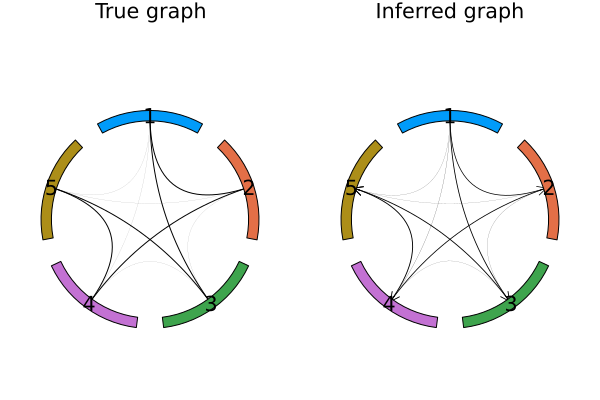

In [11]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij, edgewidth = abs.(Fij), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)


The inferred graph clearly shows that the true couplings are correctly inferred by the Boltzmann machine.

In [12]:
Z = Any[]
for i in 1:size(Fij,1)
    for j in i+1:size(Fij,2)
        if Fij[i,j]>0.7
            push!(Z, [i,j])
        end
    end
end

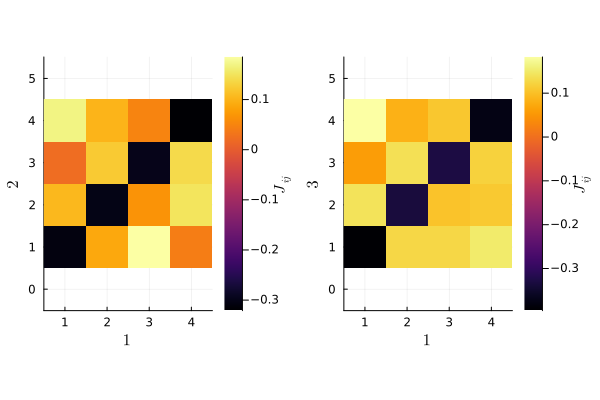

In [13]:
using Plots
using LaTeXStrings
p = Any[]
for i in 1:size(Z,1)
    g = heatmap(J_True[Z[i][1], Z[i][2]], xlabel = L"%$(Z[i][1])", ylabel = L"%$(Z[i][2])", colorbar_title = L"J_{ij}")
    push!(p,g)
end
plot(p[1], p[2], aspect_ratio = 1)

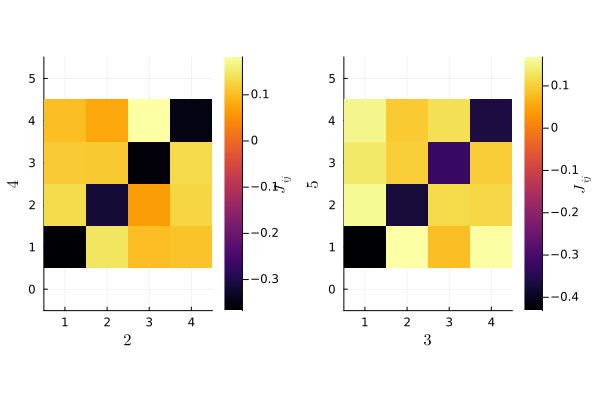

In [14]:
plot(p[3], p[4], aspect_ratio = 1)

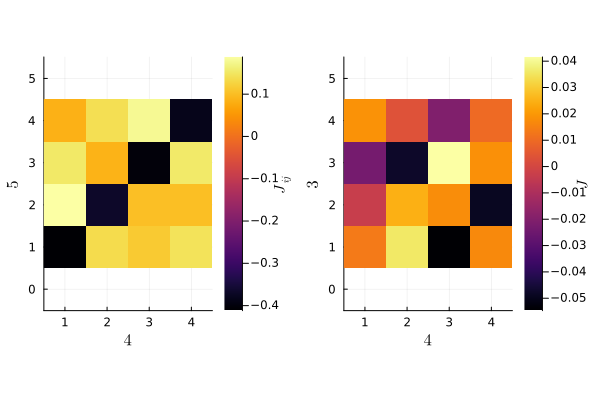

In [15]:
uncorrelated = heatmap(J_True[5,1], xlabel = L"4", ylabel = L"3", colorbar_title = L"J")
plot(p[5], uncorrelated, aspect_ratio = 1)

It is interesting to perform again the estimation of $J$ using a different, Bayesian, approach and then compare the results.

The underlying intuition is the following:

The above "frequentist" Boltzmann machine is aimed at returning a point estimate of J as a result of a maximization problem. In particular, it performs a gradient ascend method in order to maximize the likelihood function and thus it finds numerically the maximum likelihood estimator (MLE) of J, i.e. the value of J for which, under the assumed statistical model, the observed data have the highest joint probability. To better understand its meaning, it is useful to recall that everytime we perform a ML estimation, we are assuming (as in all frequentist statistical inference procedures) a true generating mechanism, that is to say the existence of a true, but unknown, value of the parameter that has generated the data and that we aim to unveil. Thanks to their straightforward interpretation and their "good" properties, MLEs are often used to approximate the true parameter and ML estimation has become a dominant tool to make statistical inference.

What we present next requires the switch from a frequentist to a Bayesian point of view.

Bayesian statisticians consider the parameter as an actual random variable which, therfore, has its own probability distribution. Loosely speaking, in Bayesian statistics a probability expresses a degree of belief: before performing the experiment, the prior distribution of the parameter encodes the a-priori beliefs about the parameter, i.e. what we expect, for any kind of reason, before observing the data. After collecting the data, Bayes theorem is used to incorporate these information in the prior distribution. The result is the so-called posterior distribution of the considered parameter and it embodies our updated beliefs about the parameter, once evidence is observed. The posterior distribution contains our full knowledge about the parameter.

Mathematically, given a prior probability $P(\theta)$ and a likelihood function $P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right)$, the posterior distribution of $\theta$ is, up to a proportionality constant, obtained as

$$P\left(\theta | \,\left\{x^{(m)}\right\}_{i=1}^M\right) \quad \propto \quad P(\theta) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,\theta \right) $$

The posterior distribution is at the heart of Bayesian inference. Indeed, depending on the situations, meaningful statistics of the parameter can be derived from it and used as estimates of the parameter itself. To be more precise, Bayesian estimation methods are based on the minimization of the posterior risk with respect to a specified loss function. For instance, for a quadratic loss, an absolute error loss or the 0-1 loss function, the Bayes estimator is given, respectively, by the posterior mean, median and mode.

To be more complete, let us mention the fact that dealing with the 0-1 loss function is actually trickier. Everything works fine in the discrete case, whereas in the continuous one it needs to be expressed in terms of the Dirac delta distribution (and thus it would not be properly a function anymore).

In the particular situation we are considering, we aim at modifying the Boltzmann machine so that it would not return the MLE of our parameter $J$, but an estimate that "exploits" its posterior distribution. As we have shortly argued above, there is not a unique choice for the estimator to be used, nevertheless the maximum a posteriori (MAP) estimate appeared to us as the most natural one.

The MAP estimate is, by definition, the value that maximizes the posterior distribution (its mode):
$$J_{MAP} = \argmax_{J} P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)$$

Its interpretation is clear: it corresponds to the "point" in the parameter space with the "highest probability of occurence", given both the observed data and prior information.

It is also interesting (and easy to observe) that if the prior distribution over the parameter is chosen to be uniform, then the MAP estimate actually coincides with the MLE. Generally a uniform prior distribution is interpreted as an uninformative prior distribution, meaning that it is used when no prior information is available or to prevent our prior beliefs from affecting the results. As a consequence the posterior distribution will be totally specified by the likelihood function and the MLE will be retrieved. This provides further support to our estimation choice: the previous estimation procedure intrinsically emerges as a special case (the one corresponding to a uniform prior distribution) of the method we are going to present.

As a final remark, we can say that the MAP estimate can be considered a "Bayesian generalization of the MLE", since it corresponds to the mode of an augmented optimization objective which incorporates the prior distribution (that quantifies the a-priori additional information available).

Given everything we have said, let us design the new Boltzmann machine learning scheme. Exactly as before, we use an iterative update of $J$ based on a gradient ascend method, hence we need to compute the gradient of the objective function we want to maximizes:

$$\begin{aligned}
P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right) = \quad \propto \quad &P(J) \, P\left(\left\{x^{(m)}\right\}_{i=1}^M | \,J \right)\\ & e^{-\lambda \sum_{a,b,i,j}\lvert J_{ij}(a,b) \rvert} \, \prod_m\frac{1}{Z}e^{\sum_{i,j}\sum_{a,b}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}}
\end{aligned}$$

(note that it is concave so it has only one maximum and the gradient ascend method can be performed)

It is convenient to take its logarithm and divide everything by M:
$$ (\star) \quad \frac{1}{M} log\left(P\left(J \, | \,\left\{x^{(m)}\right\}_{i=1}^M\right)\right) = - \frac{\lambda}{M}\sum_{a,b,i,j} \lvert J_{ij}(a,b) \rvert + {\frac{1}{M}} \sum_{i,j}\sum_{a,b}\sum_mJ_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \log\left[ Z\left( J\right)\right]$$

We can now derive the gradient:
\begin{align}
\frac{\partial (\star) }{\partial J_{i,j}(a,b)} & = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + {\frac{1}{M}} \sum_{m} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} - \frac{1}{Z\left( J\right)} \sum_{\boldsymbol{x}} \delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)} e^{\sum_{i,j}\sum_{ab}J_{ij}(a,b)\delta_{(x_i^{(m)},a)}\delta_{(x_j^{(m)},b)}} \\
& = {-\frac{\lambda}{M}} sign\left( J_{i,j}(a,b) \right) + { < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}}}
\end{align}

The Boltzmann machine learning scheme can therefore being updated as follows:
$$J_{i,j}^{t+1}(a,b) \leftarrow J_{i,j}^{t}(a,b) \, {-\frac{\lambda*\lambda_{J}}{M}} sign\left( J_{i,j}(a,b) \right) + \lambda_{J} \left[ < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{data}} -  < \delta_{(x_i,a)} \delta_{(x_j,b)} >_{\mathrm{model}\left(t \right)} \right] $$

As a matter of notation, we will denote the parameter $\lambda$ of the prior distribution as $\lambda_{prior}$.

In [16]:
using ProgressMeter
using Distributions

function boltzmann_learning_MAP(sij::Array{Matrix{Float64}}, J::Array{Matrix{Float64}}; 
                            λ::Float64 = 0.1, λ_prior::Float64 = 0.1, Tmax::Int64 = 500, Teq::Int = 500,
                            Twait::Int = 100, dmax::Int64 = 500, εmax::Float64 = 1e-2)

    N = size(sij, 1)
    q = size(sij[1], 1)

    xall = zeros(Int64, dmax, N)
    x = sample(1:q, N, replace = true)   # the initial configuration is a random sequence of numbers between 1 and q

    sij_model = Array{Matrix{Float64}}(undef, N, N) 
    for i in eachindex(sij_model)
        sij_model[i] = zeros(Float64, q, q)
    end

    t = 0
    ε = 1

    ProgressMeter.ijulia_behavior(:clear)
    p = ProgressUnknown("Learning...")
    while t <= Tmax && ε > εmax     # time associated with learning epochs. 
        t += 1
        fill!(xall, 0)
        x = sample(1:q, N, replace = true)

        for d in 1:Teq  # time associated with the equilibration of the MC        
            x = metropolis_ising(x, J)     # we update the initial random configuration using metropolis_ising.
        end

        for d in 1:dmax     # dmax is the number of samples of my Markov Chain that I want to store in order to estimate the J matrix of the model
                            # although dmax may be different with respect to the number of samples that we have, it is advisable to use a dmax
                            # that is similar to the total number of samples that we have
            for d1 in 1:Twait
                x = metropolis_ising(x, J)
            end
            xall[d,:] = x
        end 

        sij_model = compute_stats(xall, dmax)    # now compute_stats takes as input our configurations, hence it returns the frequencies of the model
        Δsij = sij  .- sij_model 
        J .= J + λ .* (Δsij)    # J is updated using the gradient acend scheme
        for i in 1:N, j in 1:N
            J[i,j] = J[i,j] - (λ_prior*λ)/dmax .* sign.(J[i,j])
        end
        
        ε = 0.0
        for i in eachindex(Δsij)
            ε_new = maximum(abs.(Δsij[i]))
            if ε_new > ε
                ε = ε_new
            end
        end

        if mod(t, 10) == 0
            ProgressMeter.next!(p; showvalues = [(:ε , ε)])
        end
    end

    ProgressMeter.finish!(p)

    return J, sij_model, ε, xall

end

boltzmann_learning_MAP (generic function with 1 method)

In [17]:
N = 5
q = 4

J_MAP = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J_MAP)
    J_MAP[i] = zeros(Float64, q, q)
end

J_MAP, sij_model, ε, xall = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = 500, εmax = 1e-2)

Learning... 2 	 Time: 0:00:00
  ε:  0.045499999999999985

Learning... 3 	 Time: 0:00:00
  ε:  0.0505

Learning... 4 	 Time: 0:00:01
  ε:  0.046500000000000014

Learning... 5 	 Time: 0:00:01
  ε:  0.0465

Learning... 6 	 Time: 0:00:01
  ε:  0.04500000000000001

Learning... 7 	 Time: 0:00:01
  ε:  0.05149999999999999

Learning... 8 	 Time: 0:00:02
  ε:  0.04249999999999998

Learning... 9 	 Time: 0:00:02
  ε:  0.0695

Learning... 10 	 Time: 0:00:02
  ε:  0.0695

Learning... 11 	 Time: 0:00:02
  ε:  0.045999999999999985

Learning... 12 	 Time: 0:00:02
  ε:  0.044999999999999984

Learning... 13 	 Time: 0:00:03
  ε:  0.0325

Learning... 14 	 Time: 0:00:03
  ε:  0.043999999999999984

Learning... 15 	 Time: 0:00:03
  ε:  0.034999999999999976

Learning... 16 	 Time: 0:00:03
  ε:  0.034499999999999975

Learning... 17 	 Time: 0:00:04
  ε:  0.049000000000000016

Learning... 18 	 Time: 0:00:04
  ε:  0.056499999999999995

Learning... 19 	 Time: 0:00:04
  ε:  0.056999999999999995

Learning... 20 	 Time: 0:00:04
  ε:  0.04899999999999999

Learning... 21 	 Time: 0:00:05
  ε:  0.025499999999999967

Learning... 22 	 Time: 0:00:05
  ε:  0.04299999999999998

Learning... 23 	 Time: 0:00:05
  ε:  0.033999999999999975

Learning... 24 	 Time: 0:00:05
  ε:  0.04350000000000001

Learning... 25 	 Time: 0:00:06
  ε:  0.056999999999999995

Learning... 26 	 Time: 0:00:06
  ε:  0.035499999999999976

Learning... 27 	 Time: 0:00:06
  ε:  0.03749999999999998

Learning... 28 	 Time: 0:00:06
  ε:  0.03999999999999998

Learning... 29 	 Time: 0:00:07
  ε:  0.03949999999999998

Learning... 30 	 Time: 0:00:07
  ε:  0.026499999999999968

Learning... 31 	 Time: 0:00:07
  ε:  0.0325

Learning... 32 	 Time: 0:00:07
  ε:  0.05249999999999999

Learning... 33 	 Time: 0:00:07
  ε:  0.046499999999999986

Learning... 34 	 Time: 0:00:08
  ε:  0.04450000000000001

Learning... 35 	 Time: 0:00:08
  ε:  0.030999999999999972

Learning... 36 	 Time: 0:00:08
  ε:  0.04450000000000001

Learning... 37 	 Time: 0:00:08
  ε:  0.04450000000000001

Learning... 38 	 Time: 0:00:09
  ε:  0.055499999999999994

Learning... 39 	 Time: 0:00:09
  ε:  0.044499999999999984

Learning... 40 	 Time: 0:00:09
  ε:  0.03900000000000001

Learning... 41 	 Time: 0:00:09
  ε:  0.032999999999999974

Learning... 42 	 Time: 0:00:10
  ε:  0.034

Learning... 43 	 Time: 0:00:10
  ε:  0.028499999999999998

Learning... 44 	 Time: 0:00:10
  ε:  0.0655

Learning... 45 	 Time: 0:00:10
  ε:  0.038500000000000006

Learning... 46 	 Time: 0:00:11
  ε:  0.05099999999999999

Learning... 47 	 Time: 0:00:11
  ε:  0.037000000000000005

Learning... 48 	 Time: 0:00:11
  ε:  0.05149999999999999

Learning... 49 	 Time: 0:00:11
  ε:  0.0605

Learning... 50 	 Time: 0:00:12
  ε:  0.048500000000000015

Learning... 50 	 Time: 0:00:12


([[-0.006229999999999906 0.0 0.0 0.0; 0.0 0.005030000000000183 0.0 0.0; 0.0 0.0 -0.0037300000000011126 0.0; 0.0 0.0 0.0 0.0007300000000000945] [-0.31877999999999435 0.08857999999999787 0.17373000000000288 0.03280000000000068; 0.09516999999999735 -0.3114299999999945 0.06688000000000013 0.14151000000000183; 0.010820000000000163 0.11357999999999698 -0.2845799999999956 0.13283000000000034; 0.17548000000000252 0.08671999999999752 0.04053000000000061 -0.31737999999999394] … [0.024960000000000572 -0.04801000000000021 0.04723000000000044 -0.0278700000000004; -0.052480000000000505 0.043880000000000155 0.039350000000000725 -0.01858000000000052; -0.008469999999999908 0.02369 -0.038030000000000355 0.01318000000000012; 0.010729999999999872 -0.009749999999999913 -0.0701799999999975 0.07222999999999741] [0.008600000000000184 -0.001450000000000258 -0.027830000000000278 0.01377000000000023; 0.005360000000000374 0.03706000000000071 -0.04603000000000052 -0.0004999999999999365; -0.04548000000000038 0.0264

As before, we detect the "interacting" variables by means of the Frobenius norm of each coupling matrix.

In [18]:
Fij_MAP = Frobenius(J_MAP)

5×5 Matrix{Float64}:
 0.00886339  0.723604   0.835138   0.158474   0.120795
 0.723604    0.0186679  0.119344   0.805495   0.0969079
 0.835138    0.119344   0.0115726  0.100587   0.868286
 0.158474    0.805495   0.100587   0.0326683  0.886778
 0.120795    0.0969079  0.868286   0.886778   0.0136285

It is easy to verify that the just computed coupling pattern fit the previous one. Indeed, even if the entities of the norms may be differ a bit, the detected contacting (or interacting) site pairs correspond exactly.

Note that this is also important to target the coherence of our results: at least nothing seems to suggest that our procedures are wrong.

Before continuing the comparison of the two strategies - the frequentist and the Bayesian one - we target rapidly the choice of the parameter $\lambda_{prior}$ of the prior distribution. Loosely speaking, as the sample size increases, the likelihood becomes more and more relevant in determining the posterior distribution, however an inappropriate prior distribution may dramatically slow down the convergence or even lead to inconsistent results. Therefore, in real-life applications, it is preferable to determine it by means of cross-validation.

To adress our particular case it may be useful to try to understand the meaning of the prior distribution.

We can eaily recognize, in its exponential, the L1-norm of the parameter coupling matrix $J$. Now, since our aim is to maximize the posterior distribution, the chosen $L_1$ prior imposes a sparse solution by adding a "penalty" that increases quickly near the origin, with a linear slope. In other words, because the prior is an exponentially
decaying function, in the course of inference it favors matrices $J$ with small $L_1-norms$ and penalises $J$'s with large $L_1-norms$, . More generally, this prior may be seen as a regulariser: it penalises large parameter values that may arise through maximization of the log-likelihood.

Actually, something more interesting can be said: if we consider the whole class of $L_p-norm$ priors

$$p(J) = e^{-\lambda \, \lvert\lvert J \rvert\rvert_p} $$

it can be proven that the $L_1$ prior is the only one that favours sparsity while preserving the concavity of the log-likelihood into the log-posterior.

In our case, we have been explicitely asked to choose a small $\lambda_{prior}$ in the prior distribution. Heuristically, we may understand this request by noticing that if $\lambda_{prior}$ is large, then the prior distribution returns values very close to zero (for every J whose norm 1 is different from zero). This may result in a posterior distribution that is "too flat" and depends only poorly on the likelihood. In other words we can say that the model is overconstrained by the prior, and has not enough power to account for the true distribution of the data.

Conversely, choosing a $\lambda_{prior}$ that is too small makes almost irrelevant the presence of the prior distribution (indeed in the limit $\lambda_{prior} \to 0$ the prior distribution becomes closer and closer to a uniform one). As a consequence we may say that, for low $\lambda_{prior}$ values, the inferred model overfits the details of the data set and this is actually one of the things aimed to avoid using a Bayesian framework.

For these reasons we decided to choose a "good compromise" between these extreme behaviors: $\lambda_{prior} = 0.1$ appears to us as a good choice.

Below we tried to re-run the *boltzmann_learning_MAP* function for different values of $\lambda_{prior}$.

In [19]:
λ_prior = 0.1 #10.0, 1.0, 0.01
q = 4
fill!(J_MAP, zeros(Float64, q,q))
J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = λ_prior, Tmax = 500, εmax = 1e-2)

Fij_MAP = Frobenius(J_MAP)

Learning... 2 	 Time: 0:00:00
  ε:  0.0495

Learning... 3 	 Time: 0:00:00
  ε:  0.039

Learning... 4 	 Time: 0:00:00
  ε:  0.039999999999999994

Learning... 5 	 Time: 0:00:01
  ε:  0.0615

Learning... 6 	 Time: 0:00:01
  ε:  0.044999999999999984

Learning... 7 	 Time: 0:00:01
  ε:  0.037000000000000005

Learning... 8 	 Time: 0:00:01
  ε:  0.03649999999999998

Learning... 9 	 Time: 0:00:02
  ε:  0.035500000000000004

Learning... 10 	 Time: 0:00:02
  ε:  0.04250000000000001

Learning... 11 	 Time: 0:00:02
  ε:  0.033499999999999974

Learning... 12 	 Time: 0:00:02
  ε:  0.031

Learning... 13 	 Time: 0:00:03
  ε:  0.04749999999999999

Learning... 14 	 Time: 0:00:03
  ε:  0.044499999999999984

Learning... 15 	 Time: 0:00:03
  ε:  0.037500000000000006

Learning... 16 	 Time: 0:00:03
  ε:  0.04749999999999999

Learning... 17 	 Time: 0:00:04
  ε:  0.04150000000000001

Learning... 18 	 Time: 0:00:04
  ε:  0.04349999999999998

Learning... 19 	 Time: 0:00:04
  ε:  0.04749999999999999

Learning... 20 	 Time: 0:00:04
  ε:  0.030000000000000027

Learning... 21 	 Time: 0:00:05
  ε:  0.045499999999999985

Learning... 22 	 Time: 0:00:05
  ε:  0.03999999999999998

Learning... 23 	 Time: 0:00:05
  ε:  0.04999999999999999

Learning... 24 	 Time: 0:00:05
  ε:  0.055499999999999994

Learning... 25 	 Time: 0:00:06
  ε:  0.03649999999999998

Learning... 26 	 Time: 0:00:06
  ε:  0.044499999999999984

Learning... 27 	 Time: 0:00:06
  ε:  0.043999999999999984

Learning... 28 	 Time: 0:00:06
  ε:  0.05349999999999999

Learning... 29 	 Time: 0:00:06
  ε:  0.045999999999999985

Learning... 30 	 Time: 0:00:07
  ε:  0.03750000000000003

Learning... 31 	 Time: 0:00:07
  ε:  0.058499999999999996

Learning... 32 	 Time: 0:00:07
  ε:  0.04199999999999998

Learning... 33 	 Time: 0:00:07
  ε:  0.03200000000000003

Learning... 34 	 Time: 0:00:08
  ε:  0.064

Learning... 35 	 Time: 0:00:08
  ε:  0.04049999999999998

Learning... 36 	 Time: 0:00:08
  ε:  0.04149999999999998

Learning... 37 	 Time: 0:00:08
  ε:  0.03899999999999998

Learning... 38 	 Time: 0:00:09
  ε:  0.036000000000000004

Learning... 39 	 Time: 0:00:09
  ε:  0.05000000000000002

Learning... 40 	 Time: 0:00:09
  ε:  0.04949999999999999

Learning... 41 	 Time: 0:00:09
  ε:  0.046499999999999986

Learning... 42 	 Time: 0:00:10
  ε:  0.04149999999999998

Learning... 43 	 Time: 0:00:10
  ε:  0.0325

Learning... 44 	 Time: 0:00:10
  ε:  0.035500000000000004

Learning... 45 	 Time: 0:00:10
  ε:  0.03600000000000003

Learning... 46 	 Time: 0:00:11
  ε:  0.04300000000000001

Learning... 47 	 Time: 0:00:11
  ε:  0.048000000000000015

Learning... 48 	 Time: 0:00:11
  ε:  0.03849999999999999

Learning... 49 	 Time: 0:00:11
  ε:  0.03400000000000003

Learning... 50 	 Time: 0:00:11
  ε:  0.04050000000000001

Learning... 50 	 Time: 0:00:12


5×5 Matrix{Float64}:
 0.0146051  0.725051   0.827274   0.163277   0.119716
 0.725051   0.0148174  0.130704   0.789252   0.102383
 0.827274   0.130704   0.0226643  0.0931311  0.864905
 0.163277   0.789252   0.0931311  0.0255549  0.896241
 0.119716   0.102383   0.864905   0.896241   0.0156662

As expected for large values of $\lambda_{prior}$, the Boltzmann machine learning scheme does not seem to work properly. Indeed, by looking at the corresponding Frobenius norms, we can observe that the entries of the inferred coupling matrix (and so their Frobenius norms) are eccesively drawn toward zero. This suits perfectly our previus interpretation: for large values of $\lambda_{prior}$ the prior is over-weighted and, consequently, the prior is over-constrained. This lead to a very sparse coupling matrix. Nevertheless we are still able to detect the strongest couplings.

For what concerns small - but still sufficiently different from zero - values of $\lambda_{prior}$ (such as $\lambda_{prior} = 0.5, \, 0.1, \, 0.01$) we found consistency with the previous method.

This is important since it gives us a further check of the previous results.

We now proceed with our comparison: our current aim is to tackle the efficiency of the two approaches.

More precisely, since we are mainly interested in detecting the "interacting variables" - i.e. the pairs of variables that score high in the Frobenius norm matrix - we appreciate the efficiency of the methods by looking at "how strong the couplings of the interacting variables are". In addition, it is also interesting to check wheter the "gap" between the Frobenius norms of the most coupled and less coupled variables remains sufficiently large.

To do so we re-run the Boltzmann machine algorithms letting the number of iterations performed by the Boltzmann learning schemas vary:

In [20]:
Tmax_range = [100, 500, 1000, 2500, 5000]
Fij_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))
Fij_MAP_Tmax = Vector{Matrix{Float64}}(undef, length(Tmax_range))

J = Array{Matrix{Float64}}(undef, N, N) 
for i in eachindex(J)
    J[i] = zeros(Float64, q, q)
end

for (i, Tmax) in enumerate(Tmax_range)
    fill!(J, zeros(Float64, q,q))
    fill!(J_MAP, zeros(Float64, q,q))

    J, _ = boltzmann_learning(sij, J, λ = 0.1, Tmax = Tmax, εmax = 1e-2)
    J_MAP, _ = boltzmann_learning_MAP(sij, J_MAP, λ = 0.1, λ_prior = 0.1, Tmax = Tmax, εmax = 1e-2)

    Fij_Tmax[i] = Frobenius(J)
    Fij_MAP_Tmax[i] = Frobenius(J_MAP)   
end

Learning... 2 	 Time: 0:00:00
  ε:  0.04700000000000001

Learning... 3 	 Time: 0:00:00
  ε:  0.058499999999999996

Learning... 4 	 Time: 0:00:00
  ε:  0.05449999999999999

Learning... 5 	 Time: 0:00:01
  ε:  0.0455

Learning... 6 	 Time: 0:00:01
  ε:  0.047500000000000014

Learning... 7 	 Time: 0:00:01
  ε:  0.05049999999999999

Learning... 8 	 Time: 0:00:02
  ε:  0.044499999999999984

Learning... 9 	 Time: 0:00:02
  ε:  0.044499999999999984

Learning... 10 	 Time: 0:00:02
  ε:  0.044999999999999984

Learning... 10 	 Time: 0:00:02


Learning... 2 	 Time: 0:00:00
  ε:  0.043000000000000003

Learning... 3 	 Time: 0:00:00
  ε:  0.07550000000000001

Learning... 4 	 Time: 0:00:01
  ε:  0.048999999999999995

Learning... 5 	 Time: 0:00:01
  ε:  0.03200000000000003

Learning... 6 	 Time: 0:00:01
  ε:  0.04350000000000004

Learning... 7 	 Time: 0:00:01
  ε:  0.03550000000000003

Learning... 8 	 Time: 0:00:02
  ε:  0.04749999999999999

Learning... 9 	 Time: 0:00:02
  ε:  0.037

Learning... 10 	 Time: 0:00:02
  ε:  0.031000000000000007

Learning... 10 	 Time: 0:00:02


Learning... 2 	 Time: 0:00:00
  ε:  0.04250000000000001

Learning... 3 	 Time: 0:00:00
  ε:  0.045000000000000005

Learning... 4 	 Time: 0:00:01
  ε:  0.034

Learning... 5 	 Time: 0:00:01
  ε:  0.046999999999999986

Learning... 6 	 Time: 0:00:01
  ε:  0.052500000000000005

Learning... 7 	 Time: 0:00:01
  ε:  0.038000000000000006

Learning... 8 	 Time: 0:00:02
  ε:  0.036

Learning... 9 	 Time: 0:00:02
  ε:  0.04899999999999999

Learning... 10 	 Time: 0:00:02
  ε:  0.04150000000000001

Learning... 11 	 Time: 0:00:02
  ε:  0.04849999999999999

Learning... 12 	 Time: 0:00:03
  ε:  0.046499999999999986

Learning... 13 	 Time: 0:00:03
  ε:  0.0595

Learning... 14 	 Time: 0:00:03
  ε:  0.0315

Learning... 15 	 Time: 0:00:03
  ε:  0.04400000000000001

Learning... 16 	 Time: 0:00:04
  ε:  0.034

Learning... 17 	 Time: 0:00:04
  ε:  0.04150000000000001

Learning... 18 	 Time: 0:00:04
  ε:  0.0665

Learning... 19 	 Time: 0:00:04
  ε:  0.057499999999999996

Learning... 20 	 Time: 0:00:05
  ε:  0.0345

Learning... 21 	 Time: 0:00:05
  ε:  0.043999999999999984

Learning... 22 	 Time: 0:00:05
  ε:  0.044999999999999984

Learning... 23 	 Time: 0:00:06
  ε:  0.0635

Learning... 24 	 Time: 0:00:06
  ε:  0.034

Learning... 25 	 Time: 0:00:06
  ε:  0.04099999999999998

Learning... 26 	 Time: 0:00:06
  ε:  0.036000000000000004

Learning... 27 	 Time: 0:00:07
  ε:  0.034999999999999976

Learning... 28 	 Time: 0:00:07
  ε:  0.03550000000000003

Learning... 29 	 Time: 0:00:07
  ε:  0.038500000000000006

Learning... 30 	 Time: 0:00:07
  ε:  0.04349999999999998

Learning... 31 	 Time: 0:00:08
  ε:  0.030999999999999993

Learning... 32 	 Time: 0:00:08
  ε:  0.04149999999999998

Learning... 33 	 Time: 0:00:08
  ε:  0.0345

Learning... 34 	 Time: 0:00:08
  ε:  0.0595

Learning... 35 	 Time: 0:00:09
  ε:  0.03649999999999998

Learning... 36 	 Time: 0:00:09
  ε:  0.038500000000000006

Learning... 37 	 Time: 0:00:09
  ε:  0.056499999999999995

Learning... 38 	 Time: 0:00:09
  ε:  0.04600000000000001

Learning... 39 	 Time: 0:00:10
  ε:  0.055999999999999994

Learning... 40 	 Time: 0:00:10
  ε:  0.0325

Learning... 41 	 Time: 0:00:10
  ε:  0.0485

Learning... 42 	 Time: 0:00:10
  ε:  0.045499999999999985

Learning... 43 	 Time: 0:00:11
  ε:  0.05299999999999999

Learning... 44 	 Time: 0:00:11
  ε:  0.04849999999999999

Learning... 45 	 Time: 0:00:11
  ε:  0.05000000000000002

Learning... 46 	 Time: 0:00:11
  ε:  0.03949999999999998

Learning... 47 	 Time: 0:00:12
  ε:  0.037000000000000005

Learning... 48 	 Time: 0:00:12
  ε:  0.04199999999999998

Learning... 49 	 Time: 0:00:12
  ε:  0.03949999999999998

Learning... 50 	 Time: 0:00:12
  ε:  0.04049999999999998

Learning... 50 	 Time: 0:00:12


Learning... 2 	 Time: 0:00:00
  ε:  0.037500000000000006

Learning... 3 	 Time: 0:00:00
  ε:  0.05399999999999999

Learning... 4 	 Time: 0:00:01
  ε:  0.04999999999999999

Learning... 5 	 Time: 0:00:01
  ε:  0.04050000000000001

Learning... 6 	 Time: 0:00:01
  ε:  0.058499999999999996

Learning... 7 	 Time: 0:00:01
  ε:  0.04899999999999999

Learning... 8 	 Time: 0:00:02
  ε:  0.04150000000000004

Learning... 9 	 Time: 0:00:02
  ε:  0.04049999999999998

Learning... 10 	 Time: 0:00:02
  ε:  0.05349999999999999

Learning... 11 	 Time: 0:00:02
  ε:  0.04350000000000001

Learning... 12 	 Time: 0:00:03
  ε:  0.05000000000000002

Learning... 13 	 Time: 0:00:03
  ε:  0.04249999999999998

Learning... 14 	 Time: 0:00:03
  ε:  0.036500000000000005

Learning... 15 	 Time: 0:00:03
  ε:  0.04149999999999998

Learning... 16 	 Time: 0:00:04
  ε:  0.05449999999999999

Learning... 17 	 Time: 0:00:04
  ε:  0.04300000000000001

Learning... 18 	 Time: 0:00:04
  ε:  0.038000000000000006

Learning... 19 	 Time: 0:00:04
  ε:  0.043999999999999984

Learning... 20 	 Time: 0:00:05
  ε:  0.038000000000000034

Learning... 21 	 Time: 0:00:05
  ε:  0.033999999999999975

Learning... 22 	 Time: 0:00:05
  ε:  0.03799999999999999

Learning... 23 	 Time: 0:00:05
  ε:  0.038000000000000006

Learning... 24 	 Time: 0:00:06
  ε:  0.030500000000000027

Learning... 25 	 Time: 0:00:06
  ε:  0.036

Learning... 26 	 Time: 0:00:06
  ε:  0.03649999999999998

Learning... 27 	 Time: 0:00:06
  ε:  0.036500000000000005

Learning... 28 	 Time: 0:00:07
  ε:  0.03950000000000001

Learning... 29 	 Time: 0:00:07
  ε:  0.0635

Learning... 30 	 Time: 0:00:07
  ε:  0.04249999999999998

Learning... 31 	 Time: 0:00:07
  ε:  0.03749999999999998

Learning... 32 	 Time: 0:00:08
  ε:  0.0305

Learning... 33 	 Time: 0:00:08
  ε:  0.05000000000000002

Learning... 34 	 Time: 0:00:08
  ε:  0.04849999999999999

Learning... 35 	 Time: 0:00:08
  ε:  0.055999999999999994

Learning... 36 	 Time: 0:00:09
  ε:  0.04999999999999999

Learning... 37 	 Time: 0:00:09
  ε:  0.04550000000000001

Learning... 38 	 Time: 0:00:09
  ε:  0.047500000000000014

Learning... 39 	 Time: 0:00:09
  ε:  0.03699999999999999

Learning... 40 	 Time: 0:00:10
  ε:  0.04500000000000001

Learning... 41 	 Time: 0:00:10
  ε:  0.05249999999999999

Learning... 42 	 Time: 0:00:10
  ε:  0.03350000000000003

Learning... 43 	 Time: 0:00:10
  ε:  0.04999999999999999

Learning... 44 	 Time: 0:00:11
  ε:  0.04249999999999998

Learning... 45 	 Time: 0:00:11
  ε:  0.030999999999999972

Learning... 46 	 Time: 0:00:11
  ε:  0.023000000000000007

Learning... 47 	 Time: 0:00:11
  ε:  0.04849999999999999

Learning... 48 	 Time: 0:00:12
  ε:  0.04050000000000001

Learning... 49 	 Time: 0:00:12
  ε:  0.045999999999999985

Learning... 50 	 Time: 0:00:12
  ε:  0.035999999999999976

Learning... 50 	 Time: 0:00:12


Learning... 2 	 Time: 0:00:00
  ε:  0.052500000000000005

Learning... 3 	 Time: 0:00:00
  ε:  0.0455

Learning... 4 	 Time: 0:00:00
  ε:  0.048999999999999995

Learning... 5 	 Time: 0:00:01
  ε:  0.0485

Learning... 6 	 Time: 0:00:01
  ε:  0.045000000000000005

Learning... 7 	 Time: 0:00:01
  ε:  0.038000000000000006

Learning... 8 	 Time: 0:00:01
  ε:  0.05050000000000002

Learning... 9 	 Time: 0:00:02
  ε:  0.04450000000000001

Learning... 10 	 Time: 0:00:02
  ε:  0.03749999999999998

Learning... 11 	 Time: 0:00:02
  ε:  0.03950000000000001

Learning... 12 	 Time: 0:00:02
  ε:  0.035999999999999976

Learning... 13 	 Time: 0:00:03
  ε:  0.04799999999999999

Learning... 14 	 Time: 0:00:03
  ε:  0.03900000000000001

Learning... 15 	 Time: 0:00:03
  ε:  0.035500000000000004

Learning... 16 	 Time: 0:00:03
  ε:  0.04150000000000004

Learning... 17 	 Time: 0:00:04
  ε:  0.04300000000000001

Learning... 18 	 Time: 0:00:04
  ε:  0.056499999999999995

Learning... 19 	 Time: 0:00:04
  ε:  0.03

Learning... 20 	 Time: 0:00:04
  ε:  0.03649999999999998

Learning... 21 	 Time: 0:00:05
  ε:  0.02849999999999997

Learning... 22 	 Time: 0:00:05
  ε:  0.045999999999999985

Learning... 23 	 Time: 0:00:05
  ε:  0.036500000000000005

Learning... 24 	 Time: 0:00:06
  ε:  0.037500000000000006

Learning... 25 	 Time: 0:00:06
  ε:  0.07850000000000001

Learning... 26 	 Time: 0:00:06
  ε:  0.026999999999999996

Learning... 27 	 Time: 0:00:06
  ε:  0.026000000000000002

Learning... 28 	 Time: 0:00:07
  ε:  0.05149999999999999

Learning... 29 	 Time: 0:00:07
  ε:  0.04249999999999998

Learning... 30 	 Time: 0:00:07
  ε:  0.04050000000000001

Learning... 31 	 Time: 0:00:07
  ε:  0.07600000000000001

Learning... 32 	 Time: 0:00:08
  ε:  0.035500000000000004

Learning... 33 	 Time: 0:00:08
  ε:  0.056999999999999995

Learning... 34 	 Time: 0:00:08
  ε:  0.03799999999999998

Learning... 35 	 Time: 0:00:08
  ε:  0.05150000000000002

Learning... 36 	 Time: 0:00:09
  ε:  0.02749999999999997

Learning... 37 	 Time: 0:00:09
  ε:  0.057499999999999996

Learning... 38 	 Time: 0:00:09
  ε:  0.032999999999999974

Learning... 39 	 Time: 0:00:09
  ε:  0.05249999999999999

Learning... 40 	 Time: 0:00:10
  ε:  0.07050000000000001

Learning... 41 	 Time: 0:00:10
  ε:  0.044999999999999984

Learning... 42 	 Time: 0:00:10
  ε:  0.04299999999999998

Learning... 43 	 Time: 0:00:10
  ε:  0.03250000000000003

Learning... 44 	 Time: 0:00:11
  ε:  0.05000000000000002

Learning... 45 	 Time: 0:00:11
  ε:  0.03749999999999998

Learning... 46 	 Time: 0:00:11
  ε:  0.05149999999999999

Learning... 47 	 Time: 0:00:11
  ε:  0.03250000000000003

Learning... 48 	 Time: 0:00:12
  ε:  0.04450000000000001

Learning... 49 	 Time: 0:00:12
  ε:  0.0335

Learning... 50 	 Time: 0:00:12
  ε:  0.07050000000000001

Learning... 51 	 Time: 0:00:12
  ε:  0.04150000000000001

Learning... 52 	 Time: 0:00:13
  ε:  0.0335

Learning... 53 	 Time: 0:00:13
  ε:  0.04199999999999998

Learning... 54 	 Time: 0:00:13
  ε:  0.0375

Learning... 55 	 Time: 0:00:13
  ε:  0.05449999999999999

Learning... 56 	 Time: 0:00:14
  ε:  0.0315

Learning... 57 	 Time: 0:00:14
  ε:  0.02899999999999999

Learning... 58 	 Time: 0:00:14
  ε:  0.0305

Learning... 59 	 Time: 0:00:14
  ε:  0.03750000000000003

Learning... 60 	 Time: 0:00:15
  ε:  0.0325

Learning... 61 	 Time: 0:00:15
  ε:  0.043999999999999984

Learning... 62 	 Time: 0:00:15
  ε:  0.034

Learning... 63 	 Time: 0:00:15
  ε:  0.04099999999999998

Learning... 64 	 Time: 0:00:16
  ε:  0.033

Learning... 65 	 Time: 0:00:16
  ε:  0.034

Learning... 66 	 Time: 0:00:16
  ε:  0.038500000000000006

Learning... 67 	 Time: 0:00:16
  ε:  0.046999999999999986

Learning... 68 	 Time: 0:00:17
  ε:  0.05750000000000002

Learning... 69 	 Time: 0:00:17
  ε:  0.04299999999999998

Learning... 70 	 Time: 0:00:17
  ε:  0.04100000000000001

Learning... 71 	 Time: 0:00:17
  ε:  0.037000000000000005

Learning... 72 	 Time: 0:00:18
  ε:  0.032

Learning... 73 	 Time: 0:00:18
  ε:  0.046999999999999986

Learning... 74 	 Time: 0:00:18
  ε:  0.03149999999999997

Learning... 75 	 Time: 0:00:18
  ε:  0.02949999999999997

Learning... 76 	 Time: 0:00:19
  ε:  0.044999999999999984

Learning... 77 	 Time: 0:00:19
  ε:  0.04099999999999998

Learning... 78 	 Time: 0:00:19
  ε:  0.028499999999999998

Learning... 79 	 Time: 0:00:19
  ε:  0.031

Learning... 80 	 Time: 0:00:20
  ε:  0.045499999999999985

Learning... 81 	 Time: 0:00:20
  ε:  0.049500000000000016

Learning... 82 	 Time: 0:00:20
  ε:  0.027999999999999997

Learning... 83 	 Time: 0:00:20
  ε:  0.038000000000000006

Learning... 84 	 Time: 0:00:21
  ε:  0.04949999999999999

Learning... 85 	 Time: 0:00:21
  ε:  0.027500000000000024

Learning... 86 	 Time: 0:00:21
  ε:  0.057499999999999996

Learning... 87 	 Time: 0:00:21
  ε:  0.04899999999999999

Learning... 88 	 Time: 0:00:22
  ε:  0.030999999999999972

Learning... 89 	 Time: 0:00:22
  ε:  0.03649999999999998

Learning... 90 	 Time: 0:00:22
  ε:  0.068

Learning... 91 	 Time: 0:00:22
  ε:  0.045999999999999985

Learning... 92 	 Time: 0:00:23
  ε:  0.04249999999999998

Learning... 93 	 Time: 0:00:23
  ε:  0.03449999999999999

Learning... 94 	 Time: 0:00:23
  ε:  0.05449999999999999

Learning... 95 	 Time: 0:00:23
  ε:  0.03999999999999998

Learning... 96 	 Time: 0:00:24
  ε:  0.04199999999999998

Learning... 97 	 Time: 0:00:24
  ε:  0.04500000000000001

Learning... 98 	 Time: 0:00:24
  ε:  0.028000000000000025

Learning... 99 	 Time: 0:00:24
  ε:  0.03649999999999998

Learning... 100 	 Time: 0:00:25
  ε:  0.046499999999999986

Learning... 100 	 Time: 0:00:25


Learning... 2 	 Time: 0:00:00
  ε:  0.052500000000000005

Learning... 3 	 Time: 0:00:00
  ε:  0.039

Learning... 4 	 Time: 0:00:01
  ε:  0.038500000000000006

Learning... 5 	 Time: 0:00:01
  ε:  0.04349999999999998

Learning... 6 	 Time: 0:00:01
  ε:  0.04000000000000001

Learning... 7 	 Time: 0:00:01
  ε:  0.036500000000000005

Learning... 8 	 Time: 0:00:02
  ε:  0.045999999999999985

Learning... 9 	 Time: 0:00:02
  ε:  0.05349999999999999

Learning... 10 	 Time: 0:00:02
  ε:  0.04249999999999998

Learning... 11 	 Time: 0:00:02
  ε:  0.05249999999999999

Learning... 12 	 Time: 0:00:03
  ε:  0.04250000000000001

Learning... 13 	 Time: 0:00:03
  ε:  0.039000000000000035

Learning... 14 	 Time: 0:00:03
  ε:  0.035499999999999976

Learning... 15 	 Time: 0:00:03
  ε:  0.04299999999999998

Learning... 16 	 Time: 0:00:04
  ε:  0.029500000000000026

Learning... 17 	 Time: 0:00:04
  ε:  0.035499999999999976

Learning... 18 	 Time: 0:00:04
  ε:  0.04299999999999998

Learning... 19 	 Time: 0:00:04
  ε:  0.031

Learning... 20 	 Time: 0:00:05
  ε:  0.0595

Learning... 21 	 Time: 0:00:05
  ε:  0.04199999999999998

Learning... 22 	 Time: 0:00:05
  ε:  0.03249999999999997

Learning... 23 	 Time: 0:00:05
  ε:  0.0325

Learning... 24 	 Time: 0:00:06
  ε:  0.057499999999999996

Learning... 25 	 Time: 0:00:06
  ε:  0.03950000000000001

Learning... 26 	 Time: 0:00:06
  ε:  0.034

Learning... 27 	 Time: 0:00:06
  ε:  0.03750000000000003

Learning... 28 	 Time: 0:00:07
  ε:  0.04150000000000001

Learning... 29 	 Time: 0:00:07
  ε:  0.026499999999999996

Learning... 30 	 Time: 0:00:07
  ε:  0.03699999999999998

Learning... 31 	 Time: 0:00:07
  ε:  0.029000000000000005

Learning... 32 	 Time: 0:00:08
  ε:  0.032999999999999974

Learning... 33 	 Time: 0:00:08
  ε:  0.0345

Learning... 34 	 Time: 0:00:08
  ε:  0.03199999999999997

Learning... 35 	 Time: 0:00:08
  ε:  0.04050000000000001

Learning... 36 	 Time: 0:00:09
  ε:  0.05249999999999999

Learning... 37 	 Time: 0:00:09
  ε:  0.033499999999999995

Learning... 38 	 Time: 0:00:09
  ε:  0.05149999999999999

Learning... 39 	 Time: 0:00:09
  ε:  0.04349999999999998

Learning... 40 	 Time: 0:00:10
  ε:  0.028500000000000004

Learning... 41 	 Time: 0:00:10
  ε:  0.039500000000000035

Learning... 42 	 Time: 0:00:10
  ε:  0.0415

Learning... 43 	 Time: 0:00:10
  ε:  0.045999999999999985

Learning... 44 	 Time: 0:00:11
  ε:  0.04199999999999998

Learning... 45 	 Time: 0:00:11
  ε:  0.04450000000000001

Learning... 46 	 Time: 0:00:11
  ε:  0.035999999999999976

Learning... 47 	 Time: 0:00:11
  ε:  0.03899999999999998

Learning... 48 	 Time: 0:00:12
  ε:  0.03500000000000003

Learning... 49 	 Time: 0:00:12
  ε:  0.0325

Learning... 50 	 Time: 0:00:12
  ε:  0.04250000000000001

Learning... 51 	 Time: 0:00:12
  ε:  0.044499999999999984

Learning... 52 	 Time: 0:00:13
  ε:  0.046500000000000014

Learning... 53 	 Time: 0:00:13
  ε:  0.04250000000000001

Learning... 54 	 Time: 0:00:13
  ε:  0.046999999999999986

Learning... 55 	 Time: 0:00:14
  ε:  0.05499999999999999

Learning... 56 	 Time: 0:00:14
  ε:  0.04949999999999999

Learning... 57 	 Time: 0:00:14
  ε:  0.04799999999999999

Learning... 58 	 Time: 0:00:14
  ε:  0.0325

Learning... 59 	 Time: 0:00:15
  ε:  0.03750000000000003

Learning... 60 	 Time: 0:00:15
  ε:  0.04199999999999998

Learning... 61 	 Time: 0:00:15
  ε:  0.044999999999999984

Learning... 62 	 Time: 0:00:15
  ε:  0.05349999999999999

Learning... 63 	 Time: 0:00:16
  ε:  0.02799999999999997

Learning... 64 	 Time: 0:00:16
  ε:  0.056499999999999995

Learning... 65 	 Time: 0:00:16
  ε:  0.036500000000000005

Learning... 66 	 Time: 0:00:16
  ε:  0.0445

Learning... 67 	 Time: 0:00:17
  ε:  0.04749999999999999

Learning... 68 	 Time: 0:00:17
  ε:  0.03

Learning... 69 	 Time: 0:00:17
  ε:  0.03199999999999997

Learning... 70 	 Time: 0:00:17
  ε:  0.056999999999999995

Learning... 71 	 Time: 0:00:18
  ε:  0.030000000000000006

Learning... 72 	 Time: 0:00:18
  ε:  0.04749999999999999

Learning... 73 	 Time: 0:00:18
  ε:  0.0325

Learning... 74 	 Time: 0:00:18
  ε:  0.031000000000000028

Learning... 75 	 Time: 0:00:19
  ε:  0.045499999999999985

Learning... 76 	 Time: 0:00:19
  ε:  0.04350000000000001

Learning... 77 	 Time: 0:00:19
  ε:  0.05099999999999999

Learning... 78 	 Time: 0:00:20
  ε:  0.0345

Learning... 79 	 Time: 0:00:20
  ε:  0.04249999999999998

Learning... 80 	 Time: 0:00:20
  ε:  0.0635

Learning... 81 	 Time: 0:00:20
  ε:  0.038000000000000006

Learning... 82 	 Time: 0:00:21
  ε:  0.037500000000000006

Learning... 83 	 Time: 0:00:21
  ε:  0.03949999999999998

Learning... 84 	 Time: 0:00:21
  ε:  0.04450000000000001

Learning... 85 	 Time: 0:00:21
  ε:  0.03949999999999998

Learning... 86 	 Time: 0:00:22
  ε:  0.033499999999999974

Learning... 87 	 Time: 0:00:22
  ε:  0.03799999999999998

Learning... 88 	 Time: 0:00:22
  ε:  0.044999999999999984

Learning... 89 	 Time: 0:00:22
  ε:  0.057499999999999996

Learning... 90 	 Time: 0:00:23
  ε:  0.04100000000000001

Learning... 91 	 Time: 0:00:23
  ε:  0.035500000000000004

Learning... 92 	 Time: 0:00:23
  ε:  0.057499999999999996

Learning... 93 	 Time: 0:00:23
  ε:  0.049000000000000016

Learning... 94 	 Time: 0:00:24
  ε:  0.04150000000000001

Learning... 95 	 Time: 0:00:24
  ε:  0.036000000000000004

Learning... 96 	 Time: 0:00:24
  ε:  0.033

Learning... 97 	 Time: 0:00:24
  ε:  0.035

Learning... 98 	 Time: 0:00:25
  ε:  0.04699999999999999

Learning... 99 	 Time: 0:00:25
  ε:  0.056999999999999995

Learning... 100 	 Time: 0:00:25
  ε:  0.05750000000000002

Learning... 100 	 Time: 0:00:25


Learning... 2 	 Time: 0:00:00
  ε:  0.051

Learning... 3 	 Time: 0:00:00
  ε:  0.046

Learning... 4 	 Time: 0:00:01
  ε:  0.04450000000000001

Learning... 5 	 Time: 0:00:01
  ε:  0.05149999999999999

Learning... 6 	 Time: 0:00:01
  ε:  0.05249999999999999

Learning... 7 	 Time: 0:00:01
  ε:  0.04099999999999998

Learning... 8 	 Time: 0:00:02
  ε:  0.0325

Learning... 9 	 Time: 0:00:02
  ε:  0.057999999999999996

Learning... 10 	 Time: 0:00:02
  ε:  0.0605

Learning... 11 	 Time: 0:00:02
  ε:  0.0305

Learning... 12 	 Time: 0:00:03
  ε:  0.046500000000000014

Learning... 13 	 Time: 0:00:03
  ε:  0.04949999999999999

Learning... 14 	 Time: 0:00:03
  ε:  0.07850000000000001

Learning... 15 	 Time: 0:00:03
  ε:  0.036500000000000005

Learning... 16 	 Time: 0:00:04
  ε:  0.03499999999999999

Learning... 17 	 Time: 0:00:04
  ε:  0.04949999999999999

Learning... 18 	 Time: 0:00:04
  ε:  0.035

Learning... 19 	 Time: 0:00:04
  ε:  0.03699999999999998

Learning... 20 	 Time: 0:00:05
  ε:  0.034999999999999976

Learning... 21 	 Time: 0:00:05
  ε:  0.030500000000000027

Learning... 22 	 Time: 0:00:05
  ε:  0.046999999999999986

Learning... 23 	 Time: 0:00:05
  ε:  0.04050000000000001

Learning... 24 	 Time: 0:00:06
  ε:  0.0595

Learning... 25 	 Time: 0:00:06
  ε:  0.045499999999999985

Learning... 26 	 Time: 0:00:06
  ε:  0.03649999999999998

Learning... 27 	 Time: 0:00:07
  ε:  0.027500000000000024

Learning... 28 	 Time: 0:00:07
  ε:  0.03699999999999998

Learning... 29 	 Time: 0:00:07
  ε:  0.04199999999999998

Learning... 30 	 Time: 0:00:07
  ε:  0.048500000000000015

Learning... 31 	 Time: 0:00:08
  ε:  0.03

Learning... 32 	 Time: 0:00:08
  ε:  0.04000000000000001

Learning... 33 	 Time: 0:00:08
  ε:  0.03299999999999999

Learning... 34 	 Time: 0:00:08
  ε:  0.046499999999999986

Learning... 35 	 Time: 0:00:09
  ε:  0.057499999999999996

Learning... 36 	 Time: 0:00:09
  ε:  0.03949999999999998

Learning... 37 	 Time: 0:00:09
  ε:  0.045499999999999985

Learning... 38 	 Time: 0:00:09
  ε:  0.046500000000000014

Learning... 39 	 Time: 0:00:10
  ε:  0.04249999999999998

Learning... 40 	 Time: 0:00:10
  ε:  0.03249999999999997

Learning... 41 	 Time: 0:00:10
  ε:  0.04050000000000001

Learning... 42 	 Time: 0:00:10
  ε:  0.033499999999999974

Learning... 43 	 Time: 0:00:11
  ε:  0.047000000000000014

Learning... 44 	 Time: 0:00:11
  ε:  0.04849999999999999

Learning... 45 	 Time: 0:00:11
  ε:  0.038500000000000006

Learning... 46 	 Time: 0:00:11
  ε:  0.034

Learning... 47 	 Time: 0:00:12
  ε:  0.03699999999999999

Learning... 48 	 Time: 0:00:12
  ε:  0.0635

Learning... 49 	 Time: 0:00:12
  ε:  0.04100000000000001

Learning... 50 	 Time: 0:00:12
  ε:  0.038000000000000006

Learning... 51 	 Time: 0:00:13
  ε:  0.04249999999999998

Learning... 52 	 Time: 0:00:13
  ε:  0.05249999999999999

Learning... 53 	 Time: 0:00:13
  ε:  0.03949999999999998

Learning... 54 	 Time: 0:00:13
  ε:  0.05049999999999999

Learning... 55 	 Time: 0:00:14
  ε:  0.04249999999999998

Learning... 56 	 Time: 0:00:14
  ε:  0.04199999999999998

Learning... 57 	 Time: 0:00:14
  ε:  0.044999999999999984

Learning... 58 	 Time: 0:00:15
  ε:  0.062

Learning... 59 	 Time: 0:00:15
  ε:  0.041499999999999995

Learning... 60 	 Time: 0:00:15
  ε:  0.04849999999999999

Learning... 61 	 Time: 0:00:15
  ε:  0.032

Learning... 62 	 Time: 0:00:16
  ε:  0.045499999999999985

Learning... 63 	 Time: 0:00:16
  ε:  0.030999999999999972

Learning... 64 	 Time: 0:00:16
  ε:  0.035499999999999976

Learning... 65 	 Time: 0:00:16
  ε:  0.05249999999999999

Learning... 66 	 Time: 0:00:17
  ε:  0.03949999999999998

Learning... 67 	 Time: 0:00:17
  ε:  0.04949999999999999

Learning... 68 	 Time: 0:00:17
  ε:  0.03950000000000001

Learning... 69 	 Time: 0:00:17
  ε:  0.02350000000000002

Learning... 70 	 Time: 0:00:18
  ε:  0.05349999999999999

Learning... 71 	 Time: 0:00:18
  ε:  0.04899999999999999

Learning... 72 	 Time: 0:00:18
  ε:  0.04199999999999998

Learning... 73 	 Time: 0:00:18
  ε:  0.034

Learning... 74 	 Time: 0:00:19
  ε:  0.032999999999999974

Learning... 75 	 Time: 0:00:19
  ε:  0.035499999999999976

Learning... 76 	 Time: 0:00:19
  ε:  0.041000000000000036

Learning... 77 	 Time: 0:00:19
  ε:  0.067

Learning... 78 	 Time: 0:00:20
  ε:  0.03149999999999997

Learning... 79 	 Time: 0:00:20
  ε:  0.05000000000000002

Learning... 80 	 Time: 0:00:20
  ε:  0.025500000000000002

Learning... 81 	 Time: 0:00:20
  ε:  0.046999999999999986

Learning... 82 	 Time: 0:00:21
  ε:  0.05149999999999999

Learning... 83 	 Time: 0:00:21
  ε:  0.038500000000000006

Learning... 84 	 Time: 0:00:21
  ε:  0.03600000000000003

Learning... 85 	 Time: 0:00:22
  ε:  0.04099999999999998

Learning... 86 	 Time: 0:00:22
  ε:  0.046500000000000014

Learning... 87 	 Time: 0:00:22
  ε:  0.033

Learning... 88 	 Time: 0:00:22
  ε:  0.030999999999999972

Learning... 89 	 Time: 0:00:23
  ε:  0.03949999999999998

Learning... 90 	 Time: 0:00:23
  ε:  0.0225

Learning... 91 	 Time: 0:00:23
  ε:  0.0335

Learning... 92 	 Time: 0:00:23
  ε:  0.041000000000000036

Learning... 93 	 Time: 0:00:24
  ε:  0.0305

Learning... 94 	 Time: 0:00:24
  ε:  0.03949999999999998

Learning... 95 	 Time: 0:00:24
  ε:  0.04250000000000001

Learning... 96 	 Time: 0:00:24
  ε:  0.059

Learning... 97 	 Time: 0:00:25
  ε:  0.045999999999999985

Learning... 98 	 Time: 0:00:25
  ε:  0.03

Learning... 99 	 Time: 0:00:25
  ε:  0.03649999999999998

Learning... 100 	 Time: 0:00:25
  ε:  0.03649999999999998

Learning... 101 	 Time: 0:00:26
  ε:  0.027999999999999997

Learning... 102 	 Time: 0:00:26
  ε:  0.04949999999999999

Learning... 103 	 Time: 0:00:26
  ε:  0.045499999999999985

Learning... 104 	 Time: 0:00:26
  ε:  0.04000000000000001

Learning... 105 	 Time: 0:00:27
  ε:  0.05099999999999999

Learning... 106 	 Time: 0:00:27
  ε:  0.046500000000000014

Learning... 107 	 Time: 0:00:27
  ε:  0.04250000000000001

Learning... 108 	 Time: 0:00:27
  ε:  0.04150000000000001

Learning... 109 	 Time: 0:00:28
  ε:  0.0595

Learning... 110 	 Time: 0:00:28
  ε:  0.04149999999999998

Learning... 111 	 Time: 0:00:28
  ε:  0.056499999999999995

Learning... 112 	 Time: 0:00:28
  ε:  0.04999999999999999

Learning... 113 	 Time: 0:00:29
  ε:  0.041000000000000036

Learning... 114 	 Time: 0:00:29
  ε:  0.046499999999999986

Learning... 115 	 Time: 0:00:29
  ε:  0.043999999999999984

Learning... 116 	 Time: 0:00:30
  ε:  0.0325

Learning... 117 	 Time: 0:00:30
  ε:  0.03949999999999998

Learning... 118 	 Time: 0:00:30
  ε:  0.036000000000000004

Learning... 119 	 Time: 0:00:30
  ε:  0.03849999999999998

Learning... 120 	 Time: 0:00:31
  ε:  0.044499999999999984

Learning... 121 	 Time: 0:00:31
  ε:  0.0655

Learning... 122 	 Time: 0:00:31
  ε:  0.04249999999999998

Learning... 123 	 Time: 0:00:31
  ε:  0.04799999999999999

Learning... 124 	 Time: 0:00:32
  ε:  0.04799999999999999

Learning... 125 	 Time: 0:00:32
  ε:  0.049500000000000016

Learning... 126 	 Time: 0:00:32
  ε:  0.046499999999999986

Learning... 127 	 Time: 0:00:32
  ε:  0.04249999999999998

Learning... 128 	 Time: 0:00:33
  ε:  0.028000000000000004

Learning... 129 	 Time: 0:00:33
  ε:  0.05049999999999999

Learning... 130 	 Time: 0:00:33
  ε:  0.03949999999999998

Learning... 131 	 Time: 0:00:33
  ε:  0.0645

Learning... 132 	 Time: 0:00:34
  ε:  0.046500000000000014

Learning... 133 	 Time: 0:00:34
  ε:  0.07600000000000001

Learning... 134 	 Time: 0:00:34
  ε:  0.046999999999999986

Learning... 135 	 Time: 0:00:34
  ε:  0.0335

Learning... 136 	 Time: 0:00:35
  ε:  0.03

Learning... 137 	 Time: 0:00:35
  ε:  0.04350000000000001

Learning... 138 	 Time: 0:00:35
  ε:  0.057499999999999996

Learning... 139 	 Time: 0:00:35
  ε:  0.0445

Learning... 140 	 Time: 0:00:36
  ε:  0.04100000000000001

Learning... 141 	 Time: 0:00:36
  ε:  0.04849999999999999

Learning... 142 	 Time: 0:00:36
  ε:  0.04749999999999999

Learning... 143 	 Time: 0:00:36
  ε:  0.036500000000000005

Learning... 144 	 Time: 0:00:37
  ε:  0.05249999999999999

Learning... 145 	 Time: 0:00:37
  ε:  0.04849999999999999

Learning... 146 	 Time: 0:00:37
  ε:  0.038500000000000006

Learning... 147 	 Time: 0:00:37
  ε:  0.039999999999999994

Learning... 148 	 Time: 0:00:38
  ε:  0.057499999999999996

Learning... 149 	 Time: 0:00:38
  ε:  0.056999999999999995

Learning... 150 	 Time: 0:00:38
  ε:  0.05499999999999999

Learning... 151 	 Time: 0:00:39
  ε:  0.04200000000000001

Learning... 152 	 Time: 0:00:39
  ε:  0.04099999999999998

Learning... 153 	 Time: 0:00:39
  ε:  0.04249999999999998

Learning... 154 	 Time: 0:00:39
  ε:  0.04899999999999999

Learning... 155 	 Time: 0:00:40
  ε:  0.03249999999999997

Learning... 156 	 Time: 0:00:40
  ε:  0.045999999999999985

Learning... 157 	 Time: 0:00:40
  ε:  0.03750000000000003

Learning... 158 	 Time: 0:00:40
  ε:  0.036000000000000004

Learning... 159 	 Time: 0:00:41
  ε:  0.034999999999999996

Learning... 160 	 Time: 0:00:41
  ε:  0.0635

Learning... 161 	 Time: 0:00:41
  ε:  0.03649999999999998

Learning... 162 	 Time: 0:00:41
  ε:  0.058499999999999996

Learning... 163 	 Time: 0:00:42
  ε:  0.048000000000000015

Learning... 164 	 Time: 0:00:42
  ε:  0.0335

Learning... 165 	 Time: 0:00:42
  ε:  0.03949999999999998

Learning... 166 	 Time: 0:00:42
  ε:  0.04849999999999999

Learning... 167 	 Time: 0:00:43
  ε:  0.049500000000000016

Learning... 168 	 Time: 0:00:43
  ε:  0.05449999999999999

Learning... 169 	 Time: 0:00:43
  ε:  0.031

Learning... 170 	 Time: 0:00:43
  ε:  0.0635

Learning... 171 	 Time: 0:00:44
  ε:  0.046999999999999986

Learning... 172 	 Time: 0:00:44
  ε:  0.05450000000000001

Learning... 173 	 Time: 0:00:44
  ε:  0.05399999999999999

Learning... 174 	 Time: 0:00:44
  ε:  0.028999999999999998

Learning... 175 	 Time: 0:00:45
  ε:  0.044499999999999984

Learning... 176 	 Time: 0:00:45
  ε:  0.04899999999999999

Learning... 177 	 Time: 0:00:45
  ε:  0.04749999999999999

Learning... 178 	 Time: 0:00:45
  ε:  0.04949999999999999

Learning... 179 	 Time: 0:00:46
  ε:  0.04849999999999999

Learning... 180 	 Time: 0:00:46
  ε:  0.05150000000000002

Learning... 181 	 Time: 0:00:46
  ε:  0.03200000000000003

Learning... 182 	 Time: 0:00:47
  ε:  0.038000000000000006

Learning... 183 	 Time: 0:00:47
  ε:  0.046499999999999986

Learning... 184 	 Time: 0:00:47
  ε:  0.03749999999999998

Learning... 185 	 Time: 0:00:47
  ε:  0.043999999999999984

Learning... 186 	 Time: 0:00:48
  ε:  0.0305

Learning... 187 	 Time: 0:00:48
  ε:  0.03250000000000003

Learning... 188 	 Time: 0:00:48
  ε:  0.044499999999999984

Learning... 189 	 Time: 0:00:48
  ε:  0.0305

Learning... 190 	 Time: 0:00:49
  ε:  0.04299999999999998

Learning... 191 	 Time: 0:00:49
  ε:  0.04250000000000001

Learning... 192 	 Time: 0:00:49
  ε:  0.034

Learning... 193 	 Time: 0:00:49
  ε:  0.04999999999999999

Learning... 194 	 Time: 0:00:50
  ε:  0.04350000000000001

Learning... 195 	 Time: 0:00:50
  ε:  0.04349999999999998

Learning... 196 	 Time: 0:00:50
  ε:  0.0295

Learning... 197 	 Time: 0:00:50
  ε:  0.045499999999999985

Learning... 198 	 Time: 0:00:51
  ε:  0.046999999999999986

Learning... 199 	 Time: 0:00:51
  ε:  0.049500000000000016

Learning... 200 	 Time: 0:00:51
  ε:  0.037500000000000006

Learning... 201 	 Time: 0:00:51
  ε:  0.0315

Learning... 202 	 Time: 0:00:52
  ε:  0.04149999999999998

Learning... 203 	 Time: 0:00:52
  ε:  0.061

Learning... 204 	 Time: 0:00:52
  ε:  0.057499999999999996

Learning... 205 	 Time: 0:00:52
  ε:  0.0345

Learning... 206 	 Time: 0:00:53
  ε:  0.038500000000000006

Learning... 207 	 Time: 0:00:53
  ε:  0.03799999999999998

Learning... 208 	 Time: 0:00:53
  ε:  0.04899999999999999

Learning... 209 	 Time: 0:00:53
  ε:  0.04050000000000001

Learning... 210 	 Time: 0:00:54
  ε:  0.04349999999999998

Learning... 211 	 Time: 0:00:54
  ε:  0.038000000000000006

Learning... 212 	 Time: 0:00:54
  ε:  0.03350000000000003

Learning... 213 	 Time: 0:00:55
  ε:  0.04250000000000001

Learning... 214 	 Time: 0:00:55
  ε:  0.04899999999999999

Learning... 215 	 Time: 0:00:55
  ε:  0.056999999999999995

Learning... 216 	 Time: 0:00:55
  ε:  0.034499999999999975

Learning... 217 	 Time: 0:00:56
  ε:  0.03350000000000003

Learning... 218 	 Time: 0:00:56
  ε:  0.04049999999999998

Learning... 219 	 Time: 0:00:56
  ε:  0.04199999999999998

Learning... 220 	 Time: 0:00:56
  ε:  0.035500000000000004

Learning... 221 	 Time: 0:00:57
  ε:  0.041999999999999996

Learning... 222 	 Time: 0:00:57
  ε:  0.05049999999999999

Learning... 223 	 Time: 0:00:57
  ε:  0.036500000000000005

Learning... 224 	 Time: 0:00:57
  ε:  0.064

Learning... 225 	 Time: 0:00:58
  ε:  0.04450000000000001

Learning... 226 	 Time: 0:00:58
  ε:  0.05349999999999999

Learning... 227 	 Time: 0:00:58
  ε:  0.057499999999999996

Learning... 228 	 Time: 0:00:58
  ε:  0.05249999999999999

Learning... 229 	 Time: 0:00:59
  ε:  0.04049999999999998

Learning... 230 	 Time: 0:00:59
  ε:  0.030999999999999972

Learning... 231 	 Time: 0:00:59
  ε:  0.03699999999999998

Learning... 232 	 Time: 0:00:59
  ε:  0.04749999999999999

Learning... 233 	 Time: 0:01:00
  ε:  0.04100000000000001

Learning... 234 	 Time: 0:01:00
  ε:  0.04100000000000001

Learning... 235 	 Time: 0:01:00
  ε:  0.036500000000000005

Learning... 236 	 Time: 0:01:00
  ε:  0.04099999999999998

Learning... 237 	 Time: 0:01:01
  ε:  0.03900000000000001

Learning... 238 	 Time: 0:01:01
  ε:  0.055499999999999994

Learning... 239 	 Time: 0:01:01
  ε:  0.0675

Learning... 240 	 Time: 0:01:02
  ε:  0.03400000000000003

Learning... 241 	 Time: 0:01:02
  ε:  0.0595

Learning... 242 	 Time: 0:01:02
  ε:  0.05149999999999999

Learning... 243 	 Time: 0:01:02
  ε:  0.03600000000000003

Learning... 244 	 Time: 0:01:03
  ε:  0.037000000000000005

Learning... 245 	 Time: 0:01:03
  ε:  0.04150000000000001

Learning... 246 	 Time: 0:01:03
  ε:  0.05299999999999999

Learning... 247 	 Time: 0:01:03
  ε:  0.04249999999999998

Learning... 248 	 Time: 0:01:04
  ε:  0.0625

Learning... 249 	 Time: 0:01:04
  ε:  0.04299999999999998

Learning... 250 	 Time: 0:01:04
  ε:  0.045999999999999985

Learning... 250 	 Time: 0:01:04


Learning... 2 	 Time: 0:00:00
  ε:  0.047499999999999994

Learning... 3 	 Time: 0:00:00
  ε:  0.04200000000000001

Learning... 4 	 Time: 0:00:01
  ε:  0.03749999999999998

Learning... 5 	 Time: 0:00:01
  ε:  0.04899999999999999

Learning... 6 	 Time: 0:00:01
  ε:  0.043000000000000003

Learning... 7 	 Time: 0:00:01
  ε:  0.03150000000000003

Learning... 8 	 Time: 0:00:02
  ε:  0.04200000000000001

Learning... 9 	 Time: 0:00:02
  ε:  0.07350000000000001

Learning... 10 	 Time: 0:00:02
  ε:  0.04299999999999998

Learning... 11 	 Time: 0:00:02
  ε:  0.034999999999999976

Learning... 12 	 Time: 0:00:03
  ε:  0.043500000000000004

Learning... 13 	 Time: 0:00:03
  ε:  0.046999999999999986

Learning... 14 	 Time: 0:00:03
  ε:  0.05449999999999999

Learning... 15 	 Time: 0:00:03
  ε:  0.036500000000000005

Learning... 16 	 Time: 0:00:04
  ε:  0.04400000000000001

Learning... 17 	 Time: 0:00:04
  ε:  0.031

Learning... 18 	 Time: 0:00:04
  ε:  0.0315

Learning... 19 	 Time: 0:00:04
  ε:  0.046999999999999986

Learning... 20 	 Time: 0:00:05
  ε:  0.024499999999999994

Learning... 21 	 Time: 0:00:05
  ε:  0.04999999999999999

Learning... 22 	 Time: 0:00:05
  ε:  0.04749999999999999

Learning... 23 	 Time: 0:00:05
  ε:  0.0335

Learning... 24 	 Time: 0:00:06
  ε:  0.05449999999999999

Learning... 25 	 Time: 0:00:06
  ε:  0.04299999999999998

Learning... 26 	 Time: 0:00:06
  ε:  0.0485

Learning... 27 	 Time: 0:00:06
  ε:  0.056999999999999995

Learning... 28 	 Time: 0:00:07
  ε:  0.02849999999999997

Learning... 29 	 Time: 0:00:07
  ε:  0.05249999999999999

Learning... 30 	 Time: 0:00:07
  ε:  0.08200000000000002

Learning... 31 	 Time: 0:00:07
  ε:  0.047500000000000014

Learning... 32 	 Time: 0:00:08
  ε:  0.0325

Learning... 33 	 Time: 0:00:08
  ε:  0.05349999999999999

Learning... 34 	 Time: 0:00:08
  ε:  0.04149999999999998

Learning... 35 	 Time: 0:00:09
  ε:  0.043999999999999984

Learning... 36 	 Time: 0:00:09
  ε:  0.030000000000000027

Learning... 37 	 Time: 0:00:09
  ε:  0.05150000000000002

Learning... 38 	 Time: 0:00:09
  ε:  0.04150000000000001

Learning... 39 	 Time: 0:00:10
  ε:  0.034

Learning... 40 	 Time: 0:00:10
  ε:  0.039500000000000035

Learning... 41 	 Time: 0:00:10
  ε:  0.046499999999999986

Learning... 42 	 Time: 0:00:10
  ε:  0.0605

Learning... 43 	 Time: 0:00:11
  ε:  0.04299999999999998

Learning... 44 	 Time: 0:00:11
  ε:  0.03

Learning... 45 	 Time: 0:00:11
  ε:  0.05449999999999999

Learning... 46 	 Time: 0:00:11
  ε:  0.058499999999999996

Learning... 47 	 Time: 0:00:12
  ε:  0.05499999999999999

Learning... 48 	 Time: 0:00:12
  ε:  0.0345

Learning... 49 	 Time: 0:00:12
  ε:  0.03400000000000003

Learning... 50 	 Time: 0:00:12
  ε:  0.0615

Learning... 51 	 Time: 0:00:13
  ε:  0.03950000000000001

Learning... 52 	 Time: 0:00:13
  ε:  0.028499999999999998

Learning... 53 	 Time: 0:00:13
  ε:  0.038500000000000006

Learning... 54 	 Time: 0:00:13
  ε:  0.056499999999999995

Learning... 55 	 Time: 0:00:14
  ε:  0.046500000000000014

Learning... 56 	 Time: 0:00:14
  ε:  0.046499999999999986

Learning... 57 	 Time: 0:00:14
  ε:  0.04149999999999998

Learning... 58 	 Time: 0:00:14
  ε:  0.03999999999999998

Learning... 59 	 Time: 0:00:15
  ε:  0.05099999999999999

Learning... 60 	 Time: 0:00:15
  ε:  0.046500000000000014

Learning... 61 	 Time: 0:00:15
  ε:  0.057499999999999996

Learning... 62 	 Time: 0:00:16
  ε:  0.04799999999999999

Learning... 63 	 Time: 0:00:16
  ε:  0.04050000000000001

Learning... 64 	 Time: 0:00:16
  ε:  0.0635

Learning... 65 	 Time: 0:00:17
  ε:  0.046999999999999986

Learning... 66 	 Time: 0:00:17
  ε:  0.05149999999999999

Learning... 67 	 Time: 0:00:17
  ε:  0.038000000000000006

Learning... 68 	 Time: 0:00:18
  ε:  0.035500000000000004

Learning... 69 	 Time: 0:00:18
  ε:  0.029500000000000005

Learning... 70 	 Time: 0:00:18
  ε:  0.05000000000000002

Learning... 71 	 Time: 0:00:19
  ε:  0.03350000000000003

Learning... 72 	 Time: 0:00:19
  ε:  0.03400000000000003

Learning... 73 	 Time: 0:00:19
  ε:  0.057499999999999996

Learning... 74 	 Time: 0:00:19
  ε:  0.056499999999999995

Learning... 75 	 Time: 0:00:20
  ε:  0.045999999999999985

Learning... 76 	 Time: 0:00:20
  ε:  0.045999999999999985

Learning... 77 	 Time: 0:00:20
  ε:  0.0305

Learning... 78 	 Time: 0:00:21
  ε:  0.05200000000000002

Learning... 79 	 Time: 0:00:21
  ε:  0.028499999999999998

Learning... 80 	 Time: 0:00:21
  ε:  0.029500000000000026

Learning... 81 	 Time: 0:00:21
  ε:  0.025

Learning... 82 	 Time: 0:00:22
  ε:  0.038500000000000006

Learning... 83 	 Time: 0:00:22
  ε:  0.04099999999999998

Learning... 84 	 Time: 0:00:22
  ε:  0.046499999999999986

Learning... 85 	 Time: 0:00:22
  ε:  0.04150000000000001

Learning... 86 	 Time: 0:00:23
  ε:  0.0635

Learning... 87 	 Time: 0:00:23
  ε:  0.028499999999999998

Learning... 88 	 Time: 0:00:23
  ε:  0.03999999999999998

Learning... 89 	 Time: 0:00:23
  ε:  0.0645

Learning... 90 	 Time: 0:00:24
  ε:  0.03900000000000001

Learning... 91 	 Time: 0:00:24
  ε:  0.03900000000000001

Learning... 92 	 Time: 0:00:24
  ε:  0.05200000000000002

Learning... 93 	 Time: 0:00:24
  ε:  0.046500000000000014

Learning... 94 	 Time: 0:00:25
  ε:  0.04149999999999998

Learning... 95 	 Time: 0:00:25
  ε:  0.04749999999999999

Learning... 96 	 Time: 0:00:25
  ε:  0.025499999999999995

Learning... 97 	 Time: 0:00:25
  ε:  0.0655

Learning... 98 	 Time: 0:00:26
  ε:  0.05149999999999999

Learning... 99 	 Time: 0:00:26
  ε:  0.039000000000000035

Learning... 100 	 Time: 0:00:26
  ε:  0.04400000000000001

Learning... 101 	 Time: 0:00:27
  ε:  0.04050000000000001

Learning... 102 	 Time: 0:00:27
  ε:  0.0405

Learning... 103 	 Time: 0:00:27
  ε:  0.046500000000000014

Learning... 104 	 Time: 0:00:27
  ε:  0.04249999999999998

Learning... 105 	 Time: 0:00:28
  ε:  0.03949999999999998

Learning... 106 	 Time: 0:00:28
  ε:  0.027500000000000004

Learning... 107 	 Time: 0:00:28
  ε:  0.04749999999999999

Learning... 108 	 Time: 0:00:28
  ε:  0.037000000000000005

Learning... 109 	 Time: 0:00:29
  ε:  0.05349999999999999

Learning... 110 	 Time: 0:00:29
  ε:  0.03750000000000003

Learning... 111 	 Time: 0:00:29
  ε:  0.035

Learning... 112 	 Time: 0:00:29
  ε:  0.044999999999999984

Learning... 113 	 Time: 0:00:30
  ε:  0.0595

Learning... 114 	 Time: 0:00:30
  ε:  0.03150000000000003

Learning... 115 	 Time: 0:00:30
  ε:  0.04149999999999998

Learning... 116 	 Time: 0:00:30
  ε:  0.03649999999999998

Learning... 117 	 Time: 0:00:31
  ε:  0.04799999999999999

Learning... 118 	 Time: 0:00:31
  ε:  0.027500000000000024

Learning... 119 	 Time: 0:00:31
  ε:  0.04749999999999999

Learning... 120 	 Time: 0:00:31
  ε:  0.04050000000000001

Learning... 121 	 Time: 0:00:32
  ε:  0.035499999999999976

Learning... 122 	 Time: 0:00:32
  ε:  0.045499999999999985

Learning... 123 	 Time: 0:00:32
  ε:  0.04049999999999998

Learning... 124 	 Time: 0:00:32
  ε:  0.046499999999999986

Learning... 125 	 Time: 0:00:33
  ε:  0.030000000000000027

Learning... 126 	 Time: 0:00:33
  ε:  0.03699999999999998

Learning... 127 	 Time: 0:00:33
  ε:  0.03749999999999998

Learning... 128 	 Time: 0:00:33
  ε:  0.035500000000000004

Learning... 129 	 Time: 0:00:34
  ε:  0.038000000000000006

Learning... 130 	 Time: 0:00:34
  ε:  0.05050000000000002

Learning... 131 	 Time: 0:00:34
  ε:  0.05150000000000002

Learning... 132 	 Time: 0:00:34
  ε:  0.03400000000000003

Learning... 133 	 Time: 0:00:35
  ε:  0.04749999999999999

Learning... 134 	 Time: 0:00:35
  ε:  0.05399999999999999

Learning... 135 	 Time: 0:00:35
  ε:  0.04350000000000001

Learning... 136 	 Time: 0:00:36
  ε:  0.027499999999999997

Learning... 137 	 Time: 0:00:36
  ε:  0.04200000000000001

Learning... 138 	 Time: 0:00:36
  ε:  0.037000000000000005

Learning... 139 	 Time: 0:00:36
  ε:  0.02949999999999997

Learning... 140 	 Time: 0:00:37
  ε:  0.04350000000000001

Learning... 141 	 Time: 0:00:37
  ε:  0.0375

Learning... 142 	 Time: 0:00:37
  ε:  0.04300000000000001

Learning... 143 	 Time: 0:00:37
  ε:  0.027500000000000004

Learning... 144 	 Time: 0:00:38
  ε:  0.04049999999999998

Learning... 145 	 Time: 0:00:38
  ε:  0.038500000000000006

Learning... 146 	 Time: 0:00:38
  ε:  0.058499999999999996

Learning... 147 	 Time: 0:00:38
  ε:  0.05099999999999999

Learning... 148 	 Time: 0:00:39
  ε:  0.07650000000000001

Learning... 149 	 Time: 0:00:39
  ε:  0.035

Learning... 150 	 Time: 0:00:39
  ε:  0.05250000000000002

Learning... 151 	 Time: 0:00:39
  ε:  0.055999999999999994

Learning... 152 	 Time: 0:00:40
  ε:  0.0305

Learning... 153 	 Time: 0:00:40
  ε:  0.038500000000000006

Learning... 154 	 Time: 0:00:40
  ε:  0.03649999999999998

Learning... 155 	 Time: 0:00:40
  ε:  0.05049999999999999

Learning... 156 	 Time: 0:00:41
  ε:  0.0665

Learning... 157 	 Time: 0:00:41
  ε:  0.035

Learning... 158 	 Time: 0:00:41
  ε:  0.05099999999999999

Learning... 159 	 Time: 0:00:41
  ε:  0.028999999999999998

Learning... 160 	 Time: 0:00:42
  ε:  0.038500000000000006

Learning... 161 	 Time: 0:00:42
  ε:  0.04249999999999998

Learning... 162 	 Time: 0:00:42
  ε:  0.04099999999999998

Learning... 163 	 Time: 0:00:43
  ε:  0.029500000000000026

Learning... 164 	 Time: 0:00:43
  ε:  0.03749999999999998

Learning... 165 	 Time: 0:00:43
  ε:  0.0605

Learning... 166 	 Time: 0:00:43
  ε:  0.0685

Learning... 167 	 Time: 0:00:44
  ε:  0.03699999999999998

Learning... 168 	 Time: 0:00:44
  ε:  0.056499999999999995

Learning... 169 	 Time: 0:00:44
  ε:  0.035

Learning... 170 	 Time: 0:00:44
  ε:  0.02149999999999999

Learning... 171 	 Time: 0:00:45
  ε:  0.035

Learning... 172 	 Time: 0:00:45
  ε:  0.032999999999999974

Learning... 173 	 Time: 0:00:45
  ε:  0.033499999999999974

Learning... 174 	 Time: 0:00:45
  ε:  0.04349999999999998

Learning... 175 	 Time: 0:00:46
  ε:  0.05449999999999999

Learning... 176 	 Time: 0:00:46
  ε:  0.049

Learning... 177 	 Time: 0:00:46
  ε:  0.05149999999999999

Learning... 178 	 Time: 0:00:46
  ε:  0.04249999999999998

Learning... 179 	 Time: 0:00:47
  ε:  0.056499999999999995

Learning... 180 	 Time: 0:00:47
  ε:  0.032

Learning... 181 	 Time: 0:00:47
  ε:  0.043999999999999984

Learning... 182 	 Time: 0:00:47
  ε:  0.05249999999999999

Learning... 183 	 Time: 0:00:48
  ε:  0.0345

Learning... 184 	 Time: 0:00:48
  ε:  0.03849999999999998

Learning... 185 	 Time: 0:00:48
  ε:  0.05149999999999999

Learning... 186 	 Time: 0:00:48
  ε:  0.046999999999999986

Learning... 187 	 Time: 0:00:49
  ε:  0.05250000000000002

Learning... 188 	 Time: 0:00:49
  ε:  0.05349999999999999

Learning... 189 	 Time: 0:00:49
  ε:  0.048000000000000015

Learning... 190 	 Time: 0:00:49
  ε:  0.03749999999999998

Learning... 191 	 Time: 0:00:50
  ε:  0.0315

Learning... 192 	 Time: 0:00:50
  ε:  0.03949999999999998

Learning... 193 	 Time: 0:00:50
  ε:  0.04749999999999999

Learning... 194 	 Time: 0:00:50
  ε:  0.036000000000000004

Learning... 195 	 Time: 0:00:51
  ε:  0.03949999999999998

Learning... 196 	 Time: 0:00:51
  ε:  0.03350000000000003

Learning... 197 	 Time: 0:00:51
  ε:  0.03150000000000003

Learning... 198 	 Time: 0:00:51
  ε:  0.044499999999999984

Learning... 199 	 Time: 0:00:52
  ε:  0.02949999999999997

Learning... 200 	 Time: 0:00:52
  ε:  0.044499999999999984

Learning... 201 	 Time: 0:00:52
  ε:  0.04550000000000001

Learning... 202 	 Time: 0:00:53
  ε:  0.044499999999999984

Learning... 203 	 Time: 0:00:53
  ε:  0.04349999999999998

Learning... 204 	 Time: 0:00:53
  ε:  0.04049999999999998

Learning... 205 	 Time: 0:00:53
  ε:  0.0315

Learning... 206 	 Time: 0:00:54
  ε:  0.05449999999999999

Learning... 207 	 Time: 0:00:54
  ε:  0.047000000000000014

Learning... 208 	 Time: 0:00:54
  ε:  0.03600000000000003

Learning... 209 	 Time: 0:00:54
  ε:  0.03200000000000003

Learning... 210 	 Time: 0:00:55
  ε:  0.04049999999999998

Learning... 211 	 Time: 0:00:55
  ε:  0.0495

Learning... 212 	 Time: 0:00:55
  ε:  0.025500000000000023

Learning... 213 	 Time: 0:00:55
  ε:  0.03649999999999999

Learning... 214 	 Time: 0:00:56
  ε:  0.056999999999999995

Learning... 215 	 Time: 0:00:56
  ε:  0.033

Learning... 216 	 Time: 0:00:56
  ε:  0.025

Learning... 217 	 Time: 0:00:56
  ε:  0.038000000000000006

Learning... 218 	 Time: 0:00:57
  ε:  0.05050000000000002

Learning... 219 	 Time: 0:00:57
  ε:  0.036000000000000004

Learning... 220 	 Time: 0:00:57
  ε:  0.0495

Learning... 221 	 Time: 0:00:57
  ε:  0.03599999999999999

Learning... 222 	 Time: 0:00:58
  ε:  0.05150000000000002

Learning... 223 	 Time: 0:00:58
  ε:  0.04249999999999998

Learning... 224 	 Time: 0:00:58
  ε:  0.04149999999999998

Learning... 225 	 Time: 0:00:58
  ε:  0.023499999999999993

Learning... 226 	 Time: 0:00:59
  ε:  0.04049999999999998

Learning... 227 	 Time: 0:00:59
  ε:  0.03900000000000001

Learning... 228 	 Time: 0:00:59
  ε:  0.0595

Learning... 229 	 Time: 0:01:00
  ε:  0.04100000000000001

Learning... 230 	 Time: 0:01:00
  ε:  0.05299999999999999

Learning... 231 	 Time: 0:01:00
  ε:  0.037500000000000006

Learning... 232 	 Time: 0:01:00
  ε:  0.04300000000000001

Learning... 233 	 Time: 0:01:01
  ε:  0.03949999999999999

Learning... 234 	 Time: 0:01:01
  ε:  0.05149999999999999

Learning... 235 	 Time: 0:01:01
  ε:  0.04749999999999999

Learning... 236 	 Time: 0:01:01
  ε:  0.031

Learning... 237 	 Time: 0:01:02
  ε:  0.03149999999999997

Learning... 238 	 Time: 0:01:02
  ε:  0.04400000000000001

Learning... 239 	 Time: 0:01:02
  ε:  0.036500000000000005

Learning... 240 	 Time: 0:01:02
  ε:  0.048500000000000015

Learning... 241 	 Time: 0:01:03
  ε:  0.04050000000000001

Learning... 242 	 Time: 0:01:03
  ε:  0.048000000000000015

Learning... 243 	 Time: 0:01:03
  ε:  0.032999999999999974

Learning... 244 	 Time: 0:01:03
  ε:  0.0305

Learning... 245 	 Time: 0:01:04
  ε:  0.03749999999999998

Learning... 246 	 Time: 0:01:04
  ε:  0.04749999999999999

Learning... 247 	 Time: 0:01:04
  ε:  0.05049999999999999

Learning... 248 	 Time: 0:01:04
  ε:  0.047000000000000014

Learning... 249 	 Time: 0:01:05
  ε:  0.046500000000000014

Learning... 250 	 Time: 0:01:05
  ε:  0.03849999999999998

Learning... 250 	 Time: 0:01:05


Learning... 2 	 Time: 0:00:00
  ε:  0.053

Learning... 3 	 Time: 0:00:00
  ε:  0.04949999999999999

Learning... 4 	 Time: 0:00:01
  ε:  0.0465

Learning... 5 	 Time: 0:00:01
  ε:  0.0345

Learning... 6 	 Time: 0:00:01
  ε:  0.04250000000000001

Learning... 7 	 Time: 0:00:01
  ε:  0.04799999999999999

Learning... 8 	 Time: 0:00:02
  ε:  0.04199999999999998

Learning... 9 	 Time: 0:00:02
  ε:  0.05099999999999999

Learning... 10 	 Time: 0:00:02
  ε:  0.034

Learning... 11 	 Time: 0:00:02
  ε:  0.048500000000000015

Learning... 12 	 Time: 0:00:03
  ε:  0.05349999999999999

Learning... 13 	 Time: 0:00:03
  ε:  0.033

Learning... 14 	 Time: 0:00:03
  ε:  0.02949999999999999

Learning... 15 	 Time: 0:00:03
  ε:  0.034999999999999996

Learning... 16 	 Time: 0:00:04
  ε:  0.04199999999999998

Learning... 17 	 Time: 0:00:04
  ε:  0.04249999999999998

Learning... 18 	 Time: 0:00:04
  ε:  0.03699999999999999

Learning... 19 	 Time: 0:00:04
  ε:  0.04949999999999999

Learning... 20 	 Time: 0:00:05
  ε:  0.04099999999999998

Learning... 21 	 Time: 0:00:05
  ε:  0.03799999999999999

Learning... 22 	 Time: 0:00:05
  ε:  0.03949999999999998

Learning... 23 	 Time: 0:00:05
  ε:  0.044499999999999984

Learning... 24 	 Time: 0:00:06
  ε:  0.05249999999999999

Learning... 25 	 Time: 0:00:06
  ε:  0.049500000000000016

Learning... 26 	 Time: 0:00:06
  ε:  0.03550000000000003

Learning... 27 	 Time: 0:00:06
  ε:  0.03699999999999999

Learning... 28 	 Time: 0:00:07
  ε:  0.046499999999999986

Learning... 29 	 Time: 0:00:07
  ε:  0.034499999999999975

Learning... 30 	 Time: 0:00:07
  ε:  0.04899999999999999

Learning... 31 	 Time: 0:00:07
  ε:  0.03950000000000001

Learning... 32 	 Time: 0:00:08
  ε:  0.05200000000000002

Learning... 33 	 Time: 0:00:08
  ε:  0.037500000000000006

Learning... 34 	 Time: 0:00:08
  ε:  0.038500000000000006

Learning... 35 	 Time: 0:00:09
  ε:  0.03699999999999998

Learning... 36 	 Time: 0:00:09
  ε:  0.037500000000000006

Learning... 37 	 Time: 0:00:09
  ε:  0.0305

Learning... 38 	 Time: 0:00:09
  ε:  0.059

Learning... 39 	 Time: 0:00:10
  ε:  0.03249999999999997

Learning... 40 	 Time: 0:00:10
  ε:  0.0445

Learning... 41 	 Time: 0:00:10
  ε:  0.036500000000000005

Learning... 42 	 Time: 0:00:10
  ε:  0.04149999999999998

Learning... 43 	 Time: 0:00:11
  ε:  0.03849999999999998

Learning... 44 	 Time: 0:00:11
  ε:  0.038500000000000006

Learning... 45 	 Time: 0:00:11
  ε:  0.04500000000000001

Learning... 46 	 Time: 0:00:11
  ε:  0.03900000000000001

Learning... 47 	 Time: 0:00:12
  ε:  0.03900000000000001

Learning... 48 	 Time: 0:00:12
  ε:  0.04249999999999998

Learning... 49 	 Time: 0:00:12
  ε:  0.029000000000000005

Learning... 50 	 Time: 0:00:12
  ε:  0.04450000000000001

Learning... 51 	 Time: 0:00:13
  ε:  0.033499999999999995

Learning... 52 	 Time: 0:00:13
  ε:  0.036500000000000005

Learning... 53 	 Time: 0:00:13
  ε:  0.05199999999999999

Learning... 54 	 Time: 0:00:13
  ε:  0.045499999999999985

Learning... 55 	 Time: 0:00:14
  ε:  0.034

Learning... 56 	 Time: 0:00:14
  ε:  0.0335

Learning... 57 	 Time: 0:00:14
  ε:  0.041000000000000036

Learning... 58 	 Time: 0:00:14
  ε:  0.04550000000000001

Learning... 59 	 Time: 0:00:15
  ε:  0.034

Learning... 60 	 Time: 0:00:15
  ε:  0.05149999999999999

Learning... 61 	 Time: 0:00:15
  ε:  0.04400000000000001

Learning... 62 	 Time: 0:00:15
  ε:  0.0315

Learning... 63 	 Time: 0:00:16
  ε:  0.044499999999999984

Learning... 64 	 Time: 0:00:16
  ε:  0.03149999999999997

Learning... 65 	 Time: 0:00:16
  ε:  0.05150000000000002

Learning... 66 	 Time: 0:00:16
  ε:  0.030000000000000027

Learning... 67 	 Time: 0:00:17
  ε:  0.04500000000000001

Learning... 68 	 Time: 0:00:17
  ε:  0.046499999999999986

Learning... 69 	 Time: 0:00:17
  ε:  0.0315

Learning... 70 	 Time: 0:00:17
  ε:  0.04250000000000001

Learning... 71 	 Time: 0:00:18
  ε:  0.035500000000000004

Learning... 72 	 Time: 0:00:18
  ε:  0.038000000000000006

Learning... 73 	 Time: 0:00:18
  ε:  0.03799999999999998

Learning... 74 	 Time: 0:00:18
  ε:  0.037500000000000006

Learning... 75 	 Time: 0:00:19
  ε:  0.03950000000000001

Learning... 76 	 Time: 0:00:19
  ε:  0.061

Learning... 77 	 Time: 0:00:19
  ε:  0.041000000000000036

Learning... 78 	 Time: 0:00:20
  ε:  0.026499999999999996

Learning... 79 	 Time: 0:00:20
  ε:  0.030500000000000027

Learning... 80 	 Time: 0:00:20
  ε:  0.0315

Learning... 81 	 Time: 0:00:20
  ε:  0.05299999999999999

Learning... 82 	 Time: 0:00:21
  ε:  0.05150000000000002

Learning... 83 	 Time: 0:00:21
  ε:  0.03750000000000003

Learning... 84 	 Time: 0:00:21
  ε:  0.0335

Learning... 85 	 Time: 0:00:21
  ε:  0.04099999999999998

Learning... 86 	 Time: 0:00:22
  ε:  0.0675

Learning... 87 	 Time: 0:00:22
  ε:  0.03249999999999997

Learning... 88 	 Time: 0:00:22
  ε:  0.044499999999999984

Learning... 89 	 Time: 0:00:22
  ε:  0.0355

Learning... 90 	 Time: 0:00:23
  ε:  0.03699999999999998

Learning... 91 	 Time: 0:00:23
  ε:  0.057499999999999996

Learning... 92 	 Time: 0:00:23
  ε:  0.07350000000000001

Learning... 93 	 Time: 0:00:23
  ε:  0.03699999999999998

Learning... 94 	 Time: 0:00:24
  ε:  0.0485

Learning... 95 	 Time: 0:00:24
  ε:  0.044499999999999984

Learning... 96 	 Time: 0:00:24
  ε:  0.03750000000000003

Learning... 97 	 Time: 0:00:24
  ε:  0.0675

Learning... 98 	 Time: 0:00:25
  ε:  0.034999999999999976

Learning... 99 	 Time: 0:00:25
  ε:  0.05049999999999999

Learning... 100 	 Time: 0:00:25
  ε:  0.04100000000000001

Learning... 101 	 Time: 0:00:25
  ε:  0.027500000000000004

Learning... 102 	 Time: 0:00:26
  ε:  0.057499999999999996

Learning... 103 	 Time: 0:00:26
  ε:  0.0305

Learning... 104 	 Time: 0:00:26
  ε:  0.04050000000000001

Learning... 105 	 Time: 0:00:26
  ε:  0.05349999999999999

Learning... 106 	 Time: 0:00:27
  ε:  0.05200000000000002

Learning... 107 	 Time: 0:00:27
  ε:  0.043999999999999984

Learning... 108 	 Time: 0:00:27
  ε:  0.0335

Learning... 109 	 Time: 0:00:27
  ε:  0.04899999999999999

Learning... 110 	 Time: 0:00:28
  ε:  0.029500000000000026

Learning... 111 	 Time: 0:00:28
  ε:  0.04199999999999998

Learning... 112 	 Time: 0:00:28
  ε:  0.043999999999999984

Learning... 113 	 Time: 0:00:28
  ε:  0.04350000000000004

Learning... 114 	 Time: 0:00:29
  ε:  0.04949999999999999

Learning... 115 	 Time: 0:00:29
  ε:  0.045499999999999985

Learning... 116 	 Time: 0:00:29
  ε:  0.032999999999999974

Learning... 117 	 Time: 0:00:30
  ε:  0.04150000000000004

Learning... 118 	 Time: 0:00:30
  ε:  0.035

Learning... 119 	 Time: 0:00:30
  ε:  0.033

Learning... 120 	 Time: 0:00:30
  ε:  0.03550000000000003

Learning... 121 	 Time: 0:00:31
  ε:  0.05000000000000002

Learning... 122 	 Time: 0:00:31
  ε:  0.0345

Learning... 123 	 Time: 0:00:31
  ε:  0.055999999999999994

Learning... 124 	 Time: 0:00:31
  ε:  0.033499999999999995

Learning... 125 	 Time: 0:00:32
  ε:  0.0635

Learning... 126 	 Time: 0:00:32
  ε:  0.045999999999999985

Learning... 127 	 Time: 0:00:32
  ε:  0.045999999999999985

Learning... 128 	 Time: 0:00:32
  ε:  0.04299999999999998

Learning... 129 	 Time: 0:00:33
  ε:  0.036500000000000005

Learning... 130 	 Time: 0:00:33
  ε:  0.038500000000000006

Learning... 131 	 Time: 0:00:33
  ε:  0.04350000000000001

Learning... 132 	 Time: 0:00:33
  ε:  0.057499999999999996

Learning... 133 	 Time: 0:00:34
  ε:  0.04999999999999999

Learning... 134 	 Time: 0:00:34
  ε:  0.04899999999999999

Learning... 135 	 Time: 0:00:34
  ε:  0.03750000000000003

Learning... 136 	 Time: 0:00:34
  ε:  0.04149999999999998

Learning... 137 	 Time: 0:00:35
  ε:  0.0315

Learning... 138 	 Time: 0:00:35
  ε:  0.041999999999999996

Learning... 139 	 Time: 0:00:35
  ε:  0.028499999999999998

Learning... 140 	 Time: 0:00:35
  ε:  0.04450000000000001

Learning... 141 	 Time: 0:00:36
  ε:  0.05399999999999999

Learning... 142 	 Time: 0:00:36
  ε:  0.038500000000000006

Learning... 143 	 Time: 0:00:36
  ε:  0.035999999999999976

Learning... 144 	 Time: 0:00:36
  ε:  0.02849999999999997

Learning... 145 	 Time: 0:00:37
  ε:  0.035500000000000004

Learning... 146 	 Time: 0:00:37
  ε:  0.03899999999999998

Learning... 147 	 Time: 0:00:37
  ε:  0.07100000000000001

Learning... 148 	 Time: 0:00:38
  ε:  0.044499999999999984

Learning... 149 	 Time: 0:00:38
  ε:  0.035499999999999976

Learning... 150 	 Time: 0:00:38
  ε:  0.03999999999999998

Learning... 151 	 Time: 0:00:38
  ε:  0.032

Learning... 152 	 Time: 0:00:39
  ε:  0.04249999999999998

Learning... 153 	 Time: 0:00:39
  ε:  0.035

Learning... 154 	 Time: 0:00:39
  ε:  0.04249999999999998

Learning... 155 	 Time: 0:00:39
  ε:  0.056499999999999995

Learning... 156 	 Time: 0:00:40
  ε:  0.047500000000000014

Learning... 157 	 Time: 0:00:40
  ε:  0.04450000000000001

Learning... 158 	 Time: 0:00:40
  ε:  0.04949999999999999

Learning... 159 	 Time: 0:00:40
  ε:  0.035500000000000004

Learning... 160 	 Time: 0:00:41
  ε:  0.056499999999999995

Learning... 161 	 Time: 0:00:41
  ε:  0.045499999999999985

Learning... 162 	 Time: 0:00:41
  ε:  0.04949999999999999

Learning... 163 	 Time: 0:00:41
  ε:  0.066

Learning... 164 	 Time: 0:00:42
  ε:  0.048000000000000015

Learning... 165 	 Time: 0:00:42
  ε:  0.0295

Learning... 166 	 Time: 0:00:42
  ε:  0.07499999999999998

Learning... 167 	 Time: 0:00:42
  ε:  0.031000000000000028

Learning... 168 	 Time: 0:00:43
  ε:  0.05399999999999999

Learning... 169 	 Time: 0:00:43
  ε:  0.035999999999999976

Learning... 170 	 Time: 0:00:43
  ε:  0.04049999999999998

Learning... 171 	 Time: 0:00:43
  ε:  0.03500000000000003

Learning... 172 	 Time: 0:00:44
  ε:  0.028499999999999998

Learning... 173 	 Time: 0:00:44
  ε:  0.04050000000000001

Learning... 174 	 Time: 0:00:44
  ε:  0.04299999999999998

Learning... 175 	 Time: 0:00:44
  ε:  0.039500000000000035

Learning... 176 	 Time: 0:00:45
  ε:  0.034499999999999975

Learning... 177 	 Time: 0:00:45
  ε:  0.027999999999999997

Learning... 178 	 Time: 0:00:45
  ε:  0.04899999999999999

Learning... 179 	 Time: 0:00:46
  ε:  0.04050000000000001

Learning... 180 	 Time: 0:00:46
  ε:  0.056499999999999995

Learning... 181 	 Time: 0:00:46
  ε:  0.037

Learning... 182 	 Time: 0:00:46
  ε:  0.022999999999999993

Learning... 183 	 Time: 0:00:47
  ε:  0.03550000000000003

Learning... 184 	 Time: 0:00:47
  ε:  0.038500000000000006

Learning... 185 	 Time: 0:00:47
  ε:  0.048500000000000015

Learning... 186 	 Time: 0:00:47
  ε:  0.03600000000000003

Learning... 187 	 Time: 0:00:48
  ε:  0.06

Learning... 188 	 Time: 0:00:48
  ε:  0.03699999999999998

Learning... 189 	 Time: 0:00:48
  ε:  0.04199999999999998

Learning... 190 	 Time: 0:00:48
  ε:  0.045499999999999985

Learning... 191 	 Time: 0:00:49
  ε:  0.03899999999999998

Learning... 192 	 Time: 0:00:49
  ε:  0.0305

Learning... 193 	 Time: 0:00:49
  ε:  0.06

Learning... 194 	 Time: 0:00:49
  ε:  0.034499999999999975

Learning... 195 	 Time: 0:00:50
  ε:  0.05499999999999999

Learning... 196 	 Time: 0:00:50
  ε:  0.0355

Learning... 197 	 Time: 0:00:50
  ε:  0.043999999999999984

Learning... 198 	 Time: 0:00:50
  ε:  0.033499999999999974

Learning... 199 	 Time: 0:00:51
  ε:  0.05399999999999999

Learning... 200 	 Time: 0:00:51
  ε:  0.055499999999999994

Learning... 201 	 Time: 0:00:51
  ε:  0.04249999999999998

Learning... 202 	 Time: 0:00:51
  ε:  0.04400000000000001

Learning... 203 	 Time: 0:00:52
  ε:  0.044499999999999984

Learning... 204 	 Time: 0:00:52
  ε:  0.03749999999999998

Learning... 205 	 Time: 0:00:52
  ε:  0.05249999999999999

Learning... 206 	 Time: 0:00:52
  ε:  0.0315

Learning... 207 	 Time: 0:00:53
  ε:  0.04349999999999998

Learning... 208 	 Time: 0:00:53
  ε:  0.03749999999999998

Learning... 209 	 Time: 0:00:53
  ε:  0.04150000000000004

Learning... 210 	 Time: 0:00:53
  ε:  0.035999999999999976

Learning... 211 	 Time: 0:00:54
  ε:  0.03899999999999998

Learning... 212 	 Time: 0:00:54
  ε:  0.037500000000000006

Learning... 213 	 Time: 0:00:54
  ε:  0.036500000000000005

Learning... 214 	 Time: 0:00:54
  ε:  0.04749999999999999

Learning... 215 	 Time: 0:00:55
  ε:  0.03199999999999997

Learning... 216 	 Time: 0:00:55
  ε:  0.04349999999999998

Learning... 217 	 Time: 0:00:55
  ε:  0.04300000000000001

Learning... 218 	 Time: 0:00:55
  ε:  0.0345

Learning... 219 	 Time: 0:00:56
  ε:  0.04849999999999999

Learning... 220 	 Time: 0:00:56
  ε:  0.046499999999999986

Learning... 221 	 Time: 0:00:56
  ε:  0.04149999999999998

Learning... 222 	 Time: 0:00:57
  ε:  0.03949999999999998

Learning... 223 	 Time: 0:00:57
  ε:  0.04849999999999999

Learning... 224 	 Time: 0:00:57
  ε:  0.04500000000000001

Learning... 225 	 Time: 0:00:57
  ε:  0.028500000000000004

Learning... 226 	 Time: 0:00:58
  ε:  0.03149999999999997

Learning... 227 	 Time: 0:00:58
  ε:  0.04249999999999998

Learning... 228 	 Time: 0:00:58
  ε:  0.04849999999999999

Learning... 229 	 Time: 0:00:58
  ε:  0.03550000000000003

Learning... 230 	 Time: 0:00:59
  ε:  0.02300000000000002

Learning... 231 	 Time: 0:00:59
  ε:  0.060000000000000026

Learning... 232 	 Time: 0:00:59
  ε:  0.047000000000000014

Learning... 233 	 Time: 0:00:59
  ε:  0.033499999999999974

Learning... 234 	 Time: 0:01:00
  ε:  0.035500000000000004

Learning... 235 	 Time: 0:01:00
  ε:  0.05049999999999999

Learning... 236 	 Time: 0:01:00
  ε:  0.037500000000000006

Learning... 237 	 Time: 0:01:00
  ε:  0.03899999999999998

Learning... 238 	 Time: 0:01:01
  ε:  0.034499999999999975

Learning... 239 	 Time: 0:01:01
  ε:  0.033

Learning... 240 	 Time: 0:01:01
  ε:  0.02949999999999997

Learning... 241 	 Time: 0:01:01
  ε:  0.0625

Learning... 242 	 Time: 0:01:02
  ε:  0.04899999999999999

Learning... 243 	 Time: 0:01:02
  ε:  0.036500000000000005

Learning... 244 	 Time: 0:01:02
  ε:  0.03999999999999998

Learning... 245 	 Time: 0:01:02
  ε:  0.03950000000000001

Learning... 246 	 Time: 0:01:03
  ε:  0.05499999999999999

Learning... 247 	 Time: 0:01:03
  ε:  0.04150000000000001

Learning... 248 	 Time: 0:01:03
  ε:  0.04600000000000001

Learning... 249 	 Time: 0:01:03
  ε:  0.04949999999999999

Learning... 250 	 Time: 0:01:04
  ε:  0.045499999999999985

Learning... 251 	 Time: 0:01:04
  ε:  0.04149999999999998

Learning... 252 	 Time: 0:01:04
  ε:  0.04199999999999998

Learning... 253 	 Time: 0:01:04
  ε:  0.046999999999999986

Learning... 254 	 Time: 0:01:05
  ε:  0.03699999999999998

Learning... 255 	 Time: 0:01:05
  ε:  0.04550000000000001

Learning... 256 	 Time: 0:01:05
  ε:  0.03499999999999999

Learning... 257 	 Time: 0:01:05
  ε:  0.03900000000000001

Learning... 258 	 Time: 0:01:06
  ε:  0.030000000000000027

Learning... 259 	 Time: 0:01:06
  ε:  0.049500000000000016

Learning... 260 	 Time: 0:01:06
  ε:  0.03699999999999998

Learning... 261 	 Time: 0:01:07
  ε:  0.04500000000000001

Learning... 262 	 Time: 0:01:07
  ε:  0.038000000000000006

Learning... 263 	 Time: 0:01:07
  ε:  0.04999999999999999

Learning... 264 	 Time: 0:01:07
  ε:  0.05049999999999999

Learning... 265 	 Time: 0:01:08
  ε:  0.04450000000000001

Learning... 266 	 Time: 0:01:08
  ε:  0.035499999999999976

Learning... 267 	 Time: 0:01:08
  ε:  0.02749999999999999

Learning... 268 	 Time: 0:01:08
  ε:  0.039500000000000035

Learning... 269 	 Time: 0:01:09
  ε:  0.033

Learning... 270 	 Time: 0:01:09
  ε:  0.027999999999999997

Learning... 271 	 Time: 0:01:09
  ε:  0.04150000000000001

Learning... 272 	 Time: 0:01:09
  ε:  0.0365

Learning... 273 	 Time: 0:01:10
  ε:  0.05499999999999999

Learning... 274 	 Time: 0:01:10
  ε:  0.046999999999999986

Learning... 275 	 Time: 0:01:10
  ε:  0.03500000000000003

Learning... 276 	 Time: 0:01:10
  ε:  0.04799999999999999

Learning... 277 	 Time: 0:01:11
  ε:  0.033499999999999974

Learning... 278 	 Time: 0:01:11
  ε:  0.042499999999999996

Learning... 279 	 Time: 0:01:11
  ε:  0.03700000000000003

Learning... 280 	 Time: 0:01:11
  ε:  0.03649999999999998

Learning... 281 	 Time: 0:01:12
  ε:  0.04949999999999999

Learning... 282 	 Time: 0:01:12
  ε:  0.03200000000000003

Learning... 283 	 Time: 0:01:12
  ε:  0.04050000000000001

Learning... 284 	 Time: 0:01:12
  ε:  0.02550000000000001

Learning... 285 	 Time: 0:01:13
  ε:  0.03949999999999998

Learning... 286 	 Time: 0:01:13
  ε:  0.055499999999999994

Learning... 287 	 Time: 0:01:13
  ε:  0.058499999999999996

Learning... 288 	 Time: 0:01:13
  ε:  0.03199999999999997

Learning... 289 	 Time: 0:01:14
  ε:  0.036500000000000005

Learning... 290 	 Time: 0:01:14
  ε:  0.036500000000000005

Learning... 291 	 Time: 0:01:14
  ε:  0.04350000000000001

Learning... 292 	 Time: 0:01:14
  ε:  0.04400000000000001

Learning... 293 	 Time: 0:01:15
  ε:  0.05499999999999999

Learning... 294 	 Time: 0:01:15
  ε:  0.0335

Learning... 295 	 Time: 0:01:15
  ε:  0.05449999999999999

Learning... 296 	 Time: 0:01:16
  ε:  0.04049999999999998

Learning... 297 	 Time: 0:01:16
  ε:  0.029000000000000005

Learning... 298 	 Time: 0:01:16
  ε:  0.04350000000000001

Learning... 299 	 Time: 0:01:16
  ε:  0.0305

Learning... 300 	 Time: 0:01:17
  ε:  0.04899999999999999

Learning... 301 	 Time: 0:01:17
  ε:  0.03699999999999998

Learning... 302 	 Time: 0:01:17
  ε:  0.03649999999999998

Learning... 303 	 Time: 0:01:17
  ε:  0.04799999999999999

Learning... 304 	 Time: 0:01:18
  ε:  0.02350000000000002

Learning... 305 	 Time: 0:01:18
  ε:  0.039500000000000035

Learning... 306 	 Time: 0:01:18
  ε:  0.035

Learning... 307 	 Time: 0:01:19
  ε:  0.03949999999999998

Learning... 308 	 Time: 0:01:19
  ε:  0.045499999999999985

Learning... 309 	 Time: 0:01:19
  ε:  0.045

Learning... 310 	 Time: 0:01:19
  ε:  0.036000000000000004

Learning... 311 	 Time: 0:01:20
  ε:  0.047500000000000014

Learning... 312 	 Time: 0:01:20
  ε:  0.049500000000000016

Learning... 313 	 Time: 0:01:20
  ε:  0.057499999999999996

Learning... 314 	 Time: 0:01:20
  ε:  0.04299999999999998

Learning... 315 	 Time: 0:01:21
  ε:  0.038000000000000006

Learning... 316 	 Time: 0:01:21
  ε:  0.05299999999999999

Learning... 317 	 Time: 0:01:21
  ε:  0.039000000000000035

Learning... 318 	 Time: 0:01:21
  ε:  0.03

Learning... 319 	 Time: 0:01:22
  ε:  0.04500000000000001

Learning... 320 	 Time: 0:01:22
  ε:  0.046500000000000014

Learning... 321 	 Time: 0:01:22
  ε:  0.04249999999999998

Learning... 322 	 Time: 0:01:22
  ε:  0.0325

Learning... 323 	 Time: 0:01:23
  ε:  0.03849999999999998

Learning... 324 	 Time: 0:01:23
  ε:  0.05049999999999999

Learning... 325 	 Time: 0:01:23
  ε:  0.05200000000000002

Learning... 326 	 Time: 0:01:23
  ε:  0.04199999999999998

Learning... 327 	 Time: 0:01:24
  ε:  0.039000000000000035

Learning... 328 	 Time: 0:01:24
  ε:  0.04049999999999998

Learning... 329 	 Time: 0:01:24
  ε:  0.055499999999999994

Learning... 330 	 Time: 0:01:24
  ε:  0.0335

Learning... 331 	 Time: 0:01:25
  ε:  0.05099999999999999

Learning... 332 	 Time: 0:01:25
  ε:  0.06000000000000001

Learning... 333 	 Time: 0:01:25
  ε:  0.04749999999999999

Learning... 334 	 Time: 0:01:25
  ε:  0.04199999999999998

Learning... 335 	 Time: 0:01:26
  ε:  0.04150000000000004

Learning... 336 	 Time: 0:01:26
  ε:  0.0335

Learning... 337 	 Time: 0:01:26
  ε:  0.048000000000000015

Learning... 338 	 Time: 0:01:27
  ε:  0.04049999999999998

Learning... 339 	 Time: 0:01:27
  ε:  0.047500000000000014

Learning... 340 	 Time: 0:01:27
  ε:  0.027499999999999997

Learning... 341 	 Time: 0:01:27
  ε:  0.035500000000000004

Learning... 342 	 Time: 0:01:28
  ε:  0.04400000000000001

Learning... 343 	 Time: 0:01:28
  ε:  0.03550000000000003

Learning... 344 	 Time: 0:01:28
  ε:  0.04849999999999999

Learning... 345 	 Time: 0:01:28
  ε:  0.0605

Learning... 346 	 Time: 0:01:29
  ε:  0.03899999999999999

Learning... 347 	 Time: 0:01:29
  ε:  0.03

Learning... 348 	 Time: 0:01:29
  ε:  0.044499999999999984

Learning... 349 	 Time: 0:01:29
  ε:  0.07050000000000001

Learning... 350 	 Time: 0:01:30
  ε:  0.0345

Learning... 351 	 Time: 0:01:30
  ε:  0.030999999999999972

Learning... 352 	 Time: 0:01:30
  ε:  0.055499999999999994

Learning... 353 	 Time: 0:01:30
  ε:  0.0345

Learning... 354 	 Time: 0:01:31
  ε:  0.03449999999999999

Learning... 355 	 Time: 0:01:31
  ε:  0.041000000000000036

Learning... 356 	 Time: 0:01:31
  ε:  0.03

Learning... 357 	 Time: 0:01:31
  ε:  0.056499999999999995

Learning... 358 	 Time: 0:01:32
  ε:  0.038500000000000006

Learning... 359 	 Time: 0:01:32
  ε:  0.045499999999999985

Learning... 360 	 Time: 0:01:32
  ε:  0.05349999999999999

Learning... 361 	 Time: 0:01:32
  ε:  0.030999999999999972

Learning... 362 	 Time: 0:01:33
  ε:  0.04299999999999998

Learning... 363 	 Time: 0:01:33
  ε:  0.04749999999999999

Learning... 364 	 Time: 0:01:33
  ε:  0.04000000000000001

Learning... 365 	 Time: 0:01:34
  ε:  0.049000000000000016

Learning... 366 	 Time: 0:01:34
  ε:  0.05149999999999999

Learning... 367 	 Time: 0:01:34
  ε:  0.036500000000000005

Learning... 368 	 Time: 0:01:34
  ε:  0.04100000000000001

Learning... 369 	 Time: 0:01:35
  ε:  0.04049999999999998

Learning... 370 	 Time: 0:01:35
  ε:  0.03899999999999998

Learning... 371 	 Time: 0:01:35
  ε:  0.04199999999999998

Learning... 372 	 Time: 0:01:35
  ε:  0.0305

Learning... 373 	 Time: 0:01:36
  ε:  0.06200000000000003

Learning... 374 	 Time: 0:01:36
  ε:  0.05349999999999999

Learning... 375 	 Time: 0:01:36
  ε:  0.0405

Learning... 376 	 Time: 0:01:36
  ε:  0.028499999999999998

Learning... 377 	 Time: 0:01:37
  ε:  0.034499999999999975

Learning... 378 	 Time: 0:01:37
  ε:  0.0345

Learning... 379 	 Time: 0:01:37
  ε:  0.05249999999999999

Learning... 380 	 Time: 0:01:37
  ε:  0.04049999999999998

Learning... 381 	 Time: 0:01:38
  ε:  0.033

Learning... 382 	 Time: 0:01:38
  ε:  0.04349999999999998

Learning... 383 	 Time: 0:01:38
  ε:  0.03699999999999998

Learning... 384 	 Time: 0:01:38
  ε:  0.03799999999999998

Learning... 385 	 Time: 0:01:39
  ε:  0.04049999999999998

Learning... 386 	 Time: 0:01:39
  ε:  0.02799999999999997

Learning... 387 	 Time: 0:01:39
  ε:  0.041

Learning... 388 	 Time: 0:01:39
  ε:  0.0325

Learning... 389 	 Time: 0:01:40
  ε:  0.036500000000000005

Learning... 390 	 Time: 0:01:40
  ε:  0.05049999999999999

Learning... 391 	 Time: 0:01:40
  ε:  0.027499999999999997

Learning... 392 	 Time: 0:01:40
  ε:  0.058499999999999996

Learning... 393 	 Time: 0:01:41
  ε:  0.026499999999999996

Learning... 394 	 Time: 0:01:41
  ε:  0.05149999999999999

Learning... 395 	 Time: 0:01:41
  ε:  0.035999999999999976

Learning... 396 	 Time: 0:01:41
  ε:  0.07200000000000001

Learning... 397 	 Time: 0:01:42
  ε:  0.027500000000000004

Learning... 398 	 Time: 0:01:42
  ε:  0.038500000000000006

Learning... 399 	 Time: 0:01:42
  ε:  0.044999999999999984

Learning... 400 	 Time: 0:01:42
  ε:  0.043999999999999984

Learning... 401 	 Time: 0:01:43
  ε:  0.04199999999999998

Learning... 402 	 Time: 0:01:43
  ε:  0.04949999999999999

Learning... 403 	 Time: 0:01:43
  ε:  0.03649999999999998

Learning... 404 	 Time: 0:01:44
  ε:  0.03150000000000003

Learning... 405 	 Time: 0:01:44
  ε:  0.035500000000000004

Learning... 406 	 Time: 0:01:44
  ε:  0.04099999999999998

Learning... 407 	 Time: 0:01:44
  ε:  0.0675

Learning... 408 	 Time: 0:01:45
  ε:  0.05199999999999999

Learning... 409 	 Time: 0:01:45
  ε:  0.044499999999999984

Learning... 410 	 Time: 0:01:45
  ε:  0.03950000000000001

Learning... 411 	 Time: 0:01:45
  ε:  0.04749999999999999

Learning... 412 	 Time: 0:01:46
  ε:  0.038500000000000006

Learning... 413 	 Time: 0:01:46
  ε:  0.035999999999999976

Learning... 414 	 Time: 0:01:46
  ε:  0.0305

Learning... 415 	 Time: 0:01:46
  ε:  0.033499999999999974

Learning... 416 	 Time: 0:01:47
  ε:  0.04500000000000001

Learning... 417 	 Time: 0:01:47
  ε:  0.038000000000000034

Learning... 418 	 Time: 0:01:47
  ε:  0.03899999999999999

Learning... 419 	 Time: 0:01:47
  ε:  0.04849999999999999

Learning... 420 	 Time: 0:01:48
  ε:  0.033

Learning... 421 	 Time: 0:01:48
  ε:  0.02700000000000001

Learning... 422 	 Time: 0:01:48
  ε:  0.04099999999999998

Learning... 423 	 Time: 0:01:48
  ε:  0.034999999999999976

Learning... 424 	 Time: 0:01:49
  ε:  0.04949999999999999

Learning... 425 	 Time: 0:01:49
  ε:  0.043999999999999984

Learning... 426 	 Time: 0:01:49
  ε:  0.0295

Learning... 427 	 Time: 0:01:49
  ε:  0.04249999999999998

Learning... 428 	 Time: 0:01:50
  ε:  0.05449999999999999

Learning... 429 	 Time: 0:01:50
  ε:  0.030500000000000027

Learning... 430 	 Time: 0:01:50
  ε:  0.04100000000000001

Learning... 431 	 Time: 0:01:51
  ε:  0.05149999999999999

Learning... 432 	 Time: 0:01:51
  ε:  0.03949999999999998

Learning... 433 	 Time: 0:01:51
  ε:  0.0305

Learning... 434 	 Time: 0:01:51
  ε:  0.057999999999999996

Learning... 435 	 Time: 0:01:52
  ε:  0.04249999999999998

Learning... 436 	 Time: 0:01:52
  ε:  0.04049999999999998

Learning... 437 	 Time: 0:01:52
  ε:  0.035999999999999976

Learning... 438 	 Time: 0:01:52
  ε:  0.034

Learning... 439 	 Time: 0:01:53
  ε:  0.04100000000000001

Learning... 440 	 Time: 0:01:53
  ε:  0.04099999999999998

Learning... 441 	 Time: 0:01:53
  ε:  0.07199999999999998

Learning... 442 	 Time: 0:01:53
  ε:  0.04550000000000001

Learning... 443 	 Time: 0:01:54
  ε:  0.0305

Learning... 444 	 Time: 0:01:54
  ε:  0.04049999999999998

Learning... 445 	 Time: 0:01:54
  ε:  0.045999999999999985

Learning... 446 	 Time: 0:01:54
  ε:  0.039500000000000035

Learning... 447 	 Time: 0:01:55
  ε:  0.033999999999999996

Learning... 448 	 Time: 0:01:55
  ε:  0.027999999999999997

Learning... 449 	 Time: 0:01:55
  ε:  0.046499999999999986

Learning... 450 	 Time: 0:01:56
  ε:  0.0315

Learning... 451 	 Time: 0:01:56
  ε:  0.03350000000000003

Learning... 452 	 Time: 0:01:56
  ε:  0.037500000000000006

Learning... 453 	 Time: 0:01:57
  ε:  0.028499999999999998

Learning... 454 	 Time: 0:01:57
  ε:  0.03849999999999998

Learning... 455 	 Time: 0:01:57
  ε:  0.028500000000000004

Learning... 456 	 Time: 0:01:57
  ε:  0.046999999999999986

Learning... 457 	 Time: 0:01:58
  ε:  0.0305

Learning... 458 	 Time: 0:01:58
  ε:  0.03649999999999998

Learning... 459 	 Time: 0:01:58
  ε:  0.03599999999999999

Learning... 460 	 Time: 0:01:58
  ε:  0.062

Learning... 461 	 Time: 0:01:59
  ε:  0.034999999999999976

Learning... 462 	 Time: 0:01:59
  ε:  0.05199999999999999

Learning... 463 	 Time: 0:01:59
  ε:  0.064

Learning... 464 	 Time: 0:01:59
  ε:  0.048000000000000015

Learning... 465 	 Time: 0:02:00
  ε:  0.04299999999999998

Learning... 466 	 Time: 0:02:00
  ε:  0.044

Learning... 467 	 Time: 0:02:00
  ε:  0.04799999999999999

Learning... 468 	 Time: 0:02:01
  ε:  0.046999999999999986

Learning... 469 	 Time: 0:02:01
  ε:  0.03849999999999998

Learning... 470 	 Time: 0:02:01
  ε:  0.04149999999999998

Learning... 471 	 Time: 0:02:01
  ε:  0.0345

Learning... 472 	 Time: 0:02:02
  ε:  0.04849999999999999

Learning... 473 	 Time: 0:02:02
  ε:  0.03849999999999998

Learning... 474 	 Time: 0:02:02
  ε:  0.0345

Learning... 475 	 Time: 0:02:02
  ε:  0.04300000000000001

Learning... 476 	 Time: 0:02:03
  ε:  0.036500000000000005

Learning... 477 	 Time: 0:02:03
  ε:  0.05449999999999999

Learning... 478 	 Time: 0:02:03
  ε:  0.03699999999999998

Learning... 479 	 Time: 0:02:04
  ε:  0.026

Learning... 480 	 Time: 0:02:04
  ε:  0.046999999999999986

Learning... 481 	 Time: 0:02:04
  ε:  0.032

Learning... 482 	 Time: 0:02:04
  ε:  0.04350000000000001

Learning... 483 	 Time: 0:02:05
  ε:  0.03999999999999998

Learning... 484 	 Time: 0:02:05
  ε:  0.04600000000000001

Learning... 485 	 Time: 0:02:05
  ε:  0.05499999999999999

Learning... 486 	 Time: 0:02:06
  ε:  0.043999999999999984

Learning... 487 	 Time: 0:02:06
  ε:  0.026499999999999968

Learning... 488 	 Time: 0:02:06
  ε:  0.034

Learning... 489 	 Time: 0:02:06
  ε:  0.030499999999999992

Learning... 490 	 Time: 0:02:07
  ε:  0.05049999999999999

Learning... 491 	 Time: 0:02:07
  ε:  0.02849999999999997

Learning... 492 	 Time: 0:02:07
  ε:  0.04300000000000001

Learning... 493 	 Time: 0:02:08
  ε:  0.05199999999999999

Learning... 494 	 Time: 0:02:08
  ε:  0.04249999999999998

Learning... 495 	 Time: 0:02:08
  ε:  0.04899999999999999

Learning... 496 	 Time: 0:02:09
  ε:  0.04200000000000001

Learning... 497 	 Time: 0:02:09
  ε:  0.04350000000000001

Learning... 498 	 Time: 0:02:09
  ε:  0.04150000000000001

Learning... 499 	 Time: 0:02:09
  ε:  0.04849999999999999

Learning... 500 	 Time: 0:02:10
  ε:  0.03899999999999998

Learning... 500 	 Time: 0:02:10


Learning... 2 	 Time: 0:00:00
  ε:  0.052000000000000005

Learning... 3 	 Time: 0:00:00
  ε:  0.041

Learning... 4 	 Time: 0:00:01
  ε:  0.05449999999999999

Learning... 5 	 Time: 0:00:01
  ε:  0.039

Learning... 6 	 Time: 0:00:01
  ε:  0.04150000000000001

Learning... 7 	 Time: 0:00:01
  ε:  0.041

Learning... 8 	 Time: 0:00:02
  ε:  0.037500000000000006

Learning... 9 	 Time: 0:00:02
  ε:  0.04150000000000004

Learning... 10 	 Time: 0:00:02
  ε:  0.0325

Learning... 11 	 Time: 0:00:02
  ε:  0.0635

Learning... 12 	 Time: 0:00:03
  ε:  0.03849999999999998

Learning... 13 	 Time: 0:00:03
  ε:  0.054000000000000006

Learning... 14 	 Time: 0:00:03
  ε:  0.035500000000000004

Learning... 15 	 Time: 0:00:04
  ε:  0.028499999999999998

Learning... 16 	 Time: 0:00:04
  ε:  0.038500000000000006

Learning... 17 	 Time: 0:00:04
  ε:  0.04799999999999999

Learning... 18 	 Time: 0:00:04
  ε:  0.04049999999999998

Learning... 19 	 Time: 0:00:05
  ε:  0.05449999999999999

Learning... 20 	 Time: 0:00:05
  ε:  0.045999999999999985

Learning... 21 	 Time: 0:00:05
  ε:  0.0295

Learning... 22 	 Time: 0:00:05
  ε:  0.04749999999999999

Learning... 23 	 Time: 0:00:06
  ε:  0.04199999999999998

Learning... 24 	 Time: 0:00:06
  ε:  0.038500000000000006

Learning... 25 	 Time: 0:00:06
  ε:  0.04999999999999999

Learning... 26 	 Time: 0:00:06
  ε:  0.04450000000000001

Learning... 27 	 Time: 0:00:07
  ε:  0.04450000000000001

Learning... 28 	 Time: 0:00:07
  ε:  0.031

Learning... 29 	 Time: 0:00:07
  ε:  0.0415

Learning... 30 	 Time: 0:00:07
  ε:  0.036000000000000004

Learning... 31 	 Time: 0:00:08
  ε:  0.05399999999999999

Learning... 32 	 Time: 0:00:08
  ε:  0.04050000000000001

Learning... 33 	 Time: 0:00:08
  ε:  0.06449999999999997

Learning... 34 	 Time: 0:00:09
  ε:  0.0595

Learning... 35 	 Time: 0:00:09
  ε:  0.0325

Learning... 36 	 Time: 0:00:09
  ε:  0.04949999999999999

Learning... 37 	 Time: 0:00:09
  ε:  0.03999999999999998

Learning... 38 	 Time: 0:00:10
  ε:  0.04149999999999998

Learning... 39 	 Time: 0:00:10
  ε:  0.04349999999999998

Learning... 40 	 Time: 0:00:10
  ε:  0.04049999999999998

Learning... 41 	 Time: 0:00:10
  ε:  0.03150000000000003

Learning... 42 	 Time: 0:00:11
  ε:  0.03

Learning... 43 	 Time: 0:00:11
  ε:  0.04049999999999998

Learning... 44 	 Time: 0:00:11
  ε:  0.04199999999999998

Learning... 45 	 Time: 0:00:11
  ε:  0.03950000000000001

Learning... 46 	 Time: 0:00:12
  ε:  0.03200000000000003

Learning... 47 	 Time: 0:00:12
  ε:  0.02999999999999997

Learning... 48 	 Time: 0:00:12
  ε:  0.043999999999999984

Learning... 49 	 Time: 0:00:13
  ε:  0.03199999999999997

Learning... 50 	 Time: 0:00:13
  ε:  0.038000000000000034

Learning... 51 	 Time: 0:00:13
  ε:  0.038500000000000006

Learning... 52 	 Time: 0:00:13
  ε:  0.027999999999999997

Learning... 53 	 Time: 0:00:14
  ε:  0.048500000000000015

Learning... 54 	 Time: 0:00:14
  ε:  0.033499999999999974

Learning... 55 	 Time: 0:00:14
  ε:  0.027999999999999997

Learning... 56 	 Time: 0:00:14
  ε:  0.063

Learning... 57 	 Time: 0:00:15
  ε:  0.03899999999999998

Learning... 58 	 Time: 0:00:15
  ε:  0.04050000000000001

Learning... 59 	 Time: 0:00:15
  ε:  0.063

Learning... 60 	 Time: 0:00:15
  ε:  0.03899999999999998

Learning... 61 	 Time: 0:00:16
  ε:  0.04250000000000001

Learning... 62 	 Time: 0:00:16
  ε:  0.03649999999999998

Learning... 63 	 Time: 0:00:16
  ε:  0.04350000000000001

Learning... 64 	 Time: 0:00:16
  ε:  0.04299999999999998

Learning... 65 	 Time: 0:00:17
  ε:  0.055499999999999994

Learning... 66 	 Time: 0:00:17
  ε:  0.04749999999999999

Learning... 67 	 Time: 0:00:17
  ε:  0.04500000000000001

Learning... 68 	 Time: 0:00:17
  ε:  0.05499999999999999

Learning... 69 	 Time: 0:00:18
  ε:  0.042499999999999996

Learning... 70 	 Time: 0:00:18
  ε:  0.03200000000000003

Learning... 71 	 Time: 0:00:18
  ε:  0.030000000000000027

Learning... 72 	 Time: 0:00:19
  ε:  0.03249999999999999

Learning... 73 	 Time: 0:00:19
  ε:  0.0335

Learning... 74 	 Time: 0:00:19
  ε:  0.057499999999999996

Learning... 75 	 Time: 0:00:19
  ε:  0.05299999999999999

Learning... 76 	 Time: 0:00:20
  ε:  0.045499999999999985

Learning... 77 	 Time: 0:00:20
  ε:  0.046499999999999986

Learning... 78 	 Time: 0:00:20
  ε:  0.0305

Learning... 79 	 Time: 0:00:20
  ε:  0.0325

Learning... 80 	 Time: 0:00:21
  ε:  0.03899999999999998

Learning... 81 	 Time: 0:00:21
  ε:  0.0635

Learning... 82 	 Time: 0:00:21
  ε:  0.059

Learning... 83 	 Time: 0:00:21
  ε:  0.05249999999999999

Learning... 84 	 Time: 0:00:22
  ε:  0.032999999999999974

Learning... 85 	 Time: 0:00:22
  ε:  0.036500000000000005

Learning... 86 	 Time: 0:00:22
  ε:  0.026999999999999996

Learning... 87 	 Time: 0:00:22
  ε:  0.04849999999999999

Learning... 88 	 Time: 0:00:23
  ε:  0.028499999999999998

Learning... 89 	 Time: 0:00:23
  ε:  0.043999999999999984

Learning... 90 	 Time: 0:00:23
  ε:  0.031

Learning... 91 	 Time: 0:00:24
  ε:  0.046999999999999986

Learning... 92 	 Time: 0:00:24
  ε:  0.02700000000000001

Learning... 93 	 Time: 0:00:24
  ε:  0.05149999999999999

Learning... 94 	 Time: 0:00:24
  ε:  0.025999999999999995

Learning... 95 	 Time: 0:00:25
  ε:  0.0655

Learning... 96 	 Time: 0:00:25
  ε:  0.04249999999999998

Learning... 97 	 Time: 0:00:25
  ε:  0.04200000000000001

Learning... 98 	 Time: 0:00:25
  ε:  0.036500000000000005

Learning... 99 	 Time: 0:00:26
  ε:  0.03699999999999998

Learning... 100 	 Time: 0:00:26
  ε:  0.056999999999999995

Learning... 101 	 Time: 0:00:26
  ε:  0.046499999999999986

Learning... 102 	 Time: 0:00:26
  ε:  0.04299999999999998

Learning... 103 	 Time: 0:00:27
  ε:  0.03999999999999998

Learning... 104 	 Time: 0:00:27
  ε:  0.03149999999999997

Learning... 105 	 Time: 0:00:27
  ε:  0.03849999999999998

Learning... 106 	 Time: 0:00:28
  ε:  0.045499999999999985

Learning... 107 	 Time: 0:00:28
  ε:  0.0305

Learning... 108 	 Time: 0:00:28
  ε:  0.035

Learning... 109 	 Time: 0:00:28
  ε:  0.04099999999999998

Learning... 110 	 Time: 0:00:29
  ε:  0.04150000000000004

Learning... 111 	 Time: 0:00:29
  ε:  0.038500000000000006

Learning... 112 	 Time: 0:00:29
  ε:  0.029000000000000026

Learning... 113 	 Time: 0:00:29
  ε:  0.034999999999999996

Learning... 114 	 Time: 0:00:30
  ε:  0.04000000000000001

Learning... 115 	 Time: 0:00:30
  ε:  0.0695

Learning... 116 	 Time: 0:00:30
  ε:  0.04600000000000001

Learning... 117 	 Time: 0:00:30
  ε:  0.033999999999999975

Learning... 118 	 Time: 0:00:31
  ε:  0.034499999999999996

Learning... 119 	 Time: 0:00:31
  ε:  0.026999999999999996

Learning... 120 	 Time: 0:00:31
  ε:  0.046499999999999986

Learning... 121 	 Time: 0:00:31
  ε:  0.03350000000000003

Learning... 122 	 Time: 0:00:32
  ε:  0.043999999999999984

Learning... 123 	 Time: 0:00:32
  ε:  0.039500000000000035

Learning... 124 	 Time: 0:00:32
  ε:  0.03750000000000003

Learning... 125 	 Time: 0:00:32
  ε:  0.04050000000000001

Learning... 126 	 Time: 0:00:33
  ε:  0.03249999999999997

Learning... 127 	 Time: 0:00:33
  ε:  0.04799999999999999

Learning... 128 	 Time: 0:00:33
  ε:  0.046499999999999986

Learning... 129 	 Time: 0:00:33
  ε:  0.045499999999999985

Learning... 130 	 Time: 0:00:34
  ε:  0.058499999999999996

Learning... 131 	 Time: 0:00:34
  ε:  0.04400000000000001

Learning... 132 	 Time: 0:00:34
  ε:  0.05249999999999999

Learning... 133 	 Time: 0:00:35
  ε:  0.065

Learning... 134 	 Time: 0:00:35
  ε:  0.04300000000000001

Learning... 135 	 Time: 0:00:35
  ε:  0.04350000000000001

Learning... 136 	 Time: 0:00:35
  ε:  0.028499999999999998

Learning... 137 	 Time: 0:00:36
  ε:  0.04350000000000001

Learning... 138 	 Time: 0:00:36
  ε:  0.03649999999999999

Learning... 139 	 Time: 0:00:36
  ε:  0.03999999999999998

Learning... 140 	 Time: 0:00:36
  ε:  0.058499999999999996

Learning... 141 	 Time: 0:00:37
  ε:  0.04199999999999998

Learning... 142 	 Time: 0:00:37
  ε:  0.033499999999999974

Learning... 143 	 Time: 0:00:37
  ε:  0.0315

Learning... 144 	 Time: 0:00:37
  ε:  0.038500000000000006

Learning... 145 	 Time: 0:00:38
  ε:  0.04150000000000001

Learning... 146 	 Time: 0:00:38
  ε:  0.03649999999999998

Learning... 147 	 Time: 0:00:38
  ε:  0.03999999999999998

Learning... 148 	 Time: 0:00:38
  ε:  0.04349999999999998

Learning... 149 	 Time: 0:00:39
  ε:  0.0345

Learning... 150 	 Time: 0:00:39
  ε:  0.056999999999999995

Learning... 151 	 Time: 0:00:39
  ε:  0.03900000000000001

Learning... 152 	 Time: 0:00:39
  ε:  0.03400000000000003

Learning... 153 	 Time: 0:00:40
  ε:  0.042499999999999996

Learning... 154 	 Time: 0:00:40
  ε:  0.056499999999999995

Learning... 155 	 Time: 0:00:40
  ε:  0.03949999999999998

Learning... 156 	 Time: 0:00:40
  ε:  0.04350000000000004

Learning... 157 	 Time: 0:00:41
  ε:  0.043999999999999984

Learning... 158 	 Time: 0:00:41
  ε:  0.03700000000000003

Learning... 159 	 Time: 0:00:41
  ε:  0.04300000000000001

Learning... 160 	 Time: 0:00:41
  ε:  0.0305

Learning... 161 	 Time: 0:00:42
  ε:  0.036500000000000005

Learning... 162 	 Time: 0:00:42
  ε:  0.034499999999999975

Learning... 163 	 Time: 0:00:42
  ε:  0.037000000000000005

Learning... 164 	 Time: 0:00:42
  ε:  0.04400000000000001

Learning... 165 	 Time: 0:00:43
  ε:  0.03799999999999998

Learning... 166 	 Time: 0:00:43
  ε:  0.0335

Learning... 167 	 Time: 0:00:43
  ε:  0.04099999999999998

Learning... 168 	 Time: 0:00:43
  ε:  0.04199999999999998

Learning... 169 	 Time: 0:00:44
  ε:  0.045999999999999985

Learning... 170 	 Time: 0:00:44
  ε:  0.03699999999999998

Learning... 171 	 Time: 0:00:44
  ε:  0.07850000000000001

Learning... 172 	 Time: 0:00:45
  ε:  0.03949999999999999

Learning... 173 	 Time: 0:00:45
  ε:  0.05049999999999999

Learning... 174 	 Time: 0:00:45
  ε:  0.045

Learning... 175 	 Time: 0:00:45
  ε:  0.04149999999999998

Learning... 176 	 Time: 0:00:46
  ε:  0.04150000000000004

Learning... 177 	 Time: 0:00:46
  ε:  0.034499999999999975

Learning... 178 	 Time: 0:00:46
  ε:  0.063

Learning... 179 	 Time: 0:00:46
  ε:  0.046499999999999986

Learning... 180 	 Time: 0:00:47
  ε:  0.044999999999999984

Learning... 181 	 Time: 0:00:47
  ε:  0.0345

Learning... 182 	 Time: 0:00:47
  ε:  0.04450000000000001

Learning... 183 	 Time: 0:00:47
  ε:  0.037000000000000005

Learning... 184 	 Time: 0:00:48
  ε:  0.05049999999999999

Learning... 185 	 Time: 0:00:48
  ε:  0.037000000000000005

Learning... 186 	 Time: 0:00:48
  ε:  0.04349999999999998

Learning... 187 	 Time: 0:00:49
  ε:  0.031

Learning... 188 	 Time: 0:00:49
  ε:  0.028499999999999998

Learning... 189 	 Time: 0:00:49
  ε:  0.037000000000000005

Learning... 190 	 Time: 0:00:49
  ε:  0.0315

Learning... 191 	 Time: 0:00:50
  ε:  0.05349999999999999

Learning... 192 	 Time: 0:00:50
  ε:  0.035500000000000004

Learning... 193 	 Time: 0:00:50
  ε:  0.05099999999999999

Learning... 194 	 Time: 0:00:50
  ε:  0.044499999999999984

Learning... 195 	 Time: 0:00:51
  ε:  0.04099999999999998

Learning... 196 	 Time: 0:00:51
  ε:  0.04749999999999999

Learning... 197 	 Time: 0:00:51
  ε:  0.049500000000000016

Learning... 198 	 Time: 0:00:51
  ε:  0.0295

Learning... 199 	 Time: 0:00:52
  ε:  0.05249999999999999

Learning... 200 	 Time: 0:00:52
  ε:  0.05249999999999999

Learning... 201 	 Time: 0:00:52
  ε:  0.035500000000000004

Learning... 202 	 Time: 0:00:52
  ε:  0.05199999999999999

Learning... 203 	 Time: 0:00:53
  ε:  0.05499999999999999

Learning... 204 	 Time: 0:00:53
  ε:  0.03149999999999997

Learning... 205 	 Time: 0:00:53
  ε:  0.04999999999999999

Learning... 206 	 Time: 0:00:54
  ε:  0.04199999999999998

Learning... 207 	 Time: 0:00:54
  ε:  0.046500000000000014

Learning... 208 	 Time: 0:00:54
  ε:  0.05149999999999999

Learning... 209 	 Time: 0:00:54
  ε:  0.03699999999999998

Learning... 210 	 Time: 0:00:55
  ε:  0.0695

Learning... 211 	 Time: 0:00:55
  ε:  0.04450000000000001

Learning... 212 	 Time: 0:00:55
  ε:  0.04450000000000001

Learning... 213 	 Time: 0:00:55
  ε:  0.044999999999999984

Learning... 214 	 Time: 0:00:56
  ε:  0.049500000000000016

Learning... 215 	 Time: 0:00:56
  ε:  0.04749999999999999

Learning... 216 	 Time: 0:00:56
  ε:  0.046499999999999986

Learning... 217 	 Time: 0:00:56
  ε:  0.0335

Learning... 218 	 Time: 0:00:57
  ε:  0.04249999999999998

Learning... 219 	 Time: 0:00:57
  ε:  0.0335

Learning... 220 	 Time: 0:00:57
  ε:  0.04050000000000001

Learning... 221 	 Time: 0:00:57
  ε:  0.0325

Learning... 222 	 Time: 0:00:58
  ε:  0.03999999999999998

Learning... 223 	 Time: 0:00:58
  ε:  0.048000000000000015

Learning... 224 	 Time: 0:00:58
  ε:  0.055999999999999994

Learning... 225 	 Time: 0:00:59
  ε:  0.039500000000000035

Learning... 226 	 Time: 0:00:59
  ε:  0.05099999999999999

Learning... 227 	 Time: 0:00:59
  ε:  0.05199999999999999

Learning... 228 	 Time: 0:00:59
  ε:  0.03699999999999998

Learning... 229 	 Time: 0:01:00
  ε:  0.035999999999999976

Learning... 230 	 Time: 0:01:00
  ε:  0.02949999999999997

Learning... 231 	 Time: 0:01:00
  ε:  0.025499999999999995

Learning... 232 	 Time: 0:01:00
  ε:  0.04349999999999998

Learning... 233 	 Time: 0:01:01
  ε:  0.046999999999999986

Learning... 234 	 Time: 0:01:01
  ε:  0.03350000000000003

Learning... 235 	 Time: 0:01:01
  ε:  0.055999999999999994

Learning... 236 	 Time: 0:01:01
  ε:  0.044499999999999984

Learning... 237 	 Time: 0:01:02
  ε:  0.03999999999999998

Learning... 238 	 Time: 0:01:02
  ε:  0.05149999999999999

Learning... 239 	 Time: 0:01:02
  ε:  0.04550000000000001

Learning... 240 	 Time: 0:01:02
  ε:  0.058499999999999996

Learning... 241 	 Time: 0:01:03
  ε:  0.04849999999999999

Learning... 242 	 Time: 0:01:03
  ε:  0.03649999999999998

Learning... 243 	 Time: 0:01:03
  ε:  0.027999999999999997

Learning... 244 	 Time: 0:01:04
  ε:  0.04049999999999998

Learning... 245 	 Time: 0:01:04
  ε:  0.04249999999999998

Learning... 246 	 Time: 0:01:04
  ε:  0.049000000000000016

Learning... 247 	 Time: 0:01:04
  ε:  0.039000000000000035

Learning... 248 	 Time: 0:01:05
  ε:  0.040499999999999994

Learning... 249 	 Time: 0:01:05
  ε:  0.04099999999999998

Learning... 250 	 Time: 0:01:05
  ε:  0.05099999999999999

Learning... 251 	 Time: 0:01:05
  ε:  0.0315

Learning... 252 	 Time: 0:01:06
  ε:  0.049500000000000016

Learning... 253 	 Time: 0:01:06
  ε:  0.036500000000000005

Learning... 254 	 Time: 0:01:06
  ε:  0.03049999999999997

Learning... 255 	 Time: 0:01:06
  ε:  0.04249999999999998

Learning... 256 	 Time: 0:01:07
  ε:  0.04350000000000001

Learning... 257 	 Time: 0:01:07
  ε:  0.0675

Learning... 258 	 Time: 0:01:07
  ε:  0.05149999999999999

Learning... 259 	 Time: 0:01:07
  ε:  0.038000000000000034

Learning... 260 	 Time: 0:01:08
  ε:  0.04849999999999999

Learning... 261 	 Time: 0:01:08
  ε:  0.034999999999999976

Learning... 262 	 Time: 0:01:08
  ε:  0.04849999999999999

Learning... 263 	 Time: 0:01:09
  ε:  0.04199999999999998

Learning... 264 	 Time: 0:01:09
  ε:  0.03849999999999998

Learning... 265 	 Time: 0:01:09
  ε:  0.047500000000000014

Learning... 266 	 Time: 0:01:09
  ε:  0.030000000000000027

Learning... 267 	 Time: 0:01:10
  ε:  0.03600000000000003

Learning... 268 	 Time: 0:01:10
  ε:  0.04749999999999999

Learning... 269 	 Time: 0:01:10
  ε:  0.034999999999999976

Learning... 270 	 Time: 0:01:10
  ε:  0.03949999999999998

Learning... 271 	 Time: 0:01:11
  ε:  0.048500000000000015

Learning... 272 	 Time: 0:01:11
  ε:  0.049500000000000016

Learning... 273 	 Time: 0:01:11
  ε:  0.0615

Learning... 274 	 Time: 0:01:11
  ε:  0.03449999999999999

Learning... 275 	 Time: 0:01:12
  ε:  0.03799999999999998

Learning... 276 	 Time: 0:01:12
  ε:  0.03649999999999998

Learning... 277 	 Time: 0:01:12
  ε:  0.034

Learning... 278 	 Time: 0:01:12
  ε:  0.04999999999999999

Learning... 279 	 Time: 0:01:13
  ε:  0.0595

Learning... 280 	 Time: 0:01:13
  ε:  0.036500000000000005

Learning... 281 	 Time: 0:01:13
  ε:  0.043999999999999984

Learning... 282 	 Time: 0:01:13
  ε:  0.03949999999999998

Learning... 283 	 Time: 0:01:14
  ε:  0.044499999999999984

Learning... 284 	 Time: 0:01:14
  ε:  0.0315

Learning... 285 	 Time: 0:01:14
  ε:  0.03799999999999998

Learning... 286 	 Time: 0:01:14
  ε:  0.033

Learning... 287 	 Time: 0:01:15
  ε:  0.049000000000000016

Learning... 288 	 Time: 0:01:15
  ε:  0.04250000000000001

Learning... 289 	 Time: 0:01:15
  ε:  0.05249999999999999

Learning... 290 	 Time: 0:01:15
  ε:  0.04349999999999998

Learning... 291 	 Time: 0:01:16
  ε:  0.04949999999999999

Learning... 292 	 Time: 0:01:16
  ε:  0.05049999999999999

Learning... 293 	 Time: 0:01:16
  ε:  0.0435

Learning... 294 	 Time: 0:01:16
  ε:  0.03599999999999999

Learning... 295 	 Time: 0:01:17
  ε:  0.049500000000000016

Learning... 296 	 Time: 0:01:17
  ε:  0.05399999999999999

Learning... 297 	 Time: 0:01:17
  ε:  0.0445

Learning... 298 	 Time: 0:01:17
  ε:  0.04849999999999999

Learning... 299 	 Time: 0:01:18
  ε:  0.049000000000000016

Learning... 300 	 Time: 0:01:18
  ε:  0.0295

Learning... 301 	 Time: 0:01:18
  ε:  0.045999999999999985

Learning... 302 	 Time: 0:01:18
  ε:  0.04949999999999999

Learning... 303 	 Time: 0:01:19
  ε:  0.0335

Learning... 304 	 Time: 0:01:19
  ε:  0.044499999999999984

Learning... 305 	 Time: 0:01:19
  ε:  0.0615

Learning... 306 	 Time: 0:01:20
  ε:  0.04749999999999999

Learning... 307 	 Time: 0:01:20
  ε:  0.03150000000000003

Learning... 308 	 Time: 0:01:20
  ε:  0.04249999999999998

Learning... 309 	 Time: 0:01:20
  ε:  0.03950000000000001

Learning... 310 	 Time: 0:01:21
  ε:  0.04949999999999999

Learning... 311 	 Time: 0:01:21
  ε:  0.04049999999999998

Learning... 312 	 Time: 0:01:21
  ε:  0.038500000000000006

Learning... 313 	 Time: 0:01:21
  ε:  0.04550000000000001

Learning... 314 	 Time: 0:01:22
  ε:  0.0325

Learning... 315 	 Time: 0:01:22
  ε:  0.05349999999999999

Learning... 316 	 Time: 0:01:22
  ε:  0.055499999999999994

Learning... 317 	 Time: 0:01:22
  ε:  0.055999999999999994

Learning... 318 	 Time: 0:01:23
  ε:  0.04099999999999998

Learning... 319 	 Time: 0:01:23
  ε:  0.03349999999999999

Learning... 320 	 Time: 0:01:23
  ε:  0.04799999999999999

Learning... 321 	 Time: 0:01:23
  ε:  0.048000000000000015

Learning... 322 	 Time: 0:01:24
  ε:  0.03949999999999998

Learning... 323 	 Time: 0:01:24
  ε:  0.031

Learning... 324 	 Time: 0:01:24
  ε:  0.039999999999999994

Learning... 325 	 Time: 0:01:24
  ε:  0.0635

Learning... 326 	 Time: 0:01:25
  ε:  0.036000000000000004

Learning... 327 	 Time: 0:01:25
  ε:  0.03699999999999998

Learning... 328 	 Time: 0:01:25
  ε:  0.04350000000000001

Learning... 329 	 Time: 0:01:25
  ε:  0.05600000000000002

Learning... 330 	 Time: 0:01:26
  ε:  0.0595

Learning... 331 	 Time: 0:01:26
  ε:  0.0375

Learning... 332 	 Time: 0:01:26
  ε:  0.04199999999999998

Learning... 333 	 Time: 0:01:26
  ε:  0.063

Learning... 334 	 Time: 0:01:27
  ε:  0.048500000000000015

Learning... 335 	 Time: 0:01:27
  ε:  0.039500000000000035

Learning... 336 	 Time: 0:01:27
  ε:  0.035999999999999976

Learning... 337 	 Time: 0:01:27
  ε:  0.045999999999999985

Learning... 338 	 Time: 0:01:28
  ε:  0.02799999999999997

Learning... 339 	 Time: 0:01:28
  ε:  0.05350000000000002

Learning... 340 	 Time: 0:01:28
  ε:  0.035

Learning... 341 	 Time: 0:01:29
  ε:  0.04349999999999998

Learning... 342 	 Time: 0:01:29
  ε:  0.046499999999999986

Learning... 343 	 Time: 0:01:29
  ε:  0.04500000000000001

Learning... 344 	 Time: 0:01:29
  ε:  0.04200000000000001

Learning... 345 	 Time: 0:01:30
  ε:  0.04199999999999998

Learning... 346 	 Time: 0:01:30
  ε:  0.03950000000000001

Learning... 347 	 Time: 0:01:30
  ε:  0.03300000000000003

Learning... 348 	 Time: 0:01:30
  ε:  0.0315

Learning... 349 	 Time: 0:01:31
  ε:  0.03649999999999998

Learning... 350 	 Time: 0:01:31
  ε:  0.03350000000000003

Learning... 351 	 Time: 0:01:31
  ε:  0.05349999999999999

Learning... 352 	 Time: 0:01:31
  ε:  0.04150000000000001

Learning... 353 	 Time: 0:01:32
  ε:  0.047500000000000014

Learning... 354 	 Time: 0:01:32
  ε:  0.056499999999999995

Learning... 355 	 Time: 0:01:32
  ε:  0.04049999999999998

Learning... 356 	 Time: 0:01:32
  ε:  0.033

Learning... 357 	 Time: 0:01:33
  ε:  0.030999999999999972

Learning... 358 	 Time: 0:01:33
  ε:  0.046499999999999986

Learning... 359 	 Time: 0:01:33
  ε:  0.047500000000000014

Learning... 360 	 Time: 0:01:33
  ε:  0.03499999999999999

Learning... 361 	 Time: 0:01:34
  ε:  0.0615

Learning... 362 	 Time: 0:01:34
  ε:  0.04849999999999999

Learning... 363 	 Time: 0:01:34
  ε:  0.04500000000000001

Learning... 364 	 Time: 0:01:34
  ε:  0.0655

Learning... 365 	 Time: 0:01:35
  ε:  0.042499999999999996

Learning... 366 	 Time: 0:01:35
  ε:  0.033

Learning... 367 	 Time: 0:01:35
  ε:  0.055499999999999994

Learning... 368 	 Time: 0:01:35
  ε:  0.04050000000000001

Learning... 369 	 Time: 0:01:36
  ε:  0.07450000000000001

Learning... 370 	 Time: 0:01:36
  ε:  0.04249999999999998

Learning... 371 	 Time: 0:01:36
  ε:  0.04849999999999999

Learning... 372 	 Time: 0:01:37
  ε:  0.05349999999999999

Learning... 373 	 Time: 0:01:37
  ε:  0.04899999999999999

Learning... 374 	 Time: 0:01:37
  ε:  0.039500000000000035

Learning... 375 	 Time: 0:01:37
  ε:  0.03699999999999999

Learning... 376 	 Time: 0:01:38
  ε:  0.04350000000000004

Learning... 377 	 Time: 0:01:38
  ε:  0.04400000000000001

Learning... 378 	 Time: 0:01:38
  ε:  0.05200000000000002

Learning... 379 	 Time: 0:01:38
  ε:  0.038000000000000006

Learning... 380 	 Time: 0:01:39
  ε:  0.03249999999999997

Learning... 381 	 Time: 0:01:39
  ε:  0.05149999999999999

Learning... 382 	 Time: 0:01:39
  ε:  0.04450000000000001

Learning... 383 	 Time: 0:01:39
  ε:  0.04949999999999999

Learning... 384 	 Time: 0:01:40
  ε:  0.067

Learning... 385 	 Time: 0:01:40
  ε:  0.044499999999999984

Learning... 386 	 Time: 0:01:40
  ε:  0.034

Learning... 387 	 Time: 0:01:40
  ε:  0.045999999999999985

Learning... 388 	 Time: 0:01:41
  ε:  0.05249999999999999

Learning... 389 	 Time: 0:01:41
  ε:  0.04250000000000001

Learning... 390 	 Time: 0:01:41
  ε:  0.023499999999999993

Learning... 391 	 Time: 0:01:41
  ε:  0.03899999999999998

Learning... 392 	 Time: 0:01:42
  ε:  0.0335

Learning... 393 	 Time: 0:01:42
  ε:  0.041000000000000036

Learning... 394 	 Time: 0:01:42
  ε:  0.043999999999999984

Learning... 395 	 Time: 0:01:42
  ε:  0.030000000000000027

Learning... 396 	 Time: 0:01:43
  ε:  0.05099999999999999

Learning... 397 	 Time: 0:01:43
  ε:  0.039000000000000035

Learning... 398 	 Time: 0:01:43
  ε:  0.064

Learning... 399 	 Time: 0:01:43
  ε:  0.026999999999999996

Learning... 400 	 Time: 0:01:44
  ε:  0.056999999999999995

Learning... 401 	 Time: 0:01:44
  ε:  0.04100000000000001

Learning... 402 	 Time: 0:01:44
  ε:  0.04100000000000001

Learning... 403 	 Time: 0:01:44
  ε:  0.044499999999999984

Learning... 404 	 Time: 0:01:45
  ε:  0.048500000000000015

Learning... 405 	 Time: 0:01:45
  ε:  0.03899999999999998

Learning... 406 	 Time: 0:01:45
  ε:  0.026499999999999996

Learning... 407 	 Time: 0:01:45
  ε:  0.03

Learning... 408 	 Time: 0:01:46
  ε:  0.058499999999999996

Learning... 409 	 Time: 0:01:46
  ε:  0.046499999999999986

Learning... 410 	 Time: 0:01:46
  ε:  0.04299999999999998

Learning... 411 	 Time: 0:01:47
  ε:  0.033499999999999974

Learning... 412 	 Time: 0:01:47
  ε:  0.033499999999999974

Learning... 413 	 Time: 0:01:47
  ε:  0.05149999999999999

Learning... 414 	 Time: 0:01:47
  ε:  0.04299999999999998

Learning... 415 	 Time: 0:01:48
  ε:  0.04999999999999999

Learning... 416 	 Time: 0:01:48
  ε:  0.04050000000000001

Learning... 417 	 Time: 0:01:48
  ε:  0.046499999999999986

Learning... 418 	 Time: 0:01:48
  ε:  0.0305

Learning... 419 	 Time: 0:01:49
  ε:  0.05449999999999999

Learning... 420 	 Time: 0:01:49
  ε:  0.057999999999999996

Learning... 421 	 Time: 0:01:49
  ε:  0.034499999999999975

Learning... 422 	 Time: 0:01:49
  ε:  0.05049999999999999

Learning... 423 	 Time: 0:01:50
  ε:  0.03649999999999998

Learning... 424 	 Time: 0:01:50
  ε:  0.04199999999999998

Learning... 425 	 Time: 0:01:50
  ε:  0.02500000000000001

Learning... 426 	 Time: 0:01:50
  ε:  0.034999999999999976

Learning... 427 	 Time: 0:01:51
  ε:  0.04799999999999999

Learning... 428 	 Time: 0:01:51
  ε:  0.047500000000000014

Learning... 429 	 Time: 0:01:51
  ε:  0.037000000000000005

Learning... 430 	 Time: 0:01:51
  ε:  0.0595

Learning... 431 	 Time: 0:01:52
  ε:  0.02600000000000001

Learning... 432 	 Time: 0:01:52
  ε:  0.028499999999999998

Learning... 433 	 Time: 0:01:52
  ε:  0.04500000000000001

Learning... 434 	 Time: 0:01:53
  ε:  0.03900000000000001

Learning... 435 	 Time: 0:01:53
  ε:  0.02999999999999997

Learning... 436 	 Time: 0:01:53
  ε:  0.05499999999999999

Learning... 437 	 Time: 0:01:53
  ε:  0.034

Learning... 438 	 Time: 0:01:54
  ε:  0.05049999999999999

Learning... 439 	 Time: 0:01:54
  ε:  0.047000000000000014

Learning... 440 	 Time: 0:01:54
  ε:  0.04899999999999999

Learning... 441 	 Time: 0:01:54
  ε:  0.04249999999999998

Learning... 442 	 Time: 0:01:55
  ε:  0.04199999999999998

Learning... 443 	 Time: 0:01:55
  ε:  0.05449999999999999

Learning... 444 	 Time: 0:01:55
  ε:  0.034499999999999975

Learning... 445 	 Time: 0:01:55
  ε:  0.03949999999999998

Learning... 446 	 Time: 0:01:56
  ε:  0.05050000000000002

Learning... 447 	 Time: 0:01:56
  ε:  0.04049999999999998

Learning... 448 	 Time: 0:01:56
  ε:  0.039000000000000035

Learning... 449 	 Time: 0:01:56
  ε:  0.04049999999999998

Learning... 450 	 Time: 0:01:57
  ε:  0.045999999999999985

Learning... 451 	 Time: 0:01:57
  ε:  0.036500000000000005

Learning... 452 	 Time: 0:01:57
  ε:  0.03

Learning... 453 	 Time: 0:01:57
  ε:  0.05349999999999999

Learning... 454 	 Time: 0:01:58
  ε:  0.035999999999999976

Learning... 455 	 Time: 0:01:58
  ε:  0.026500000000000003

Learning... 456 	 Time: 0:01:58
  ε:  0.0665

Learning... 457 	 Time: 0:01:58
  ε:  0.03400000000000003

Learning... 458 	 Time: 0:01:59
  ε:  0.02650000000000001

Learning... 459 	 Time: 0:01:59
  ε:  0.026000000000000023

Learning... 460 	 Time: 0:01:59
  ε:  0.04949999999999999

Learning... 461 	 Time: 0:01:59
  ε:  0.04300000000000001

Learning... 462 	 Time: 0:02:00
  ε:  0.062

Learning... 463 	 Time: 0:02:00
  ε:  0.046999999999999986

Learning... 464 	 Time: 0:02:00
  ε:  0.04050000000000001

Learning... 465 	 Time: 0:02:01
  ε:  0.0315

Learning... 466 	 Time: 0:02:01
  ε:  0.05099999999999999

Learning... 467 	 Time: 0:02:01
  ε:  0.029999999999999992

Learning... 468 	 Time: 0:02:01
  ε:  0.04049999999999998

Learning... 469 	 Time: 0:02:02
  ε:  0.045999999999999985

Learning... 470 	 Time: 0:02:02
  ε:  0.03950000000000001

Learning... 471 	 Time: 0:02:02
  ε:  0.0325

Learning... 472 	 Time: 0:02:02
  ε:  0.04799999999999999

Learning... 473 	 Time: 0:02:03
  ε:  0.04500000000000001

Learning... 474 	 Time: 0:02:03
  ε:  0.04899999999999999

Learning... 475 	 Time: 0:02:03
  ε:  0.035999999999999976

Learning... 476 	 Time: 0:02:03
  ε:  0.03199999999999997

Learning... 477 	 Time: 0:02:04
  ε:  0.04249999999999998

Learning... 478 	 Time: 0:02:04
  ε:  0.035

Learning... 479 	 Time: 0:02:04
  ε:  0.05349999999999999

Learning... 480 	 Time: 0:02:04
  ε:  0.04799999999999999

Learning... 481 	 Time: 0:02:05
  ε:  0.04400000000000001

Learning... 482 	 Time: 0:02:05
  ε:  0.03849999999999998

Learning... 483 	 Time: 0:02:05
  ε:  0.0315

Learning... 484 	 Time: 0:02:05
  ε:  0.04949999999999999

Learning... 485 	 Time: 0:02:06
  ε:  0.04249999999999998

Learning... 486 	 Time: 0:02:06
  ε:  0.04049999999999998

Learning... 487 	 Time: 0:02:06
  ε:  0.03649999999999998

Learning... 488 	 Time: 0:02:06
  ε:  0.03749999999999998

Learning... 489 	 Time: 0:02:07
  ε:  0.056499999999999995

Learning... 490 	 Time: 0:02:07
  ε:  0.0615

Learning... 491 	 Time: 0:02:07
  ε:  0.025999999999999995

Learning... 492 	 Time: 0:02:07
  ε:  0.043999999999999984

Learning... 493 	 Time: 0:02:08
  ε:  0.030999999999999972

Learning... 494 	 Time: 0:02:08
  ε:  0.0695

Learning... 495 	 Time: 0:02:08
  ε:  0.03299999999999999

Learning... 496 	 Time: 0:02:08
  ε:  0.03500000000000003

Learning... 497 	 Time: 0:02:09
  ε:  0.04199999999999998

Learning... 498 	 Time: 0:02:09
  ε:  0.05299999999999999

Learning... 499 	 Time: 0:02:09
  ε:  0.0305

Learning... 500 	 Time: 0:02:10
  ε:  0.03149999999999997

Learning... 500 	 Time: 0:02:10


In [21]:
print("Tmax = ", Tmax_range[1])

display(Fij_Tmax[1])
display(Fij_MAP_Tmax[1])

5×5 Matrix{Float64}:
 0.0180424  0.446833   0.49115     0.152824   0.111117
 0.446833   0.0270658  0.0992425   0.486385   0.0597116
 0.49115    0.0992425  0.00732837  0.0749053  0.511297
 0.152824   0.486385   0.0749053   0.0362535  0.512174
 0.111117   0.0597116  0.511297    0.512174   0.0190112

5×5 Matrix{Float64}:
 0.0324088  0.461555   0.496671    0.141119   0.108583
 0.461555   0.01475    0.0994814   0.47631    0.0426728
 0.496671   0.0994814  0.00837588  0.0752492  0.499068
 0.141119   0.47631    0.0752492   0.036627   0.517418
 0.108583   0.0426728  0.499068    0.517418   0.0193912

Tmax = 100

In [22]:
print("Tmax = ", Tmax_range[2])

display(Fij_Tmax[2])
display(Fij_MAP_Tmax[2])

5×5 Matrix{Float64}:
 0.0220819  0.737262   0.835461  0.156918  0.11983
 0.737262   0.0154005  0.118749  0.810762  0.104342
 0.835461   0.118749   0.01708   0.11176   0.897762
 0.156918   0.810762   0.11176   0.042221  0.910015
 0.11983    0.104342   0.897762  0.910015  0.0189611

5×5 Matrix{Float64}:
 0.0100063  0.733183   0.824464   0.152971   0.108764
 0.733183   0.0240593  0.128511   0.794201   0.100709
 0.824464   0.128511   0.0154615  0.104699   0.879987
 0.152971   0.794201   0.104699   0.0421976  0.897868
 0.108764   0.100709   0.879987   0.897868   0.0147166

Tmax = 500

In [23]:
print("Tmax = ", Tmax_range[3])

display(Fij_Tmax[3])
display(Fij_MAP_Tmax[3])

5×5 Matrix{Float64}:
 0.0224484  0.748769   0.869638   0.159536   0.105357
 0.748769   0.0256518  0.130869   0.832466   0.119027
 0.869638   0.130869   0.0282043  0.11978    0.931454
 0.159536   0.832466   0.11978    0.0409431  0.953308
 0.105357   0.119027   0.931454   0.953308   0.0293494

5×5 Matrix{Float64}:
 0.0107813  0.739792   0.864874    0.152706    0.101622
 0.739792   0.0124076  0.126977    0.822195    0.10844
 0.864874   0.126977   0.00591346  0.109591    0.91485
 0.152706   0.822195   0.109591    0.00842576  0.938968
 0.101622   0.10844    0.91485     0.938968    0.00647094

Tmax = 1000

In [24]:
print("Tmax = ", Tmax_range[4])

display(Fij_Tmax[4])
display(Fij_MAP_Tmax[4])

5×5 Matrix{Float64}:
 0.016849  0.762526   0.877269   0.154829   0.114223
 0.762526  0.0169037  0.13611    0.829266   0.114426
 0.877269  0.13611    0.0237639  0.11392    0.920074
 0.154829  0.829266   0.11392    0.0438223  0.94605
 0.114223  0.114426   0.920074   0.94605    0.0179395

5×5 Matrix{Float64}:
 0.0111493  0.762801    0.860659   0.155959    0.106944
 0.762801   0.00657193  0.137625   0.831519    0.11881
 0.860659   0.137625    0.0116716  0.124975    0.910514
 0.155959   0.831519    0.124975   0.00824848  0.938798
 0.106944   0.11881     0.910514   0.938798    0.0120665

Tmax = 2500

In [25]:
print("Tmax = ", Tmax_range[5])

display(Fij_Tmax[5])
display(Fij_MAP_Tmax[5])

5×5 Matrix{Float64}:
 0.0226559  0.746791   0.873813   0.15326   0.116869
 0.746791   0.0231395  0.13513    0.832734  0.114342
 0.873813   0.13513    0.0250612  0.104072  0.928905
 0.15326    0.832734   0.104072   0.041937  0.938439
 0.116869   0.114342   0.928905   0.938439  0.020324

5×5 Matrix{Float64}:
 0.00828398  0.762052   0.888417    0.166384   0.114675
 0.762052    0.0102531  0.129449    0.844733   0.113139
 0.888417    0.129449   0.00539327  0.104853   0.919336
 0.166384    0.844733   0.104853    0.0114002  0.958897
 0.114675    0.113139   0.919336    0.958897   0.0170169

Tmax = 5000

First of all we observe that looking at the different matrices we can find consistency between the two methods. Indeed in each of the above matrices we can easily distinguish the "true-interacting" variables.

Moreover we can argue that, if the number of iterations of the Boltzmann learning remains relatively small, then it seems that the MLE of $J$ corresponds to a "more coupled" configuration than the MAP estimator. Once the number of iterations grows, however, the difference between the two matrices tends to disaappear and, therefore, we can say that the second method starts to learn at a faster rate. 

These results may be explained by recalling the interpretation of the prior distribution as a regulariser. Since it tends to penalize large parameter values - that may arise through maximisation of the log-likelihood - and favors sparsification of $J$, it seems reasonable to have a MAP estimator that has entries closer to zero than those of the MLE.

On the other hand, as the number of iterations gets larger, it may happen that the presence of the regulariser actually makes the method more stable and hence better in targeting the strongly coupled variables. Another thing to keep into account and that may be the fact that the "standard" Boltzmann machine may have already reached a point that is close to the maximum. This latter comment is heuristic and a bit controversial since the Boltzmann machine does not stop because the threshold $\epsilon$ has been reached and thus the gradient ascend method still "moves $J$ around" properly.  

In any case, we emphasize the fact the results of the two approaches are coherent: we always observe a meaningfully large gap among the strong and weak couplings (and the detected strongest-coupled variables are always the same).


In order to repeat the inference changing the number of configurations $M$ we recall the function that defines the Boltzmann machine and modify it restraining the number of observations from the file "data.dat". This procedure is actually straighforward given the definition that we gave to the function "compute_stats", in fact we just need to choose the number "M" as we want and then run the Boltzmann machine.

In [26]:
M = [1,10,100,500,1000]
sij_new = Any[]

for i in 1:size(M,1)
    s = compute_stats(xdata, M[i])
    push!(sij_new, s)
end

J_new = Any[]
sij_model_new = Any[]
ε_new = Any[]
xall_new = Any[]
Fij_new = Any[]

for j in 1:size(sij_new,1)
    J0 = Array{Matrix{Float64}}(undef, N, N)
    for i in eachindex(J0)
        J0[i] = zeros(Float64, q, q)
    end
    a, b, c, d = boltzmann_learning(sij_new[j], J0, λ = 0.1, Tmax = 500, εmax = 1e-2)
    e = Frobenius(a)
    push!(J_new, a)
    push!(sij_model_new, b)
    push!(ε_new, c)
    push!(xall_new, d)
    push!(Fij_new, e)
end

Learning... 2 	 Time: 0:00:00
  ε:  0.06799999999999995

Learning... 3 	 Time: 0:00:00
  ε:  0.04200000000000004

Learning... 4 	 Time: 0:00:01
  ε:  0.03400000000000003

Learning... 5 	 Time: 0:00:01
  ε:  0.026000000000000023

Learning... 6 	 Time: 0:00:01
  ε:  0.030000000000000027

Learning... 7 	 Time: 0:00:01
  ε:  0.018000000000000016

Learning... 7 	 Time: 0:00:01


Learning... 2 	 Time: 0:00:00
  ε:  0.12

Learning... 3 	 Time: 0:00:00
  ε:  0.08600000000000001

Learning... 4 	 Time: 0:00:01
  ε:  0.07799999999999999

Learning... 5 	 Time: 0:00:01
  ε:  0.07999999999999999

Learning... 6 	 Time: 0:00:01
  ε:  0.056

Learning... 7 	 Time: 0:00:01
  ε:  0.05600000000000002

Learning... 8 	 Time: 0:00:02
  ε:  0.06

Learning... 9 	 Time: 0:00:02
  ε:  0.062

Learning... 10 	 Time: 0:00:02
  ε:  0.05

Learning... 11 	 Time: 0:00:02
  ε:  0.05000000000000002

Learning... 12 	 Time: 0:00:03
  ε:  0.05400000000000002

Learning... 13 	 Time: 0:00:03
  ε:  0.050000000000000044

Learning... 14 	 Time: 0:00:03
  ε:  0.05000000000000002

Learning... 15 	 Time: 0:00:03
  ε:  0.07

Learning... 16 	 Time: 0:00:04
  ε:  0.04

Learning... 17 	 Time: 0:00:04
  ε:  0.05600000000000005

Learning... 18 	 Time: 0:00:04
  ε:  0.10799999999999998

Learning... 19 	 Time: 0:00:04
  ε:  0.07600000000000001

Learning... 20 	 Time: 0:00:05
  ε:  0.07

Learning... 21 	 Time: 0:00:05
  ε:  0.092

Learning... 22 	 Time: 0:00:05
  ε:  0.04800000000000004

Learning... 23 	 Time: 0:00:05
  ε:  0.062

Learning... 24 	 Time: 0:00:05
  ε:  0.04800000000000004

Learning... 25 	 Time: 0:00:06
  ε:  0.07399999999999998

Learning... 26 	 Time: 0:00:06
  ε:  0.07400000000000001

Learning... 27 	 Time: 0:00:06
  ε:  0.08199999999999996

Learning... 28 	 Time: 0:00:06
  ε:  0.08799999999999997

Learning... 29 	 Time: 0:00:07
  ε:  0.03

Learning... 30 	 Time: 0:00:07
  ε:  0.04999999999999999

Learning... 31 	 Time: 0:00:07
  ε:  0.10400000000000004

Learning... 32 	 Time: 0:00:07
  ε:  0.09000000000000002

Learning... 33 	 Time: 0:00:08
  ε:  0.09600000000000003

Learning... 34 	 Time: 0:00:08
  ε:  0.07600000000000001

Learning... 35 	 Time: 0:00:08
  ε:  0.04999999999999999

Learning... 36 	 Time: 0:00:08
  ε:  0.10400000000000004

Learning... 37 	 Time: 0:00:09
  ε:  0.08200000000000002

Learning... 38 	 Time: 0:00:09
  ε:  0.07599999999999998

Learning... 39 	 Time: 0:00:09
  ε:  0.14

Learning... 40 	 Time: 0:00:09
  ε:  0.07800000000000001

Learning... 41 	 Time: 0:00:10
  ε:  0.04000000000000001

Learning... 42 	 Time: 0:00:10
  ε:  0.062

Learning... 43 	 Time: 0:00:10
  ε:  0.038000000000000006

Learning... 44 	 Time: 0:00:10
  ε:  0.12

Learning... 45 	 Time: 0:00:11
  ε:  0.10000000000000003

Learning... 46 	 Time: 0:00:11
  ε:  0.132

Learning... 47 	 Time: 0:00:11
  ε:  0.16999999999999993

Learning... 48 	 Time: 0:00:11
  ε:  0.08800000000000001

Learning... 49 	 Time: 0:00:12
  ε:  0.052000000000000046

Learning... 50 	 Time: 0:00:12
  ε:  0.18200000000000002

Learning... 50 	 Time: 0:00:12


Learning... 2 	 Time: 0:00:00
  ε:  0.072

Learning... 3 	 Time: 0:00:00
  ε:  0.06999999999999999

Learning... 4 	 Time: 0:00:01
  ε:  0.060000000000000005

Learning... 5 	 Time: 0:00:01
  ε:  0.04799999999999999

Learning... 6 	 Time: 0:00:01
  ε:  0.04799999999999999

Learning... 7 	 Time: 0:00:01
  ε:  0.04000000000000001

Learning... 8 	 Time: 0:00:02
  ε:  0.057999999999999996

Learning... 9 	 Time: 0:00:02
  ε:  0.044000000000000004

Learning... 10 	 Time: 0:00:02
  ε:  0.032

Learning... 11 	 Time: 0:00:02
  ε:  0.036000000000000004

Learning... 12 	 Time: 0:00:03
  ε:  0.05399999999999999

Learning... 13 	 Time: 0:00:03
  ε:  0.04199999999999998

Learning... 14 	 Time: 0:00:03
  ε:  0.038000000000000006

Learning... 15 	 Time: 0:00:03
  ε:  0.046

Learning... 16 	 Time: 0:00:04
  ε:  0.041999999999999996

Learning... 17 	 Time: 0:00:04
  ε:  0.035999999999999976

Learning... 18 	 Time: 0:00:04
  ε:  0.03

Learning... 19 	 Time: 0:00:04
  ε:  0.035999999999999976

Learning... 20 	 Time: 0:00:05
  ε:  0.04200000000000001

Learning... 21 	 Time: 0:00:05
  ε:  0.050000000000000044

Learning... 22 	 Time: 0:00:05
  ε:  0.04799999999999999

Learning... 23 	 Time: 0:00:05
  ε:  0.033999999999999975

Learning... 24 	 Time: 0:00:06
  ε:  0.032

Learning... 25 	 Time: 0:00:06
  ε:  0.02800000000000001

Learning... 26 	 Time: 0:00:06
  ε:  0.033999999999999975

Learning... 27 	 Time: 0:00:06
  ε:  0.02799999999999997

Learning... 28 	 Time: 0:00:07
  ε:  0.032

Learning... 29 	 Time: 0:00:07
  ε:  0.062

Learning... 30 	 Time: 0:00:07
  ε:  0.034

Learning... 31 	 Time: 0:00:07
  ε:  0.07

Learning... 32 	 Time: 0:00:08
  ε:  0.04000000000000001

Learning... 33 	 Time: 0:00:08
  ε:  0.038000000000000034

Learning... 34 	 Time: 0:00:08
  ε:  0.032

Learning... 35 	 Time: 0:00:08
  ε:  0.045999999999999985

Learning... 36 	 Time: 0:00:09
  ε:  0.03400000000000003

Learning... 37 	 Time: 0:00:09
  ε:  0.04000000000000001

Learning... 38 	 Time: 0:00:09
  ε:  0.04799999999999999

Learning... 39 	 Time: 0:00:09
  ε:  0.03999999999999998

Learning... 40 	 Time: 0:00:10
  ε:  0.040000000000000036

Learning... 41 	 Time: 0:00:10
  ε:  0.041999999999999996

Learning... 42 	 Time: 0:00:10
  ε:  0.039999999999999994

Learning... 43 	 Time: 0:00:10
  ε:  0.04799999999999999

Learning... 44 	 Time: 0:00:11
  ε:  0.04799999999999999

Learning... 45 	 Time: 0:00:11
  ε:  0.055999999999999994

Learning... 46 	 Time: 0:00:11
  ε:  0.04000000000000001

Learning... 47 	 Time: 0:00:11
  ε:  0.036000000000000004

Learning... 48 	 Time: 0:00:12
  ε:  0.03799999999999998

Learning... 49 	 Time: 0:00:12
  ε:  0.05199999999999999

Learning... 50 	 Time: 0:00:12
  ε:  0.040000000000000036

Learning... 50 	 Time: 0:00:12


Learning... 2 	 Time: 0:00:00
  ε:  0.052

Learning... 3 	 Time: 0:00:00
  ε:  0.05

Learning... 4 	 Time: 0:00:01
  ε:  0.04000000000000001

Learning... 5 	 Time: 0:00:01
  ε:  0.038000000000000006

Learning... 6 	 Time: 0:00:01
  ε:  0.060000000000000026

Learning... 7 	 Time: 0:00:01
  ε:  0.04999999999999999

Learning... 8 	 Time: 0:00:02
  ε:  0.04400000000000001

Learning... 9 	 Time: 0:00:02
  ε:  0.04600000000000001

Learning... 10 	 Time: 0:00:02
  ε:  0.034

Learning... 11 	 Time: 0:00:02
  ε:  0.04400000000000001

Learning... 12 	 Time: 0:00:03
  ε:  0.053999999999999965

Learning... 13 	 Time: 0:00:03
  ε:  0.034

Learning... 14 	 Time: 0:00:03
  ε:  0.03999999999999998

Learning... 15 	 Time: 0:00:03
  ε:  0.062

Learning... 16 	 Time: 0:00:04
  ε:  0.034

Learning... 17 	 Time: 0:00:04
  ε:  0.045999999999999985

Learning... 18 	 Time: 0:00:04
  ε:  0.038000000000000006

Learning... 19 	 Time: 0:00:04
  ε:  0.04400000000000001

Learning... 20 	 Time: 0:00:05
  ε:  0.04000000000000001

Learning... 21 	 Time: 0:00:05
  ε:  0.04400000000000001

Learning... 22 	 Time: 0:00:05
  ε:  0.03199999999999997

Learning... 23 	 Time: 0:00:05
  ε:  0.032

Learning... 24 	 Time: 0:00:06
  ε:  0.05400000000000002

Learning... 25 	 Time: 0:00:06
  ε:  0.043999999999999984

Learning... 26 	 Time: 0:00:06
  ε:  0.028000000000000004

Learning... 27 	 Time: 0:00:06
  ε:  0.036000000000000004

Learning... 28 	 Time: 0:00:07
  ε:  0.036000000000000004

Learning... 29 	 Time: 0:00:07
  ε:  0.036000000000000004

Learning... 30 	 Time: 0:00:07
  ε:  0.028000000000000025

Learning... 31 	 Time: 0:00:07
  ε:  0.062

Learning... 32 	 Time: 0:00:08
  ε:  0.043999999999999984

Learning... 33 	 Time: 0:00:08
  ε:  0.05200000000000002

Learning... 34 	 Time: 0:00:08
  ε:  0.03799999999999998

Learning... 35 	 Time: 0:00:08
  ε:  0.05399999999999999

Learning... 36 	 Time: 0:00:09
  ε:  0.03

Learning... 37 	 Time: 0:00:09
  ε:  0.028000000000000025

Learning... 38 	 Time: 0:00:09
  ε:  0.03999999999999998

Learning... 39 	 Time: 0:00:09
  ε:  0.030000000000000006

Learning... 40 	 Time: 0:00:10
  ε:  0.026000000000000002

Learning... 41 	 Time: 0:00:10
  ε:  0.033999999999999975

Learning... 42 	 Time: 0:00:10
  ε:  0.05000000000000002

Learning... 43 	 Time: 0:00:10
  ε:  0.03799999999999998

Learning... 44 	 Time: 0:00:11
  ε:  0.034

Learning... 45 	 Time: 0:00:11
  ε:  0.04999999999999999

Learning... 46 	 Time: 0:00:11
  ε:  0.055999999999999966

Learning... 47 	 Time: 0:00:11
  ε:  0.04200000000000001

Learning... 48 	 Time: 0:00:12
  ε:  0.043999999999999984

Learning... 49 	 Time: 0:00:12
  ε:  0.03

Learning... 50 	 Time: 0:00:12
  ε:  0.04000000000000001

Learning... 50 	 Time: 0:00:12


Learning... 2 	 Time: 0:00:00
  ε:  0.05200000000000002

Learning... 3 	 Time: 0:00:00
  ε:  0.054000000000000006

Learning... 4 	 Time: 0:00:01
  ε:  0.033

Learning... 5 	 Time: 0:00:01
  ε:  0.05499999999999999

Learning... 6 	 Time: 0:00:01
  ε:  0.046999999999999986

Learning... 7 	 Time: 0:00:01
  ε:  0.03500000000000003

Learning... 8 	 Time: 0:00:02
  ε:  0.046999999999999986

Learning... 9 	 Time: 0:00:02
  ε:  0.03300000000000001

Learning... 10 	 Time: 0:00:02
  ε:  0.04999999999999999

Learning... 11 	 Time: 0:00:02
  ε:  0.04300000000000001

Learning... 12 	 Time: 0:00:03
  ε:  0.051

Learning... 13 	 Time: 0:00:03
  ε:  0.048000000000000015

Learning... 14 	 Time: 0:00:03
  ε:  0.04500000000000001

Learning... 15 	 Time: 0:00:03
  ε:  0.04099999999999998

Learning... 16 	 Time: 0:00:04
  ε:  0.044999999999999984

Learning... 17 	 Time: 0:00:04
  ε:  0.035

Learning... 18 	 Time: 0:00:04
  ε:  0.028999999999999998

Learning... 19 	 Time: 0:00:04
  ε:  0.030999999999999972

Learning... 20 	 Time: 0:00:05
  ε:  0.031000000000000028

Learning... 21 	 Time: 0:00:05
  ε:  0.030999999999999972

Learning... 22 	 Time: 0:00:05
  ε:  0.027000000000000024

Learning... 23 	 Time: 0:00:05
  ε:  0.037000000000000005

Learning... 24 	 Time: 0:00:06
  ε:  0.032999999999999974

Learning... 25 	 Time: 0:00:06
  ε:  0.036000000000000004

Learning... 26 	 Time: 0:00:06
  ε:  0.045999999999999985

Learning... 27 	 Time: 0:00:06
  ε:  0.026000000000000002

Learning... 28 	 Time: 0:00:07
  ε:  0.03300000000000003

Learning... 29 	 Time: 0:00:07
  ε:  0.04300000000000001

Learning... 30 	 Time: 0:00:07
  ε:  0.04099999999999998

Learning... 31 	 Time: 0:00:07
  ε:  0.033

Learning... 32 	 Time: 0:00:08
  ε:  0.046999999999999986

Learning... 33 	 Time: 0:00:08
  ε:  0.07

Learning... 34 	 Time: 0:00:08
  ε:  0.03

Learning... 35 	 Time: 0:00:08
  ε:  0.05500000000000002

Learning... 36 	 Time: 0:00:09
  ε:  0.047000000000000014

Learning... 37 	 Time: 0:00:09
  ε:  0.059

Learning... 38 	 Time: 0:00:09
  ε:  0.027999999999999997

Learning... 39 	 Time: 0:00:09
  ε:  0.05499999999999999

Learning... 40 	 Time: 0:00:10
  ε:  0.03699999999999998

Learning... 41 	 Time: 0:00:10
  ε:  0.044999999999999984

Learning... 42 	 Time: 0:00:10
  ε:  0.05200000000000002

Learning... 43 	 Time: 0:00:10
  ε:  0.03899999999999998

Learning... 44 	 Time: 0:00:11
  ε:  0.05100000000000002

Learning... 45 	 Time: 0:00:11
  ε:  0.05399999999999999

Learning... 46 	 Time: 0:00:11
  ε:  0.05299999999999999

Learning... 47 	 Time: 0:00:11
  ε:  0.044999999999999984

Learning... 48 	 Time: 0:00:12
  ε:  0.04999999999999999

Learning... 49 	 Time: 0:00:12
  ε:  0.032999999999999974

Learning... 50 	 Time: 0:00:12
  ε:  0.04000000000000001

Learning... 50 	 Time: 0:00:12


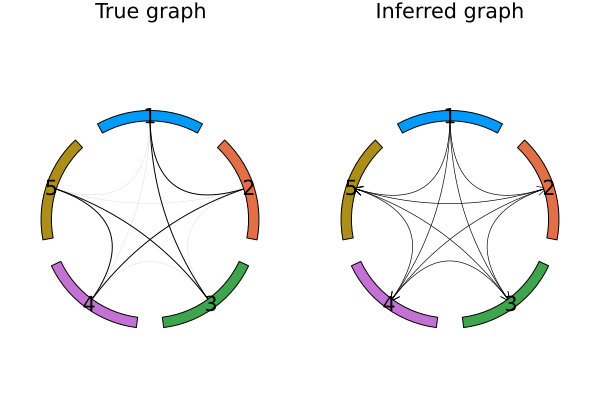

In [27]:
using GraphRecipes
using NetworkLayout
using Plots

p1 = graphplot(f_true, edgewidth = abs.(f_true), names = 1:N, method = :chorddiagram, title = "True graph")
p2 = graphplot(Fij_new[1], edgewidth = abs.(Fij_new[1]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p2, aspect_ratio = 1)

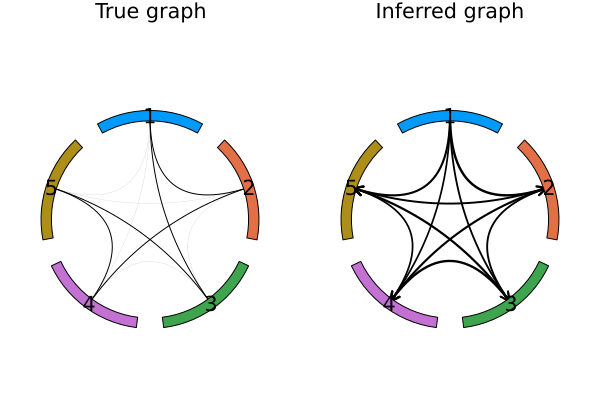

In [28]:
p3 = graphplot(Fij_new[2], edgewidth = abs.(Fij_new[2]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p3, aspect_ratio = 1)

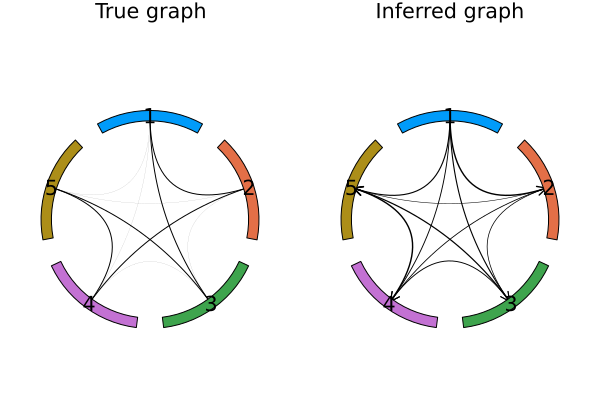

In [29]:
p4 = graphplot(Fij_new[3], edgewidth = abs.(Fij_new[3]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p4, aspect_ratio = 1)

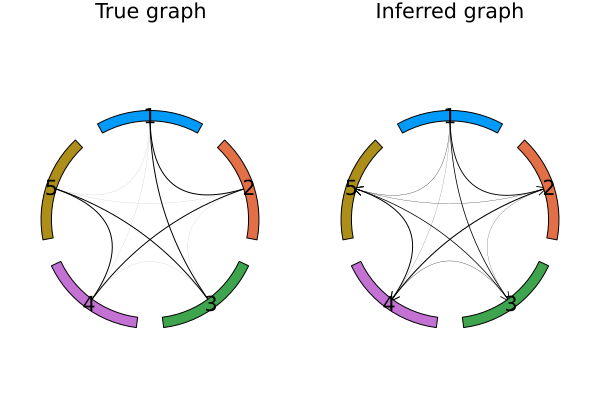

In [30]:
p5 = graphplot(Fij_new[4], edgewidth = abs.(Fij_new[4]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p5, aspect_ratio = 1)

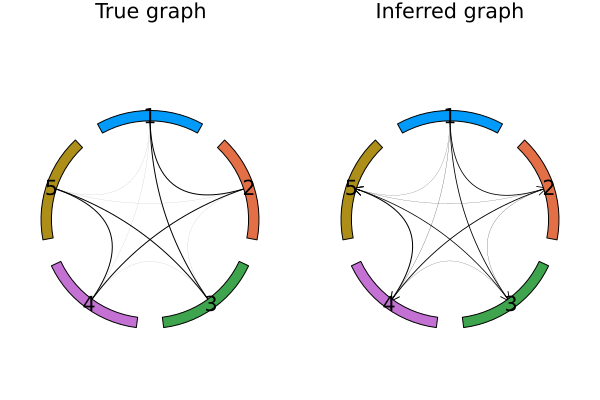

In [31]:
p6 = graphplot(Fij_new[5], edgewidth = abs.(Fij_new[5]), names = 1:N, method = :chorddiagram, title = "Inferred graph")

plot(p1, p6, aspect_ratio = 1)

By this comparison it becomes clear how much the number of observations is crucial in the inference process. Indeed we can see that while M is less than 500 observation it is almost impossible to detect the actual couplings, while if M is sufficiently large the Boltzamann machine allows us to spot them. It is also worth to note that for M greater than 1000 the inference process does not improve if M increases.  

One of the main problems of MCMC is that the samples are not independent. Therefore usually the collection of samples is done waiting a time interval $\Delta t$ that brings independece between samples. In order to quantify this correlation we estimate the autocorrelation function associated to the Markov chain that fetures the Bolzmann Machine. We recall that the autocorrelation function has the form:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu_t)(x^{(s)}-\mu_s)]}{\sqrt {\sigma_t^2\sigma_s^2}}
\end{align}
Because of the stationarity of the Markov chain we get:
\begin{align}
\gamma(r) = \frac{\mathbb{E}[(x^{(t)}-\mu)(x^{(t+r)}-\mu)]}{\sigma^2}
\end{align} 
As seen in the lecture an unbiased Monte Carlo estimator of $\gamma$ is given by:
\begin{align}
\hat{\gamma}_n(r) = \frac{\frac{1}{n-r}\sum_{k=1}^{n-r}(\hat{x}^{(k)}-\hat{\mu}_n)(\hat{x}^{(k+r)}-\hat{\mu}_n)}{\frac{1}{n}\sum_{k=1}^{n}(\hat{x}^{(k)}-\hat{\mu}_n)^2}
\end{align}

In [32]:
using LinearAlgebra
function autocorrelation(x::Matrix{Float64}, R::Int64, N::Int64, M::Int64)
    μ = zeros(N)   
    for i in 1:N
        μ[i] = sum(x[:, i]) / M
    end

    #gamma_mt = Vector{Matrix{Float64}}(undef, R)
    gamma_mt = zeros(R, N, N)
    
    for r in 1:R
        for k in 1:(M-r+1)
            gamma_mt[r,:,:] += (x[k, :] - μ) * transpose(x[k+r-1, :] - μ) ./ (M - r + 1)
        end
        
        gamma_mt[r,:,:] * inv(gamma_mt[1,:,:])
    end

    return gamma_mt
end

autocorrelation (generic function with 1 method)

We well vary the couples $(M,T_{wait})$ with the following values:
- $M = (100,500,1000,1500,2000)$
- $T_{wait} = (1,50,100,250, 500)$

In [33]:
N = 5
q = 4
M = [1000,1500,2000]
Tw = [1,5,10,50,100,500]
Xall = zeros(length(M), length(Tw), M[length(M)], N)
Teq= 500

#xall = zeros(Int64, dmax, N)

for m in 1:length(M)
    for t in 1:length(Tw)

        x = sample(1:q, N, replace = true)

        for d in 1:Teq        
            x = metropolis_ising(x, J_True) 
        end

        for d in 1:M[m]     
            for d1 in 1:Tw[t]
                x = metropolis_ising(x, J_True)
            end
            #xall[d,:] = x
            Xall[m,t,d,:] = x
        end 
        
        #for i in 1:length(M), j in 1:length(Tw)
        #    Xall[m, j, i, :] =  xall[i, :]
        #end 
    end
end

In [52]:
#R has to be choosen
R = 200

Autocorrelation = zeros(size(M, 1), size(Tw, 1), R, N, N)

for m in 1:length(M)
    for t in 1:length(Tw)
        Autocorrelation[m, t, :,:,:] = autocorrelation(Xall[m, t, :, :], R, N, M[m])
    end
end
#Autocorrelation

In [36]:
using LinearAlgebra
norms=zeros(size(Autocorrelation,1),size(Autocorrelation,2),size(Autocorrelation,3))
for i in 1:size(norms,1)
    for j in 1:size(norms,2)
        for k in 1:size(norms,3)
            norms[i,j,k]=norm(Autocorrelation[i,j,k,:,:],1)
        end
    end
end

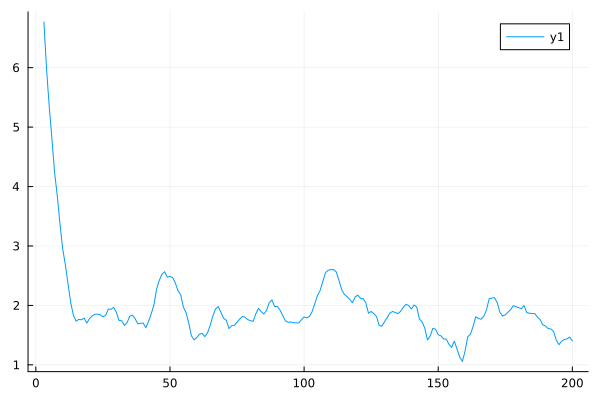

In [42]:
using Plots
rn=range(0,size(norms,1))
plot(collect(:200), norms[1,1,3:200])
#plot!(collect(2:200), norms[1,2,2:200])
#plot!(collect(2:200), norms[1,3,2:200])
#plot!(collect(2:200), norms[1,4,2:200])
#plot!(collect(2:200), norms[152,2:200])

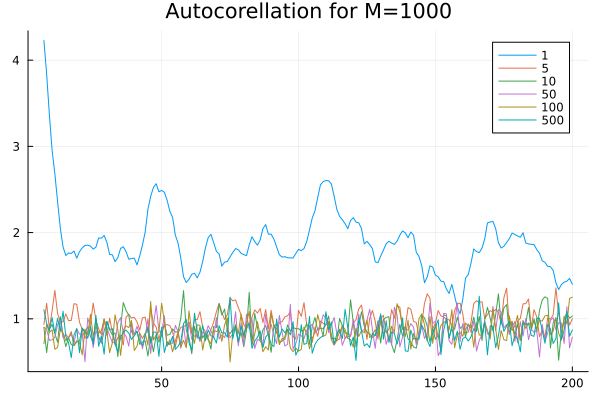

In [53]:
plot(collect(7:200), [norms[1,1,7:200] norms[1,2,7:200] norms[1,3,7:200] norms[1,4,7:200] norms[1,5,7:200] norms[1,6,7:200]], title="Autocorellation for M=1000", label=["1" "5" "10" "50" "100" "500"], linewidth=1)


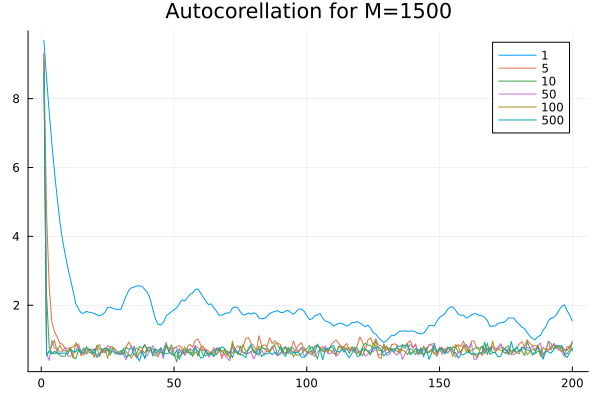

In [54]:
plot(collect(1:200), [norms[2,1,1:200] norms[2,2,1:200] norms[2,3,1:200] norms[2,4,1:200] norms[2,5,1:200] norms[2,6,1:200]], title="Autocorellation for M=1500", label=["1" "5" "10" "50" "100" "500"], linewidth=1)

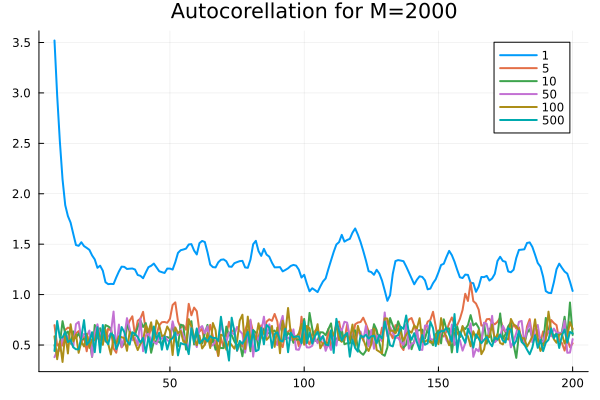

In [47]:
plot(collect(7:200), [norms[3,1,7:200] norms[3,2,7:200] norms[3,3,7:200] norms[3,4,7:200] norms[3,5,7:200] norms[3,6,7:200]], title="Autocorellation for M=2000", label=["1" "5" "10" "50" "100" "500"], linewidth=2)

Then if the autocorrelation inferred for $m\in M$ and $t\in T$ has to be displayed it is sufficient to run:

$$Autocorrelation[m, t, :, :]$$
